# INTERN NAME: SAYAM KUMAR

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import re
import warnings
warnings.filterwarnings("ignore")
import datetime
import statsmodels.api as sm 
from statsmodels.graphics.mosaicplot import mosaic
import plotly.express as px
import plotly.graph_objects as go

In [2]:
np.set_printoptions(suppress=True,linewidth=150,precision=2)

In [3]:
plt.rcParams['figure.figsize'] = (16,8)

In [4]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

## Loading the dataset

In [5]:
delhi_data = pd.read_excel('Delhi.xlsx')
mumbai_data = pd.read_excel('Mumbai.xlsx')
chennai_data = pd.read_excel('Chennai.xlsx')
kolkata_data = pd.read_excel('Kolkata.xlsx')
ahmedabad_data = pd.read_excel('Ahmedabad.xlsx')
bangalore_data = pd.read_excel('Bangalore.xlsx')
hyderabad_data = pd.read_excel('Hyderabad.xlsx')
pune_data = pd.read_excel('Pune.xlsx')

In [6]:
tier1_data = pd.concat([mumbai_data,delhi_data,chennai_data,kolkata_data,ahmedabad_data,bangalore_data,hyderabad_data,pune_data])
tier1_data.head()

Name                    Type  \
0  Innfinites Photography - Wedding Photographer ...  · Wedding photographer   
1  Picsurely: Destination Wedding Photographer in...  · Wedding photographer   
2                    Wedding Photographers in Mumbai  · Wedding photographer   
3  A.Rrajani Photography Fashion,Portfolio,Advert...          · Photographer   
4  Mint & Peach Photography - Maternity Photograp...          · Photographer   

  Location  Contact no available?      Contact  Photographer name  \
0   Mumbai               1.000000  099200 64544               NaN   
1   Mumbai               1.000000  080805 55605               NaN   
2   Mumbai               1.000000  087792 89752               NaN   
3   Mumbai               1.000000  070453 60660               NaN   
4   Mumbai               1.000000  088792 86806            Manali   

              comment Email ID Employees in studio Monthly orders  ...  \
0          Bad review      NaN                 NaN            NaN  ...   
1       Not intrested      NaN                 NaN            NaN  ...   
2  Quited Photography      NaN                 NaN            NaN  ...   
3        Not received      NaN                 NaN            NaN  ...   
4                 NaN      NaN                   3            NaN  ...   

  Email id Contact Website Internet Contact number avilable?  \
0      NaN     NaN     NaN      NaN                      NaN   
1      NaN     NaN     NaN      NaN                      NaN   
2      NaN     NaN     NaN      NaN                      NaN   
3      NaN     NaN     NaN      NaN                      NaN   
4      NaN     NaN     NaN      NaN                      NaN   

  Contact is available? Comment Unnamed: 19 Unnamed: 7 Unnamed: 0  
0                   NaN     NaN         NaN        NaN        NaN  
1                   NaN     NaN         NaN        NaN        NaN  
2                   NaN     NaN         NaN        NaN        NaN  
3                   NaN     NaN         NaN        NaN        NaN  
4                   NaN     NaN         NaN        NaN        NaN  

[5 rows x 28 columns]

# Data Cleaning & Data Preprocessing

## Checking for null values

In [7]:
tier1_data.isnull().sum()

Name                             272
Type                             109
Location                         114
Contact no available?            582
Contact                         1145
Photographer name               1028
comment                          394
Email ID                        1246
Employees in studio             1075
Monthly orders                  1087
Problems                        1199
Internet (Brand)                1108
Internet (Speed)                1134
Internet (Monthly Cost)         1158
Which cloud storage they use    1122
How they do photo selection     1103
Provides E-book?                1095
Album designing(Own?)           1089
Email id                        1247
Contact                          255
Website                          493
Internet                         251
Contact number avilable?        1167
Contact is available?            945
Comment                         1196
Unnamed: 19                     1284
Unnamed: 7                      1292
U

## Checking for duplicate data if any

In [8]:
tier1_data[tier1_data.duplicated()]

Name Type Location  Contact no available? Contact  Photographer name  \
150  NaN  NaN      NaN                    NaN      NaN               NaN   
151  NaN  NaN      NaN                    NaN      NaN               NaN   
153  NaN  NaN      NaN                    NaN      NaN               NaN   
126  NaN  NaN      NaN                    NaN      NaN               NaN   
125  NaN  NaN      NaN                    NaN      NaN               NaN   
..   ...  ...      ...                    ...      ...               ...   
185  NaN  NaN      NaN                    NaN      NaN               NaN   
186  NaN  NaN      NaN                    NaN      NaN               NaN   
187  NaN  NaN      NaN                    NaN      NaN               NaN   
188  NaN  NaN      NaN                    NaN      NaN               NaN   
189  NaN  NaN      NaN                    NaN      NaN               NaN   

    comment Email ID Employees in studio Monthly orders  ... Email id Contact  \
150     NaN      NaN                 NaN            NaN  ...      NaN     NaN   
151     NaN      NaN                 NaN            NaN  ...      NaN     NaN   
153     NaN      NaN                 NaN            NaN  ...      NaN     NaN   
126     NaN      NaN                 NaN            NaN  ...      NaN     NaN   
125     NaN      NaN                 NaN            NaN  ...      NaN     NaN   
..      ...      ...                 ...            ...  ...      ...     ...   
185     NaN      NaN                 NaN            NaN  ...      NaN     NaN   
186     NaN      NaN                 NaN            NaN  ...      NaN     NaN   
187     NaN      NaN                 NaN            NaN  ...      NaN     NaN   
188     NaN      NaN                 NaN            NaN  ...      NaN     NaN   
189     NaN      NaN                 NaN            NaN  ...      NaN     NaN   

    Website Internet Contact number avilable? Contact is available? Comment  \
150     NaN      NaN                      NaN                   NaN     NaN   
151     NaN      NaN                      NaN                   NaN     NaN   
153     NaN      NaN                      NaN                   NaN     NaN   
126     NaN      NaN                      NaN                   NaN     NaN   
125     NaN      NaN                      NaN                   NaN     NaN   
..      ...      ...                      ...                   ...     ...   
185     NaN      NaN                      NaN                   NaN     NaN   
186     NaN      NaN                      NaN                   NaN     NaN   
187     NaN      NaN                      NaN                   NaN     NaN   
188     NaN      NaN                      NaN                   NaN     NaN   
189     NaN      NaN                      NaN                   NaN     NaN   

    Unnamed: 19 Unnamed: 7 Unnamed: 0  
150         NaN        NaN        NaN  
151         NaN        NaN        NaN  
153         NaN        NaN        NaN  
126         NaN        NaN        NaN  
125         NaN        NaN        NaN  
..          ...        ...        ...  
185         NaN        NaN        NaN  
186         NaN        NaN        NaN  
187         NaN        NaN        NaN  
188         NaN        NaN        NaN  
189         NaN        NaN        NaN  

[102 rows x 28 columns]

## Dropping the rows containing all null values

In [9]:
tier1_data.dropna(axis=0,how='all',inplace=True)

## Dropping duplicate values

In [10]:
tier1_data.drop_duplicates(inplace=True)

## Removing unnecessary unnamed columns

In [11]:
tier1_data.drop(columns=['Unnamed: 19','Unnamed: 7','Unnamed: 0'],inplace=True)

## Determining percentage of null values of each column in the dataset

In [12]:
for col in tier1_data.columns:
    print("Percentage of null values in {}:".format(col),np.round(tier1_data[col].isnull().sum()/len(tier1_data[col])*100,2),'%')

Percentage of null values in Name: 14.2 %
Percentage of null values in Type: 0.5 %
Percentage of null values in Location: 0.92 %
Percentage of null values in Contact no available?: 40.25 %
Percentage of null values in Contact : 87.56 %
Percentage of null values in Photographer name: 77.73 %
Percentage of null values in comment: 24.45 %
Percentage of null values in Email ID: 96.05 %
Percentage of null values in Employees in studio: 81.68 %
Percentage of null values in Monthly orders: 82.69 %
Percentage of null values in Problems : 92.1 %
Percentage of null values in Internet (Brand): 84.45 %
Percentage of null values in Internet (Speed): 86.64 %
Percentage of null values in Internet (Monthly Cost): 88.66 %
Percentage of null values in Which cloud storage they use: 85.63 %
Percentage of null values in How they do photo selection: 84.03 %
Percentage of null values in Provides E-book? : 83.36 %
Percentage of null values in Album designing(Own?): 82.86 %
Percentage of null values in Email i

## Filtering the Email ID column

In [13]:
tier1_data = tier1_data[tier1_data['Email ID']!="Don't have mail Id"]

## Dropping "Contact number available?" and "Contact is available?" columns because of two reasons: 
1. Both of them are almost identical to the column "Contact no available?". 
2. Majority of their values are null.

In [14]:
tier1_data.drop(columns=['Contact number avilable?','Contact is available?'],inplace=True)

## Eliminating "Email id" column as it is almost similar to "Email ID" column and it also has a lot of null values i.e. 96.13%.

## Apart from it, there is a duplicate 'Comment' column as well which needs to be dropped.

## Dropping "Website" column as it is not needed from the context of my analysis.

In [15]:
tier1_data.drop(columns=['Email id','Comment','Website'],inplace=True)

## Renaming all the columns in order to give them more appropriate names

In [16]:
tier1_data.rename(columns={'Contact no available?': 'Contact No. Available', 'Photographer name': "Photographer's name", 'comment': 'Comment', 'Contact ': 'Contact', 'Employees in studio': 'No. of Employees', 'Monthly orders': 'Monthly Orders', 'Internet (Brand)': 'Internet Brand', 'Internet (Speed)': 'Internet Speed', 'Internet (Monthly Cost)': 'Internet Monthly Cost', 'Which cloud storage they use': 'Cloud Storage Used', 'How they do photo selection': 'Photo Selection Method', 'Provides E-book? ': 'E-Book', 'Album designing(Own?)': 'Album Designing'},inplace=True)

## There is a duplicate Contact column which needs to be removed.

## Data Transformation(As part of data preprocessing)

In [17]:
tier1_data = pd.read_excel('temp.xlsx')
tier1_data.drop(columns='Unnamed: 0',inplace=True)
tier1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    873 non-null    object
 1   Type                    1036 non-null   object
 2   Location                1031 non-null   object
 3   Photographer's name     231 non-null    object
 4   Comment                 758 non-null    object
 5   Email ID                21 non-null     object
 6   No. of Employees        151 non-null    object
 7   Monthly Orders          89 non-null     object
 8   Problems                73 non-null     object
 9   Internet Brand          163 non-null    object
 10  Internet Speed          137 non-null    object
 11  Internet Monthly Cost   113 non-null    object
 12  Cloud Storage Used      149 non-null    object
 13  Photo Selection Method  169 non-null    object
 14  E-Book                  176 non-null    object
 15  Albu

## Internet

In [18]:
tier1_data = tier1_data[(tier1_data['Internet']==1.0)|(tier1_data['Internet']==0.0)]
tier1_data['Internet'].value_counts()

1    797
0    239
Name: Internet, dtype: int64

In [19]:
tier1_data['Internet'] = tier1_data['Internet'].astype(np.float64)

## Cloud Storage Used

In [20]:
tier1_data['Cloud Storage Used'].replace(to_replace=['g drive','google drive','Google drive','Google Drive','google','Google','g drive,','g drive ','google photos','G drive','gdrive, '],value='Google Drive',inplace=True)
tier1_data['Cloud Storage Used'].replace(to_replace='pendrive',value='Pendrive',inplace=True)
tier1_data['Cloud Storage Used'].replace(to_replace=['HDD','harddisk','hard disk','hard drive'],value='Hard Disk Drive',inplace=True)
tier1_data['Cloud Storage Used'].replace(to_replace=['own storage','computer memory','own'],value='Own Storage',inplace=True)
tier1_data['Cloud Storage Used'].replace(to_replace=['no','-','offline work','No','no cloud','no drive'],value='Not Used',inplace=True)
tier1_data['Cloud Storage Used'].replace(to_replace=['drive',"didn’t mention",'4500-5000 yearly','varies on top-up','not constant','5000 yearly','yearly 6000','yearly 4000','2000-2500'],value='Unknown',inplace=True)
tier1_data['Cloud Storage Used'].replace(to_replace=['cards','sd cards','card'],value='SD Cards',inplace=True)
tier1_data['Cloud Storage Used'].replace(to_replace=['drop box','Drop box'],value='Drop Box',inplace=True)
tier1_data['Cloud Storage Used'].replace(to_replace=['onedrive','one drive'],value='One Drive',inplace=True)
tier1_data['Cloud Storage Used'].replace(to_replace='My air bridge',value='My Air Bridge',inplace=True)
tier1_data['Cloud Storage Used'].replace(to_replace='v transfer',value='WeTransfer',inplace=True)
tier1_data['Cloud Storage Used'].replace(to_replace=['icloud','iCloud'],value='iCloud',inplace=True)
tier1_data['Cloud Storage Used'].replace(to_replace='google drive and icloud',value='Google Drive and iCloud',inplace=True)
tier1_data['Cloud Storage Used'].replace(to_replace=['g drive,onedrive','g drive & one drive','g drive, onedrive','onedrive, g drive'],value='Google Drive and One Drive',inplace=True)
tier1_data['Cloud Storage Used'].replace(to_replace='pendrive, Google drive',value='Pendrive and Google Drive',inplace=True)
tier1_data['Cloud Storage Used'].replace(to_replace='gdrive, onedrive nd icloud',value='Google Drive, One Drive and iCloud',inplace=True)

In [21]:
tier1_data['Cloud Storage Used'].value_counts().head()

Google Drive       56
Not Used           22
Pendrive           19
Hard Disk Drive    16
Unknown            12
Name: Cloud Storage Used, dtype: int64

## Internet Brand

In [22]:
for x in tier1_data['Internet Brand'].dropna().values:
    tier1_data['Internet Brand'].replace(x,x.title(),inplace=True)

In [23]:
tier1_data['Internet Brand'].value_counts()

Airtel                27
Hathway               13
Gtpl                  12
Act                   11
Act Fiber              8
                      ..
Don’T Use              1
Act/Jio                1
Don’T Use              1
Multiple Brands        1
Tata Sky Broadband     1
Name: Internet Brand, Length: 63, dtype: int64

## Type

In [24]:
for x in tier1_data['Type'].dropna().unique():
    tier1_data['Type'].replace(x,x.strip("· "),inplace=True)
    tier1_data['Type'].replace(x,x.lstrip(),inplace=True)

In [25]:
tier1_data['Type'].replace('Photography servic','Photography service',inplace=True)
tier1_data['Type'].replace('Wedding plann','Wedding plan',inplace=True)
tier1_data['Type'].replace('Wedding plann','Wedding plan',inplace=True)
tier1_data['Type'].replace('Internet marketing servic','Internet marketing service',inplace=True)
tier1_data['Type'].replace('Photography stud','Photography studio',inplace=True)
tier1_data['Type'].replace('Model portfolio stud','Model portfolio studio',inplace=True)
tier1_data['Type'].replace('Photography Institut','Photography Institute',inplace=True)
tier1_data['Type'].replace('Video editing servic','Video editing service',inplace=True)
tier1_data['Type'].replace('Tour operat','Tour operator',inplace=True)
tier1_data['Type'].replace('Copier repair servic','Copier repair service',inplace=True)
tier1_data['Type'].replace('Photography Institut','Photography Institute',inplace=True)
tier1_data['Type'].replace('Video production servic','Video production service',inplace=True)
tier1_data['Type'].replace('Portrait stud','Portrait studio',inplace=True)
tier1_data['Type'].replace('Photography Cla','CLA Photography',inplace=True)
tier1_data['Type'].replace('Corporate gift suppl','Corporate gift supply',inplace=True)
tier1_data['Type'].replace('Photography Institut','Photography Institute',inplace=True)
tier1_data['Type'].replace('Camera st','Camera studio',inplace=True)
tier1_data['Type'].replace('Electronics st','Electronics studio',inplace=True)
tier1_data['Type'].replace(['Wedding venu', 'Colleg','Design institut'],['Wedding venue', 'College','Design institute'],inplace=True)
tier1_data['Type'].replace(['th Indian restaurant', 'Corporate offic'],['The Indian restaurant', 'Corporate office'],inplace=True)

In [26]:
tier1_data['Type'].value_counts().head()

Wedding photographer    309
Photography studio      257
Photographer            250
Photography service      74
Photo lab                22
Name: Type, dtype: int64

## Internet Speed

In [27]:
for x in tier1_data['Internet Speed'].dropna().values:
    if type(x) == str:
        if re.search('\d+',x) is not None:
            tier1_data['Internet Speed'].replace(x,re.search('\d+',x).group(),inplace=True)
        else:
            tier1_data['Internet Speed'].replace(x,0,inplace=True)

In [28]:
tier1_data['Internet Speed'].value_counts().head()

0      24
100    24
100    20
10      9
50      8
Name: Internet Speed, dtype: int64

In [29]:
tier1_data['Internet Speed'] = tier1_data['Internet Speed'].astype(np.float64)

## Internet Monthly Cost

In [30]:
tier1_data['Internet Monthly Cost'].unique()

array([nan, '2000 /- 12', 700, '700/-', 1250, '1750/- 3', '-', 1500, '699/-', 800, '2000/-', '800/-', '8000/-12', '500/-', '900/-', '1000/-',
       '1500/-', 9000, '999/-', '899/-', '1200/-', 1200, 'No', 600, 1000, 799, 699, 499, 1600, 650, 999, '100mbps', 'don’t know', '40 mbps',
       'not aware', 5500, '6000 yearly', '7200 yearly', 'didn’t tell', 'don’t use', 'didn’t know', 'yearly plan with IT', '11000 15-18 months',
       'don’t use internet', '7000 yearly', '601 per 3 months', 'top-ups on need', '6000 per year', '5500/6000 per year', 0, '4000 or 5000 per year',
       '500 recharge', 'did not tell', 2000, 2250, '1000-1200', 1280, 500, 1150, '1200(3 months', 8000, 5000, datetime.datetime(8000, 12, 1, 0, 0),
       '1100/-', '11000/ 12', '800/- 12', 'mobile data'], dtype=object)

In [31]:
for x in tier1_data['Internet Monthly Cost'].dropna().values:
    if type(x) == str:
        if re.search('\d+',x) is not None:
            tier1_data['Internet Monthly Cost'].replace(x,re.search('\d+',x).group(),inplace=True)
        else:
            tier1_data['Internet Monthly Cost'].replace(x,0,inplace=True)
    elif type(x) == datetime.datetime:
        tier1_data['Internet Monthly Cost'].replace(x,0,inplace=True)

In [32]:
tier1_data['Internet Monthly Cost'].value_counts().head()

0       22
1000     8
700      6
600      4
999      4
Name: Internet Monthly Cost, dtype: int64

In [33]:
tier1_data['Internet Monthly Cost'] = tier1_data['Internet Monthly Cost'].astype(np.float64)

## Album Designing

In [34]:
not_interested = np.array(["no","No","no(for album designing 3rd party)","Don't provide album","no album included","no 3rd party","-"])
for x in tier1_data['Album Designing'].values:
    if x in not_interested:
        tier1_data['Album Designing'].replace(x,0,inplace=True)
    else:
        tier1_data['Album Designing'].replace(x,1,inplace=True)

In [35]:
tier1_data['Album Designing'].value_counts()

1    1032
0       4
Name: Album Designing, dtype: int64

In [36]:
tier1_data['Album Designing'] = tier1_data['Album Designing'].astype(np.float64)

## E-Book

In [37]:
not_e_book = np.array(["no","No","no ","-","NO","not"])
for x in tier1_data['E-Book'].values:
    if x in not_e_book:
        tier1_data['E-Book'].replace(x,0,inplace=True)
    else:
        tier1_data['E-Book'].replace(x,1,inplace=True)

In [38]:
tier1_data['E-Book'].value_counts()

1    1035
0       1
Name: E-Book, dtype: int64

In [39]:
tier1_data['E-Book'] = tier1_data['E-Book'].astype(np.float64)

## Comment

In [40]:
tier1_data['Comment'].value_counts()

Not interested                       88
Interested                           71
not interested                       54
interested                           38
not received                         21
                                     ..
dvstudiokolkata@gmail.com             1
iekolkata@gmail.com                   1
dasstudioonline1909@gmail.com         1
Bombayphotostudio@yahoo.co.in         1
Will call at 7pm today (19/04/21)     1
Name: Comment, Length: 262, dtype: int64

In [41]:
not_interested = np.array(['Not intrested','Not Interested','Switched OFF','Not interested','not interested','Due to lockdown ','Call cut (Not interested)','Not accepting calls for now','Office closed till 15th May dont want to talk','Not interested (Client based platoform he need where he can get as much as client )','not intersted','dont share info','dont want to share','Call not answered', 'Phone switched off', 'Phone Switched off', 'Not Interested in sharing any type of info.',"Didn't pickup the call",'had cut the call','he disconnected the call','disconnected the call','Switched Off','left the business','no interested','no more doing photography','call declined', 'not connecting','not answering','call cut','not picking up the call','non connecting the call','switched off','disconnected','not a photoghrapher','not in business(may be later)','switch off','Not interested (institutional based company)', 'Not interested ','Business shutdown','Try to call later (Blocked my number )','AS OF now closed when things get normal will get back in business','Not in business', 'Due to lockdown , Business is shutdown','business shutdown', 'Not Interested, will call after someday'])

for x in tier1_data['Comment'].values:
    if x in not_interested:
        tier1_data['Comment'].replace(x,0,inplace=True)
    else:
        tier1_data['Comment'].replace(x,1,inplace=True)

In [42]:
tier1_data['Comment'].value_counts()

1    1031
0       5
Name: Comment, dtype: int64

In [43]:
tier1_data['Comment'] = tier1_data['Comment'].astype(np.float64)

## No. of Employees

In [44]:
for x in tier1_data['No. of Employees'].values:
    if type(x) == str:
        if re.search('\d+',x) is not None:
            tier1_data['No. of Employees'].replace(x,re.search('\d+',x).group(),inplace=True)
        else:
            tier1_data['No. of Employees'].replace(x,0,inplace=True)

In [45]:
tier1_data['No. of Employees'].value_counts()

2      20
4      17
10     14
3      11
5      11
1      10
6       9
8       7
15      7
12      6
0       5
20      5
30      4
7       4
5       4
25      2
9       2
17      1
6       1
3       1
14      1
17      1
35      1
16      1
18      1
100     1
65      1
55      1
40      1
50      1
Name: No. of Employees, dtype: int64

In [46]:
tier1_data['No. of Employees'] = tier1_data['No. of Employees'].astype(np.float64)

## Monthly Orders

In [47]:
tier1_data['Monthly Orders'].unique()

array([nan, 200, 15, 150, 4, 0, 500, '55-65', 40, 3, '40-50', 10, 2, '25-30', 8, 7, 12, 50, '-', 25, 17, '30-45', '30-35', '70-80', '15-21', '15-20',
       '15-16', '5-6', '35-40', 20, 30, '20-30', 60, 1, '30-40', 6, 5, 35], dtype=object)

In [48]:
for x in tier1_data['Monthly Orders'].values:
    if type(x) == str:
        if re.search('\d+',x) is not None:
            tier1_data['Monthly Orders'].replace(x,x.split('-')[-1],inplace=True)
        else:
            tier1_data['Monthly Orders'].replace(x,0,inplace=True)

In [49]:
tier1_data['Monthly Orders'].value_counts().head()

0     15
15     8
4      6
3      6
10     5
Name: Monthly Orders, dtype: int64

In [50]:
tier1_data['Monthly Orders'] = tier1_data['Monthly Orders'].astype(np.float64)

In [51]:
tier1_data.rename(columns={'Problems ': 'Problems'},inplace=True)

## Name

In [52]:
for x in tier1_data['Name'].dropna().values:
    tier1_data['Name'].replace(x,x.title(),inplace=True)

In [53]:
tier1_data['Name'].values

array(['The Wed Cafe - Best Wedding Photographers In Delhi', 'Wedding Photographer In Delhi - Just Click Photography',
       'Mani Sharma Photografy, Best Wedding Photographer In Delhi', ..., 'Camerography', 'Anupam T Photography', 'Pixavince Creations'],
      dtype=object)

## Photographer's Name

In [54]:
for x in tier1_data["Photographer\'s name"].dropna().values:
    if type(x) == str:
        tier1_data["Photographer\'s name"].replace(x,x.title(),inplace=True)

In [55]:
tier1_data["Photographer\'s name"] = tier1_data["Photographer\'s name"][1:]

## Method of photo selection

In [56]:
for x in tier1_data['Photo Selection Method'].dropna().values:
    if type(x) == str:
        tier1_data['Photo Selection Method'].replace(x,x.title(),inplace=True)

In [57]:
tier1_data['Photo Selection Method'].value_counts()

Client                      14
Client Specific             14
Photoshop                   10
No                           9
Manually                     9
                            ..
Based On Quality Overall     1
Custermor Based Review       1
Didn’T Tell                  1
Depends On Client            1
V-Transfer                   1
Name: Photo Selection Method, Length: 68, dtype: int64

## Problems

In [58]:
for x in tier1_data['Problems'].dropna().values:
    if type(x) == str:
        tier1_data['Problems'].replace(x,x.title(),inplace=True)

In [59]:
tier1_data['Problems'].value_counts()

No                                     13
No Issues                              10
Pandemic                                5
General                                 5
Corona                                  4
Didn’T Mention                          3
No Problems                             3
Financial                               2
No Work Due To Covid                    2
Very Few Since Last Year                1
Didn’T Tell                             1
No Clarity                              1
Budget                                  1
Didn’T Specify                          1
Yearly More Than 17                     1
Covid                                   1
Financial And Budget                    1
Getting Calls Only For Rate Purpose     1
Season Based                            1
Seasonable                              1
Very Less Due To Covid                  1
-                                       1
4                                       1
Postponed Due To Covid            

In [60]:
tier1_data['Internet Speed'].fillna(tier1_data['Internet Speed'].mean(),inplace=True)
tier1_data['No. of Employees'].fillna(tier1_data['No. of Employees'].mean(),inplace=True)
tier1_data['Monthly Orders'].fillna(tier1_data['Monthly Orders'].mean(),inplace=True)
tier1_data['Internet Monthly Cost'].fillna(tier1_data['Internet Monthly Cost'].mean(),inplace=True)

## Understanding and examining the dataset

In [61]:
tier1_data.shape

(1036, 17)

In [62]:
tier1_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 1035
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    873 non-null    object 
 1   Type                    1036 non-null   object 
 2   Location                1031 non-null   object 
 3   Photographer's name     231 non-null    object 
 4   Comment                 1036 non-null   float64
 5   Email ID                21 non-null     object 
 6   No. of Employees        1036 non-null   float64
 7   Monthly Orders          1036 non-null   float64
 8   Problems                73 non-null     object 
 9   Internet Brand          163 non-null    object 
 10  Internet Speed          1036 non-null   float64
 11  Internet Monthly Cost   1036 non-null   float64
 12  Cloud Storage Used      149 non-null    object 
 13  Photo Selection Method  169 non-null    object 
 14  E-Book                  1036 non-null   

In [63]:
tier1_data.describe()

Comment  No. of Employees  Monthly Orders  Internet Speed  \
count 1036.000000       1036.000000     1036.000000     1036.000000   
mean     0.995174          9.304636       23.134831       69.970803   
std      0.069337          4.770682       17.161646       24.120388   
min      0.000000          0.000000        0.000000        0.000000   
25%      1.000000          9.304636       23.134831       69.970803   
50%      1.000000          9.304636       23.134831       69.970803   
75%      1.000000          9.304636       23.134831       69.970803   
max      1.000000        100.000000      500.000000      300.000000   

       Internet Monthly Cost      E-Book  Album Designing    Internet  
count            1036.000000 1036.000000      1036.000000 1036.000000  
mean             1554.053097    0.999035         0.996139    0.769305  
std               748.557813    0.031068         0.062047    0.421481  
min                 0.000000    0.000000         0.000000    0.000000  
25%              1554.053097    1.000000         1.000000    1.000000  
50%              1554.053097    1.000000         1.000000    1.000000  
75%              1554.053097    1.000000         1.000000    1.000000  
max             11000.000000    1.000000         1.000000    1.000000

## Examining correlations between each numerical variable in the dataset

In [64]:
tier1_data.corr()

Comment  No. of Employees  Monthly Orders  \
Comment                1.000000          0.000000        0.000000   
No. of Employees       0.000000          1.000000        0.040425   
Monthly Orders         0.000000          0.040425        1.000000   
Internet Speed         0.000000          0.148892       -0.049672   
Internet Monthly Cost  0.000000          0.044306       -0.001065   
E-Book                -0.002165          0.001986        0.012929   
Album Designing       -0.004336          0.078057       -0.017903   
Internet               0.027987          0.017324        0.007660   

                       Internet Speed  Internet Monthly Cost    E-Book  \
Comment                      0.000000               0.000000 -0.002165   
No. of Employees             0.148892               0.044306  0.001986   
Monthly Orders              -0.049672              -0.001065  0.012929   
Internet Speed               1.000000               0.066770 -0.006484   
Internet Monthly Cost        0.066770               1.000000 -0.028913   
E-Book                      -0.006484              -0.028913  1.000000   
Album Designing             -0.103332               0.017956 -0.001935   
Internet                    -0.007678               0.033374 -0.017022   

                       Album Designing  Internet  
Comment                      -0.004336  0.027987  
No. of Employees              0.078057  0.017324  
Monthly Orders               -0.017903  0.007660  
Internet Speed               -0.103332 -0.007678  
Internet Monthly Cost         0.017956  0.033374  
E-Book                       -0.001935 -0.017022  
Album Designing               1.000000 -0.034093  
Internet                     -0.034093  1.000000

## Regression Analysis

### No. of Employees vs. Monthly Orders

In [65]:
X = tier1_data['No. of Employees']
Y = tier1_data['Monthly Orders']
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()

In [66]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Monthly Orders   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.692
Date:                Thu, 30 Sep 2021   Prob (F-statistic):              0.194
Time:                        01:12:22   Log-Likelihood:                -4413.7
No. Observations:                1036   AIC:                             8831.
Df Residuals:                    1034   BIC:                             8841.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               21.7817      1.169     18.638      0.000      19.488      24.075
No. of Employees     0.1454      0.112      1.301      0.194      -0.074       0.365
==============================================================================
Omnibus:                     2462.486   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15329915.509
Skew:                          22.339   Prob(JB):                         0.00
Kurtosis:                     597.253   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## By looking at the R-squared value, we can conclude that no. of employees variable cannot explain the number of monthly orders i.e. both these variables are independent of each other.

In [67]:
X = tier1_data[['Internet Speed','Internet Monthly Cost']]
Y = tier1_data['Internet']
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()

In [68]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Internet   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6270
Date:                Thu, 30 Sep 2021   Prob (F-statistic):              0.534
Time:                        01:12:22   Log-Likelihood:                -573.81
No. Observations:                1036   AIC:                             1154.
Df Residuals:                    1033   BIC:                             1168.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.7517      0.047     15.924      0.000       0.659       0.844
Internet Speed           -0.0002      0.001     -0.319      0.750      -0.001       0.001
Internet Monthly Cost  1.917e-05   1.75e-05      1.092      0.275   -1.53e-05    5.36e-05
==============================================================================
Omnibus:                      185.778   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.706
Skew:                          -1.275   Prob(JB):                     5.53e-63
Kurtosis:                       2.632   Cond. No.                     6.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
X = tier1_data['Internet Monthly Cost']
Y = tier1_data['Internet Speed']
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()

In [70]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Internet Speed   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.630
Date:                Thu, 30 Sep 2021   Prob (F-statistic):             0.0316
Time:                        01:12:22   Log-Likelihood:                -4764.9
No. Observations:                1036   AIC:                             9534.
Df Residuals:                    1034   BIC:                             9544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    66.6273      1.724     38.636      0.000      63.243      70.011
Internet Monthly Cost     0.0022      0.001      2.152      0.032       0.000       0.004
==============================================================================
Omnibus:                      881.160   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54367.640
Skew:                           3.493   Prob(JB):                         0.00
Kurtosis:                      37.795   Cond. No.                     3.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
X = tier1_data['No. of Employees']
Y = tier1_data['Internet Speed']
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()

In [72]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Internet Speed   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     23.44
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           1.48e-06
Time:                        01:12:22   Log-Likelihood:                -4755.6
No. Observations:                1036   AIC:                             9515.
Df Residuals:                    1034   BIC:                             9525.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               62.9664      1.626     38.734      0.000      59.777      66.156
No. of Employees     0.7528      0.155      4.842      0.000       0.448       1.058
==============================================================================
Omnibus:                      851.938   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50169.024
Skew:                           3.320   Prob(JB):                         0.00
Kurtosis:                      36.438   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## It is quite evident from the correlation table and regression analysis that there are no significant correlations present within this dataset.

# Exploratory Data Analysis(EDA)

## Univariate Analysis

### Name

In [73]:
names = tier1_data['Name'].value_counts().sort_values(ascending=False).reset_index()[:10]
names.columns = ['Name','Count']
names

Name  Count
0                                Shadows Photography      3
1                          Konica Color Lab & Studio      2
2                                     Vj Photography      2
3                          Dream Wedding Photography      2
4  Best Wedding Photographers In Chennai | Infini...      2
5                                Bhalaje Photography      2
6                                Karthik Photography      2
7  Studio Pep Photography: Best Candid Wedding Ph...      1
8  Wedding Photographer In Delhi| Snapture Studio...      1
9    Mib Films - Best Wedding Photographers In Delhi      1

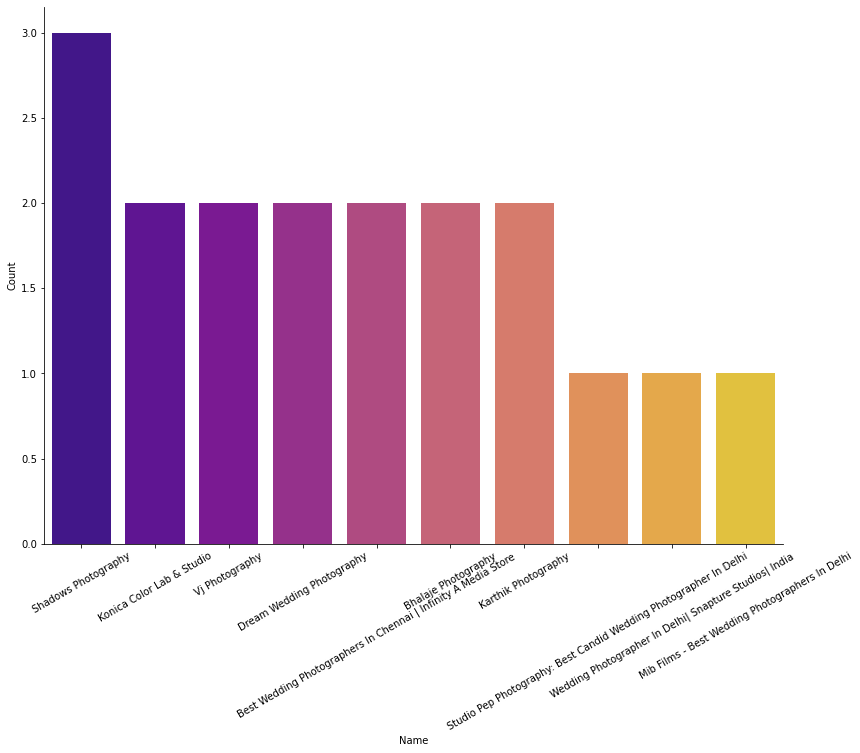

In [74]:
sns.catplot(x='Name',y='Count',data=names,palette='plasma',kind='bar',height=8,aspect=1.5)
plt.xticks(rotation=30)
plt.show()

## Shadows Photography company has the maximum count.

### Location

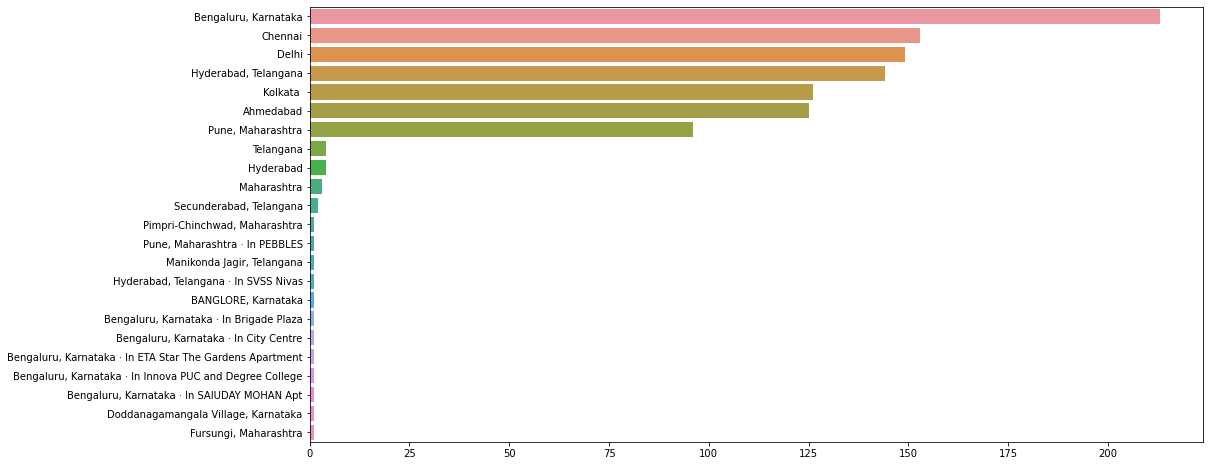

In [75]:
sns.barplot(tier1_data['Location'].value_counts().values,tier1_data['Location'].value_counts().keys())
plt.show()

## Bengaluru in Karnataka has the highest number of photography companies.

### Type

In [76]:
types = tier1_data['Type'].value_counts().sort_values(ascending=False).reset_index()[:10]
types.columns = ['Type','Count']
types

Type  Count
0      Wedding photographer    309
1        Photography studio    257
2              Photographer    250
3       Photography service     74
4                 Photo lab     22
5  Advertising Photographer     17
6                Photo shop     16
7       Aerial photographer      7
8     Photography Institute      6
9           Portrait studio      5

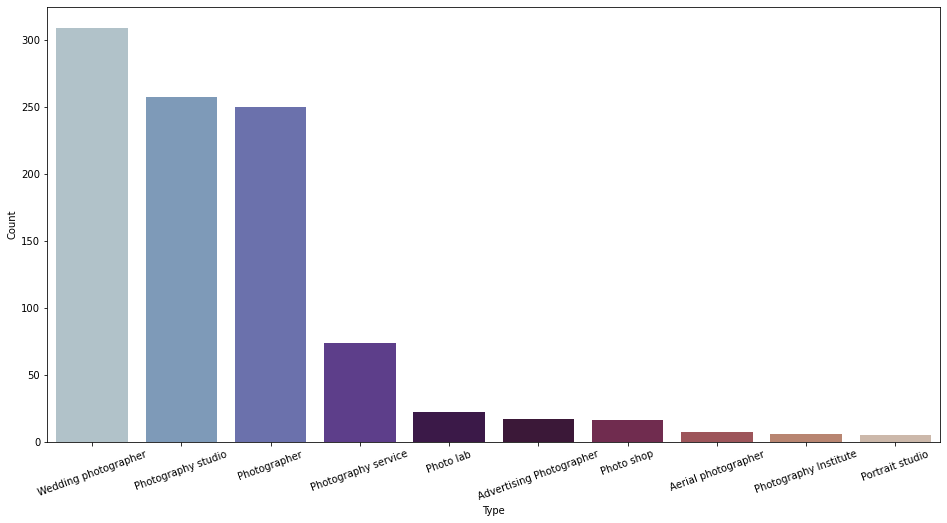

In [77]:
sns.barplot(x='Type',y='Count',data=types,palette='twilight')
plt.xticks(rotation=20)
plt.show()

## Wedding photography is the most popular among all the photography companies.

### Photographer's Name

In [78]:
photographer_names = tier1_data['Photographer\'s name'].value_counts().sort_values(ascending=False).reset_index()[:10]
photographer_names.columns = ["Photographer's Name",'Photos Clicked']
photographer_names

Photographer's Name  Photos Clicked
0         Didn’T Give              14
1       Mandeep Singh               4
2               Vimal               3
3              Shivam               2
4             Prakash               2
5                Ravi               2
6                 Ram               2
7           Shrinivas               2
8            Raja Das               2
9             Mohmmad               2

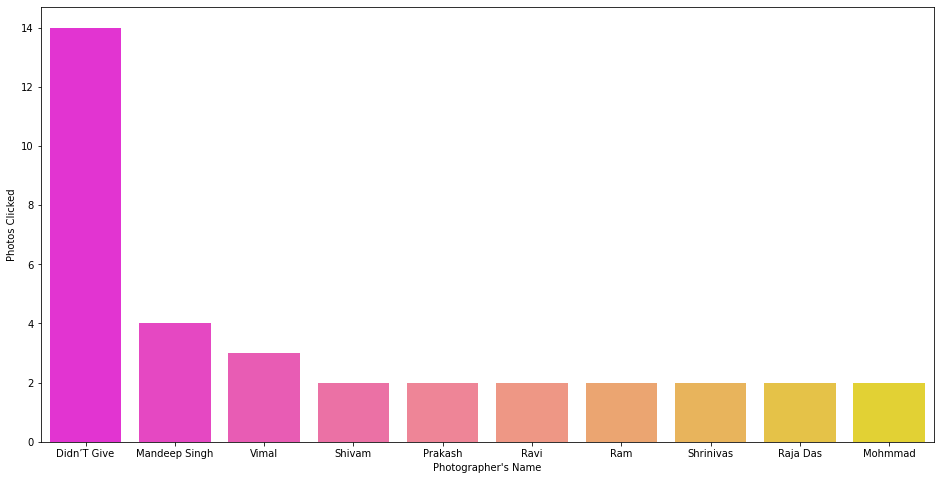

In [79]:
sns.barplot(x="Photographer's Name",y='Photos Clicked',data=photographer_names,palette='spring')
plt.show()

## Unknown photographers have clicked the most number of photos while among the photographers who gave their names, Mandeep Singh has clicked the most number of photos.

### Comment

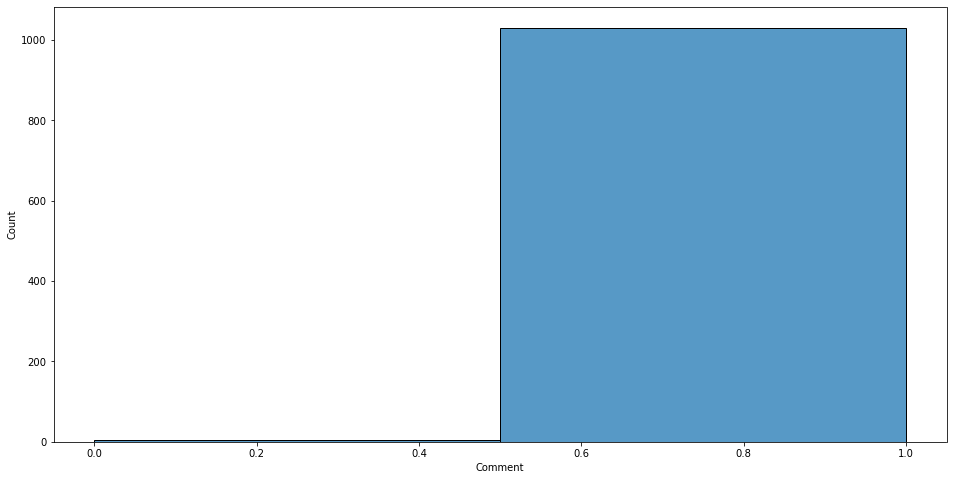

In [80]:
sns.histplot(x='Comment',data=tier1_data,binwidth=0.5)
plt.show()

## Majority of customers have registered an interest in the photography services.

### Problems

In [81]:
problems = tier1_data['Problems'].value_counts().sort_values(ascending=False).reset_index()[:10]
problems.columns = ['Problems','Count']
problems

Problems  Count
0                    No     13
1             No Issues     10
2              Pandemic      5
3               General      5
4                Corona      4
5        Didn’T Mention      3
6           No Problems      3
7            Financial       2
8  No Work Due To Covid      2
9        Fall In Orders      1

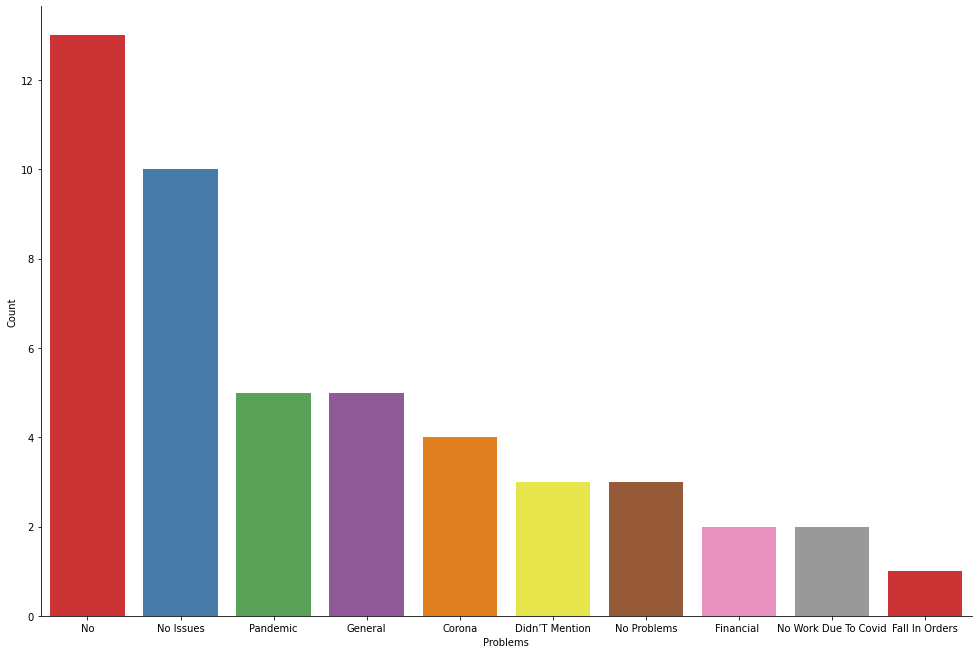

In [82]:
sns.catplot(x='Problems',y='Count',data=problems,kind='bar',palette='Set1',height=9,aspect=1.5)
plt.show()

### It is clearly evident from the above bar plot that majority of customers have faced no issues and have been fairly satisfied with the services they are getting.

### Internet

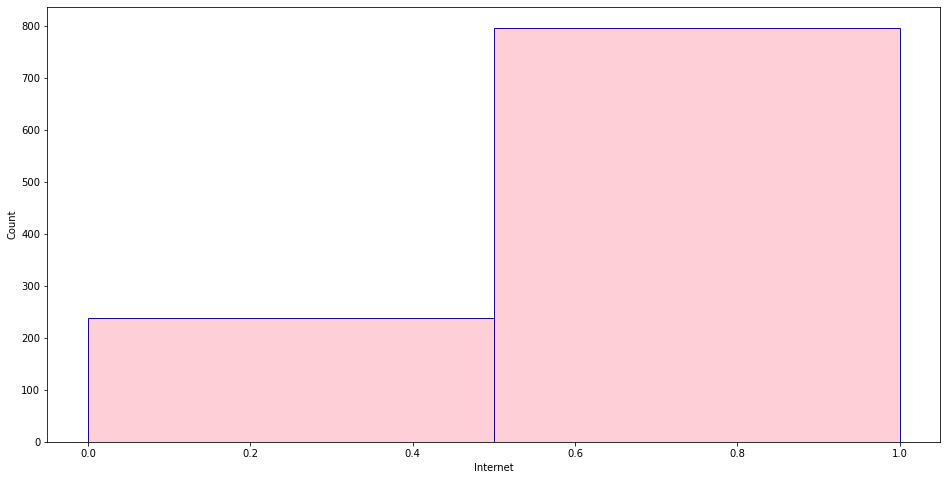

In [83]:
sns.histplot(x='Internet',data=tier1_data,binwidth=0.5,color='pink',edgecolor='blue')
plt.show()

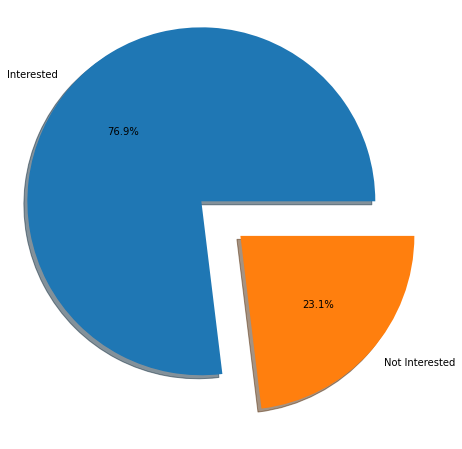

In [84]:
values = tier1_data['Internet'].value_counts().values
labels = ['Interested','Not Interested']
explode = (0.2,0.1)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

### Majority of customers have successfully acquired the internet services.

### 76.9% of the customers have successfully acquired the internet services, while 23.1% haven't.

### Internet Brand

In [85]:
brands = tier1_data['Internet Brand'].value_counts().sort_values(ascending=False).reset_index()[:10]
brands.columns = ['Internet Brand','Count']
brands

Internet Brand  Count
0         Airtel     27
1        Hathway     13
2           Gtpl     12
3            Act     11
4      Act Fiber      8
5       Alliance      8
6             No      6
7            Jio      5
8      3Rd Party      4
9         Tikona      3

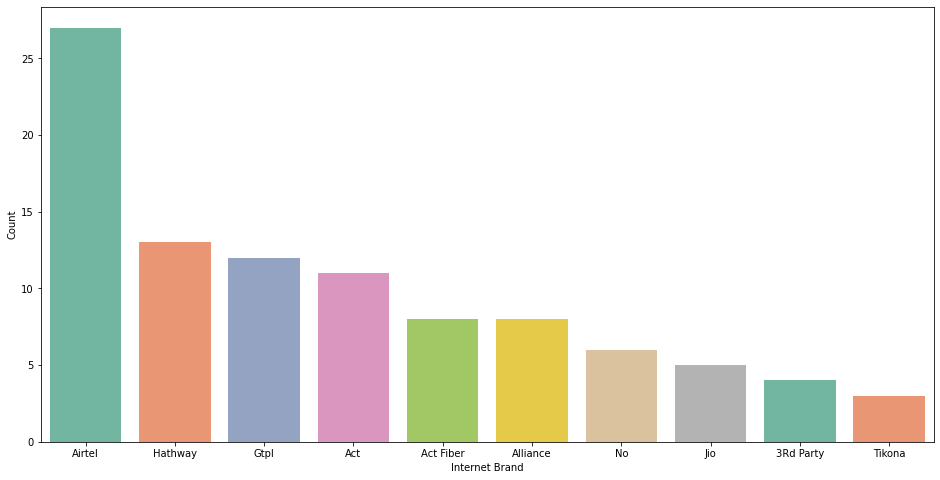

In [86]:
sns.barplot(x='Internet Brand',y='Count',data=brands,palette='Set2')
plt.show()

### Airtel is the most in-demand internet brand.

### Internet Speed

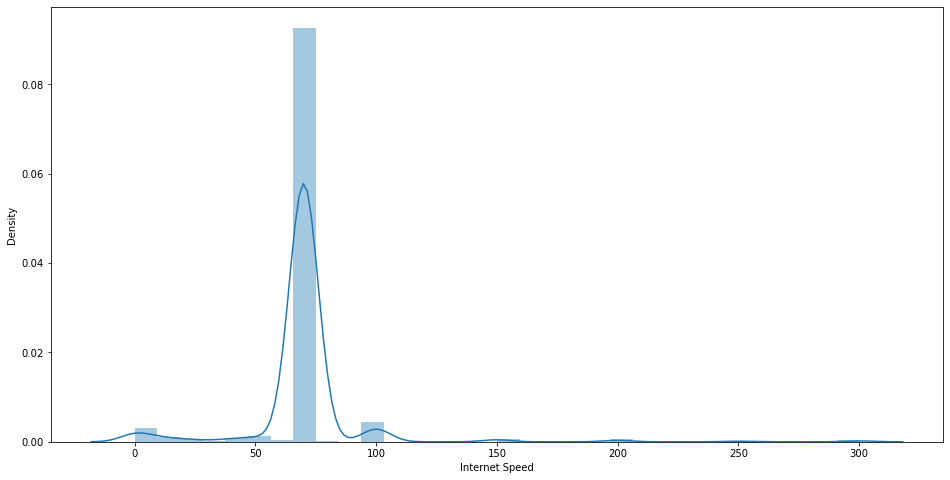

In [87]:
sns.distplot(tier1_data['Internet Speed'])
plt.show()

### Roughly, majority of the customers prefer around 60-70 mbps of internet network speed.

### Internet Monthly Cost

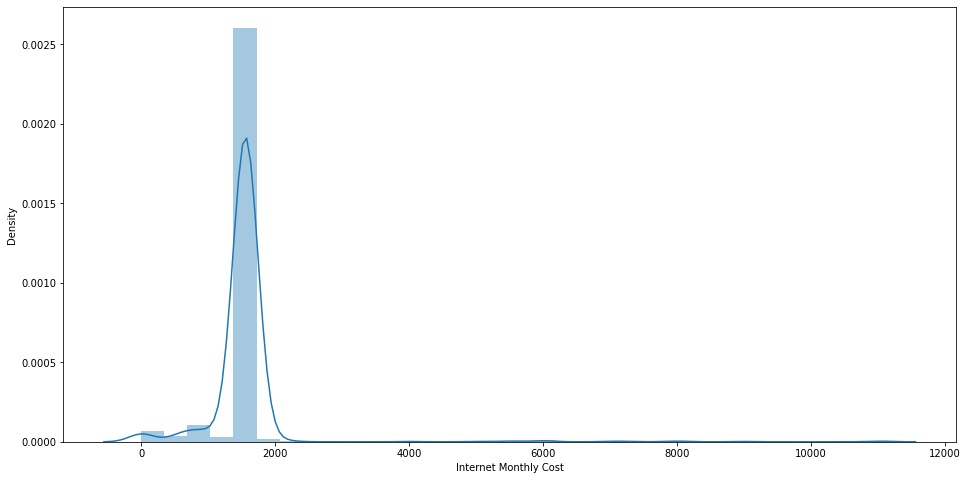

In [88]:
sns.distplot(tier1_data['Internet Monthly Cost'])
plt.show()

In [89]:
monthly_costs = tier1_data['Internet Monthly Cost'].value_counts().sort_values(ascending=False).reset_index()[:10]
monthly_costs.columns = ['Internet Monthly Cost','Count']
monthly_costs

Internet Monthly Cost  Count
0            1554.053097    923
1               0.000000     22
2            1000.000000     11
3             800.000000      8
4             700.000000      7
5            2000.000000      6
6            1200.000000      6
7             500.000000      5
8             999.000000      5
9            1500.000000      4

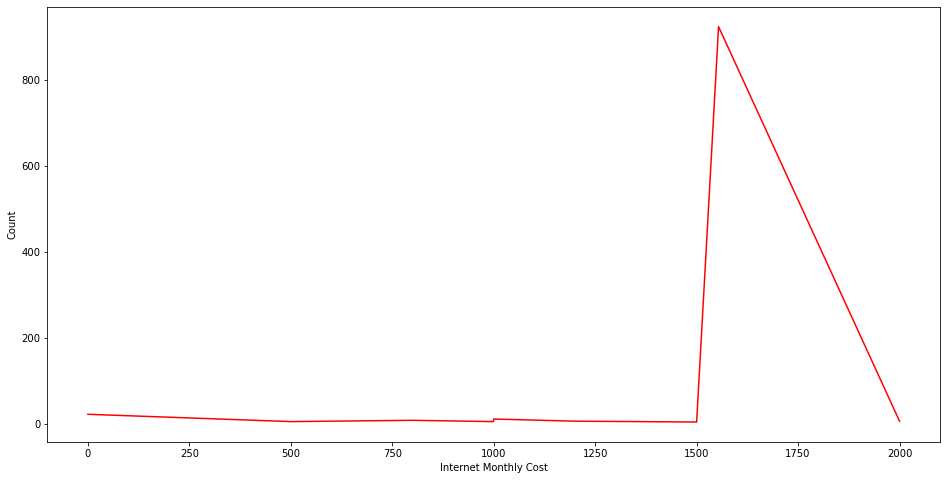

In [90]:
sns.lineplot(x='Internet Monthly Cost',y='Count',data=monthly_costs,palette='rainbow',n_boot=1200,color='red')
plt.show()

### Most of the companies charge ₹1500-1560 for their internet services per month.

### No. of Employees

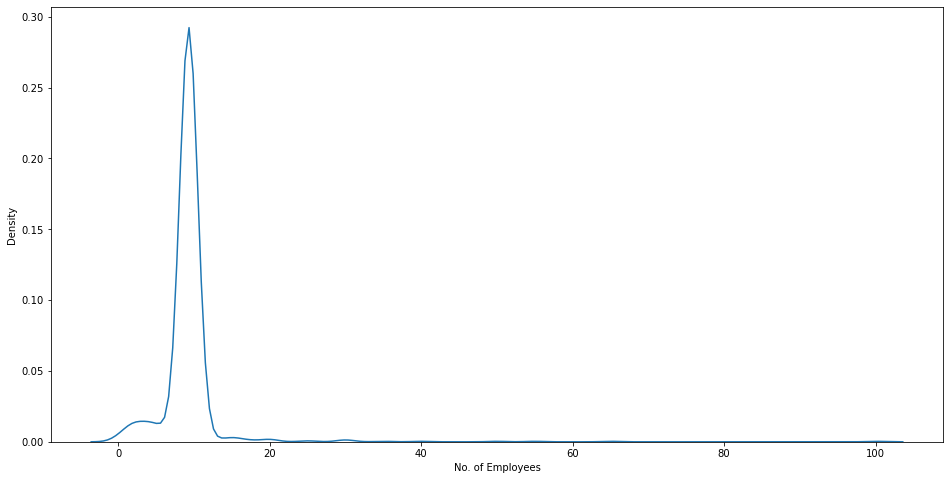

In [91]:
sns.kdeplot(x='No. of Employees',data=tier1_data)
plt.show()

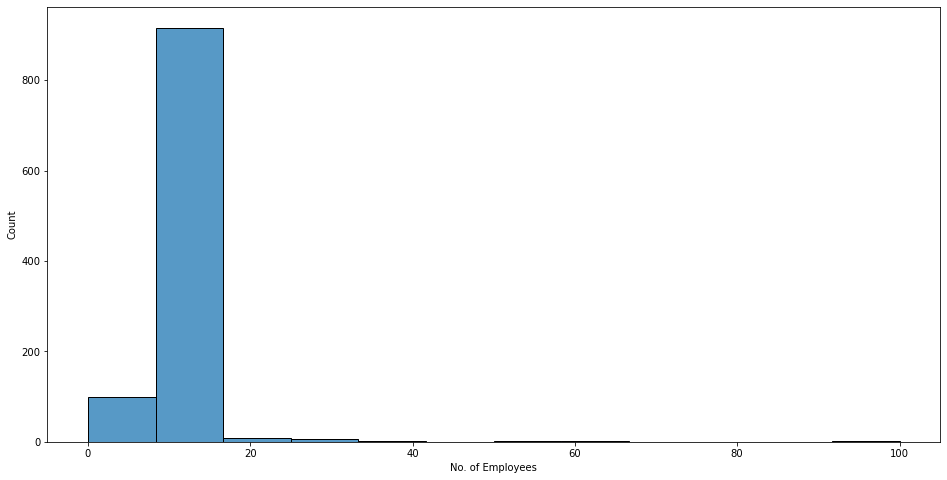

In [92]:
sns.histplot(x='No. of Employees',data=tier1_data)
plt.show()

### Majority of the photography companies have about 9-18 employees in their workforce.

### Monthly Orders

In [93]:
orders = tier1_data['Monthly Orders'].value_counts().sort_values(ascending=False).reset_index()[:10]
orders.columns = ['Monthly Orders','Frequency of Occurrence']
orders

Monthly Orders  Frequency of Occurrence
0       23.134831                      947
1        0.000000                       15
2       15.000000                        8
3        4.000000                        6
4       20.000000                        6
5        3.000000                        6
6       10.000000                        5
7        6.000000                        5
8        7.000000                        4
9       30.000000                        4

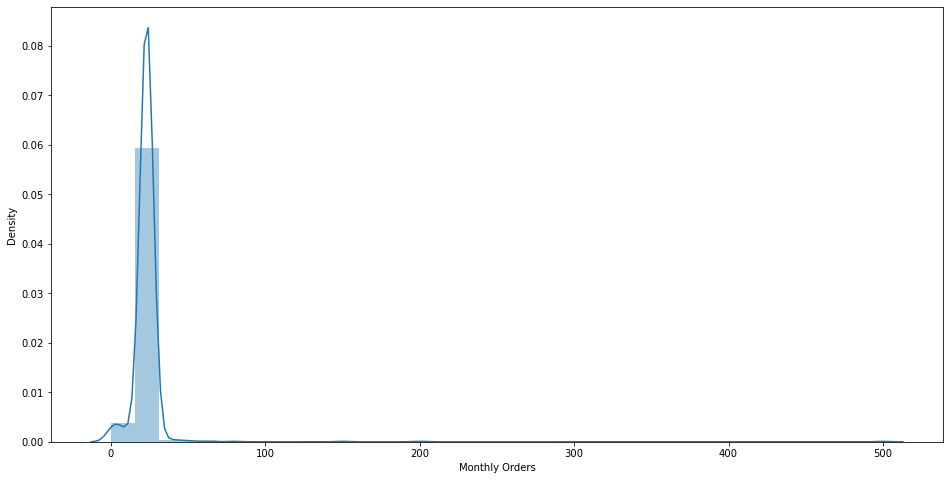

In [94]:
sns.distplot(tier1_data['Monthly Orders'])
plt.show()

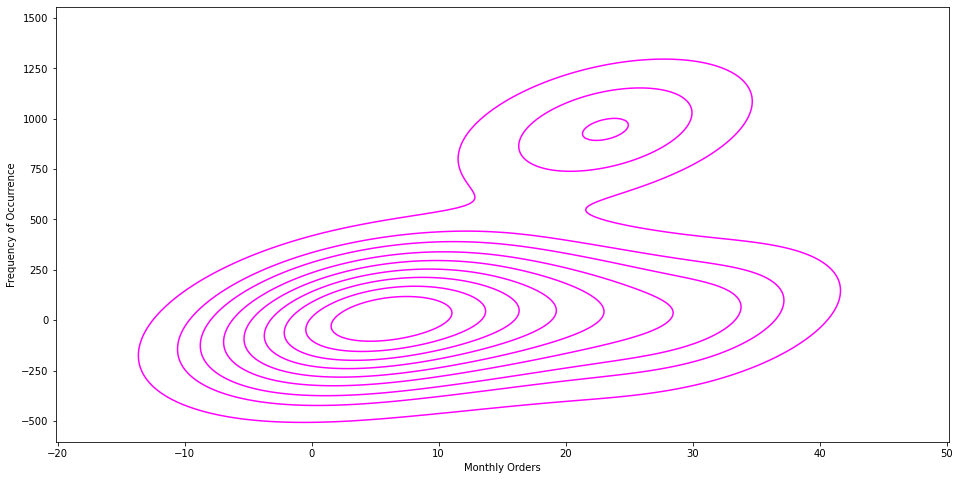

In [95]:
sns.kdeplot(x='Monthly Orders',y='Frequency of Occurrence',data=orders,color='magenta')
plt.show()

### Almost all the monthly orders have been made in the range of 0-25 with maximum number of monthly orders being concentrated between 20 and 25.

### Cloud Storage Used

In [96]:
cloud_storages = tier1_data['Cloud Storage Used'].value_counts().sort_values(ascending=False).reset_index()[:10]
cloud_storages.columns = ['Cloud Storage Used','Count']
cloud_storages

Cloud Storage Used  Count
0                Google Drive     56
1                    Not Used     22
2                    Pendrive     19
3             Hard Disk Drive     16
4                     Unknown     12
5                 Own Storage      6
6  Google Drive and One Drive      4
7                    SD Cards      3
8                    Drop Box      2
9                   One Drive      2

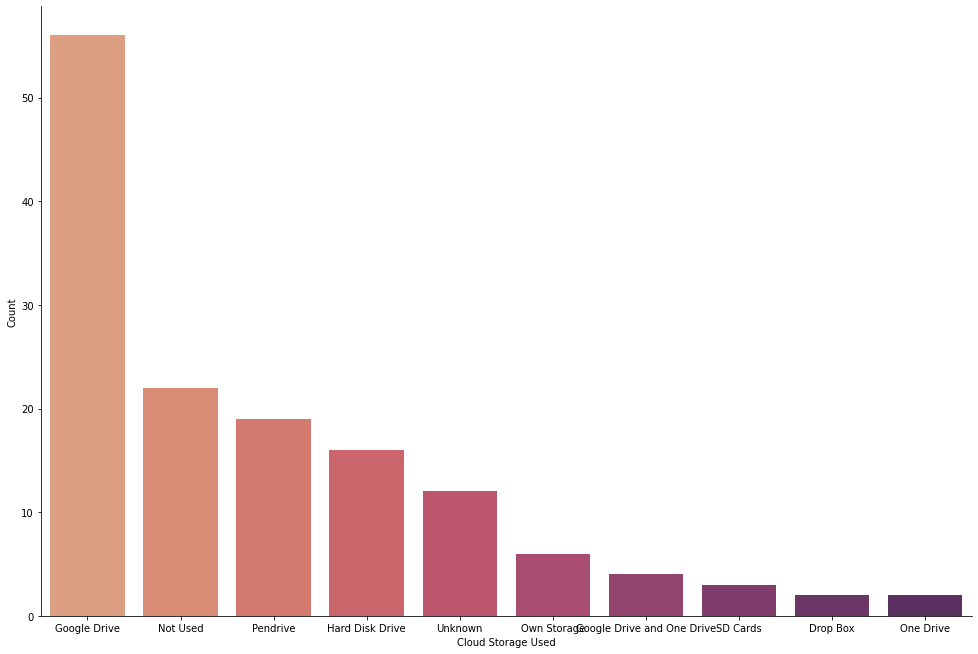

In [97]:
sns.catplot(x='Cloud Storage Used',y='Count',data=cloud_storages,kind='bar',palette='flare',height=9,aspect=1.5)
plt.show()

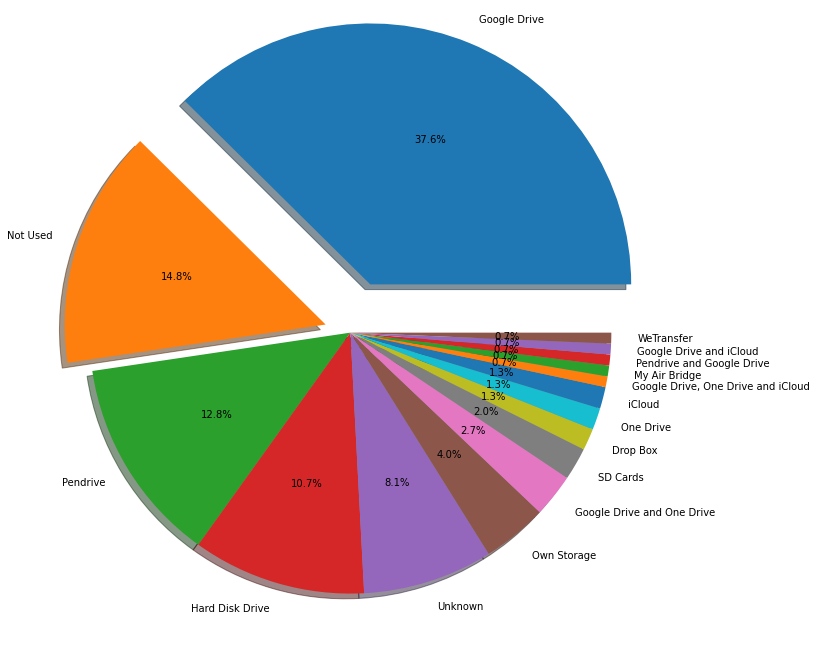

In [98]:
plt.figure(figsize=(12,12))
values = tier1_data['Cloud Storage Used'].value_counts().values
labels = tier1_data['Cloud Storage Used'].value_counts().keys()
explode = (0.2,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

### Google Drive is the most sought-after cloud storage provider among all the customers.

### Photo Selection Method

In [99]:
methods = tier1_data['Photo Selection Method'].value_counts().sort_values(ascending=False).reset_index()[:10]
methods.columns = ['Photo Selection Method','Count']
methods

Photo Selection Method  Count
0                         Client     14
1                Client Specific     14
2                      Photoshop     10
3                             No      9
4                       Manually      9
5                            Own      7
6                         Manual      7
7                           Self      6
8     Adobe Photoshop, Lightroom      6
9  Adobe Photoshop And Lightroom      6

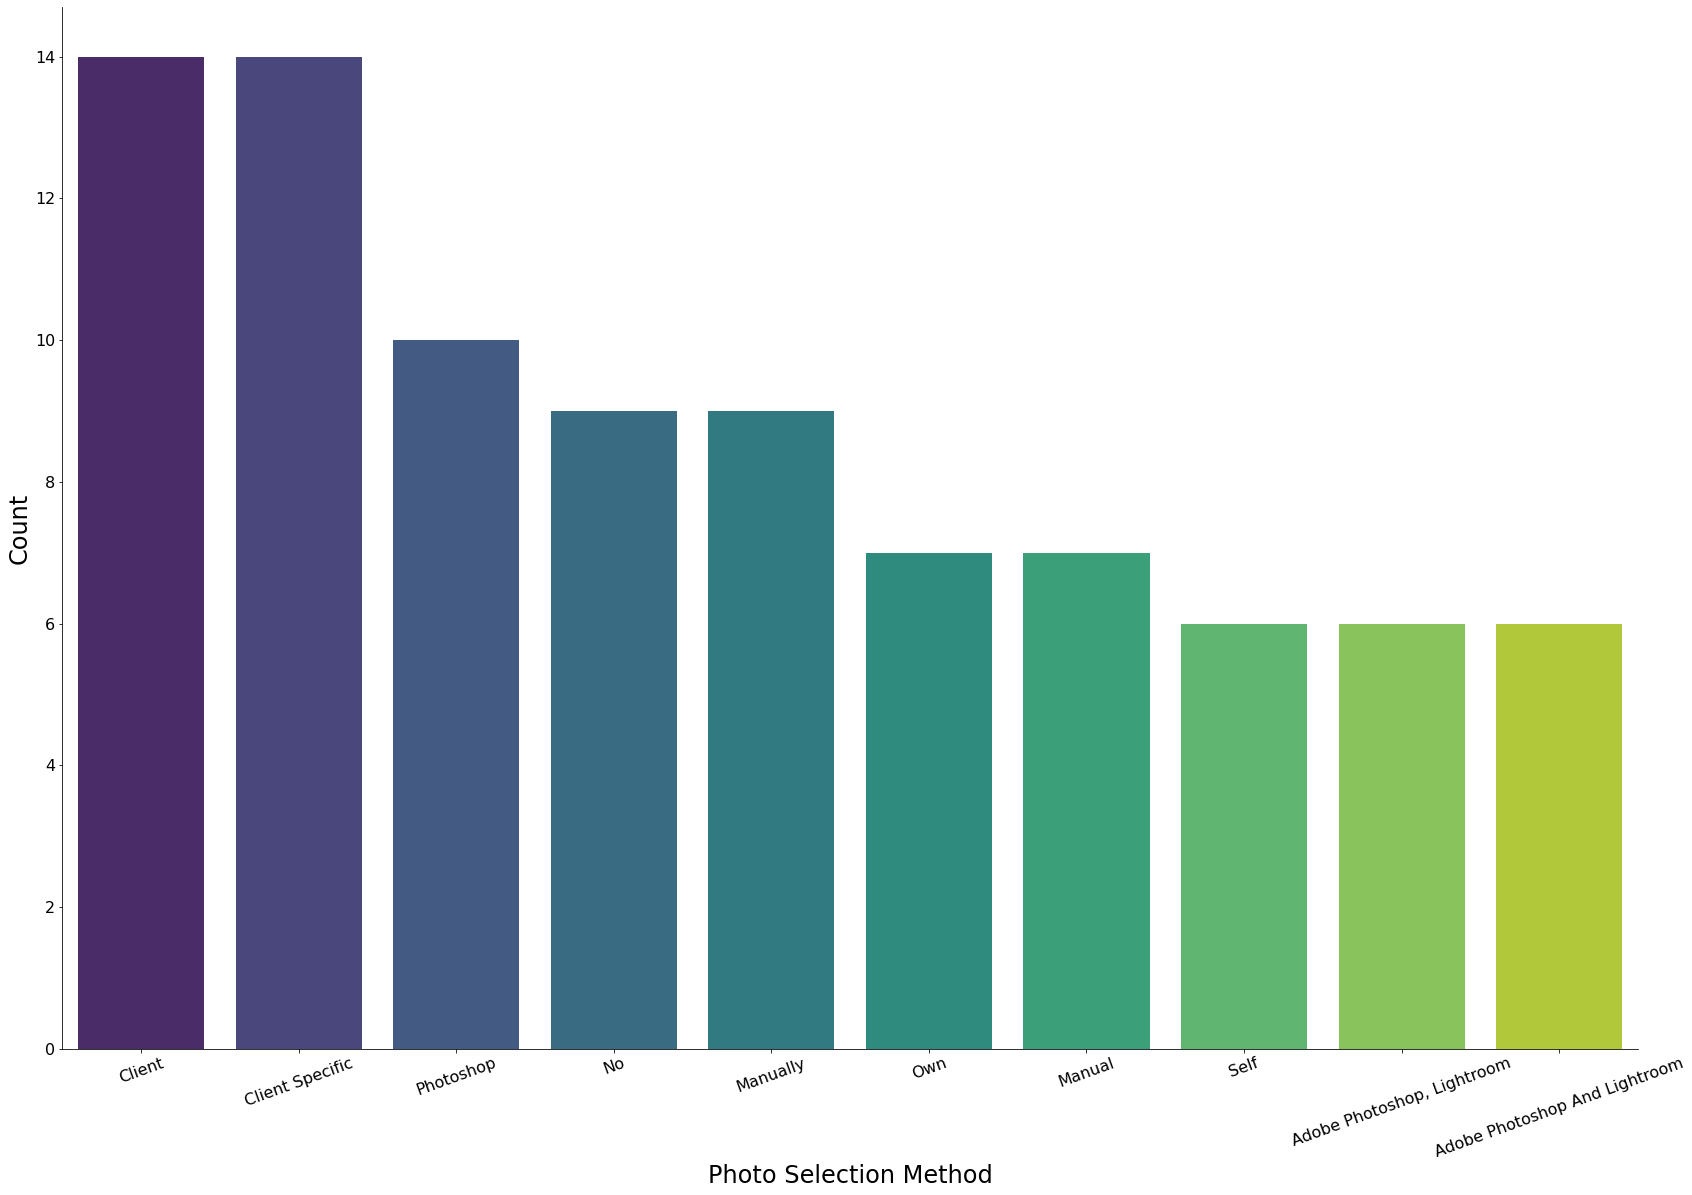

In [100]:
sns.catplot(x='Photo Selection Method',y='Count',data=methods,palette='viridis',kind='bar',height=15,aspect=1.5)
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16)
plt.xlabel('Photo Selection Method',fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.show()

## Photos have been selected according to the client requirements most frequently.

### E-Book

In [101]:
tier1_data['E-Book'].value_counts()

1.000000    1035
0.000000       1
Name: E-Book, dtype: int64

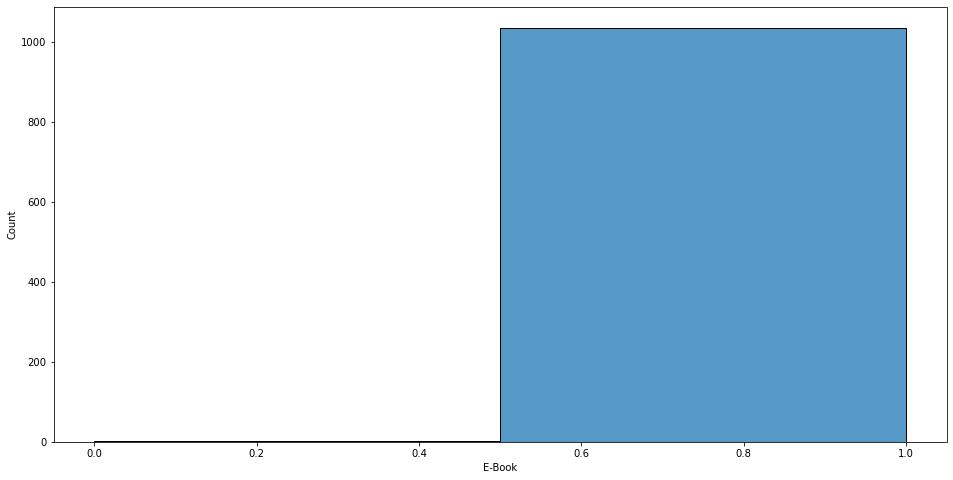

In [102]:
sns.histplot(x='E-Book',data=tier1_data,binwidth=0.5)
plt.show()

### Majority of the customers have purchased an E-book containing all their photographs.

### Album Designing

In [103]:
tier1_data['Album Designing'].value_counts()

1.000000    1032
0.000000       4
Name: Album Designing, dtype: int64

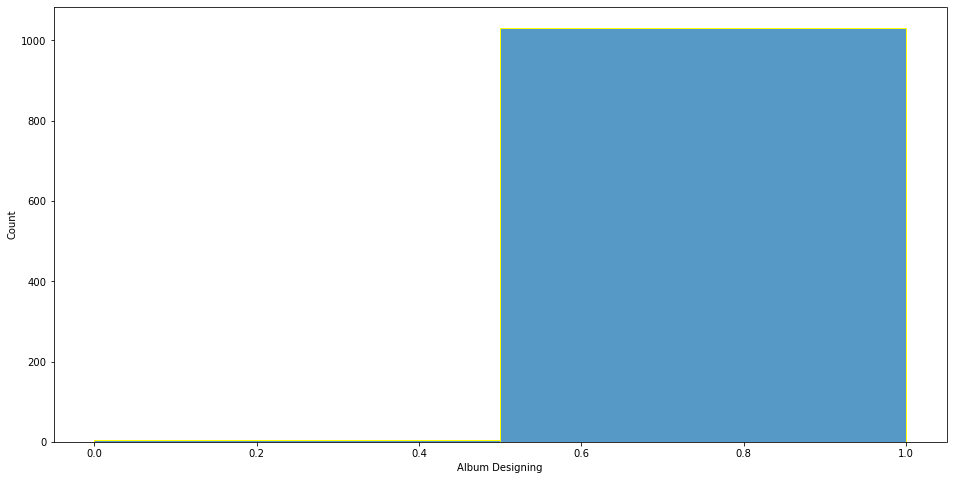

In [104]:
sns.histplot(x='Album Designing',data=tier1_data,binwidth=0.5,linewidth=1,edgecolor='yellow')
plt.show()

### Most of the customers have bought an album containing all their photographs.

## Statistical Univariate Analysis

In [105]:
for col in tier1_data.columns:
    if isinstance(tier1_data[col][0],(int,np.float64)):
        print('Mean of {}:'.format(col),np.round(tier1_data[col].mean(),2))
        print('Median of {}:'.format(col),np.round(tier1_data[col].median(),2))
        print('Maximum value of {}:'.format(col),tier1_data[col].max())
        print('Minimum value of  {}:'.format(col),tier1_data[col].min())
        print('Variance of {}:'.format(col),np.round(tier1_data[col].var(),2))
        print('Standard Deviation of {}:'.format(col),np.round(tier1_data[col].std(),2))
        print('Skewness of {}:'.format(col),np.round(tier1_data[col].skew(),2))
        print('Kurtosis of {}:'.format(col),np.round(tier1_data[col].kurtosis(),2))
        print()
        print()

Mean of Comment: 1.0
Median of Comment: 1.0
Maximum value of Comment: 1.0
Minimum value of  Comment: 0.0
Variance of Comment: 0.0
Standard Deviation of Comment: 0.07
Skewness of Comment: -14.31
Kurtosis of Comment: 203.19


Mean of No. of Employees: 9.3
Median of No. of Employees: 9.3
Maximum value of No. of Employees: 100.0
Minimum value of  No. of Employees: 0.0
Variance of No. of Employees: 22.76
Standard Deviation of No. of Employees: 4.77
Skewness of No. of Employees: 10.3
Kurtosis of No. of Employees: 159.9


Mean of Monthly Orders: 23.13
Median of Monthly Orders: 23.13
Maximum value of Monthly Orders: 500.0
Minimum value of  Monthly Orders: 0.0
Variance of Monthly Orders: 294.52
Standard Deviation of Monthly Orders: 17.16
Skewness of Monthly Orders: 22.21
Kurtosis of Monthly Orders: 590.47


Mean of Internet Speed: 69.97
Median of Internet Speed: 69.97
Maximum value of Internet Speed: 300.0
Minimum value of  Internet Speed: 0.0
Variance of Internet Speed: 581.79
Standard Deviati

# Bivariate Analysis

## Let's find which companies provide the most expensive internet monthly plans.

In [106]:
name_costs = tier1_data.groupby('Name')['Internet Monthly Cost'].max().sort_values(ascending=False).reset_index()[:10]
name_costs

Name  Internet Monthly Cost
0         Photographer, Pre Wedding, Maternity Shoot           11000.000000
1                                        Real Studio           11000.000000
2                      Chennai Wedding Photographers            9000.000000
3  Ajinkya Jadhav Photographyi Best Wedding, Pre-...            8000.000000
4                                        Gfotografie            8000.000000
5                                      Denipi Studio            7200.000000
6                           Ronak Ramani Photography            7000.000000
7                               Vipul Digital Studio            6000.000000
8                             Darsh Shah Photography            6000.000000
9                Candid Wedding Photography & Films™            6000.000000

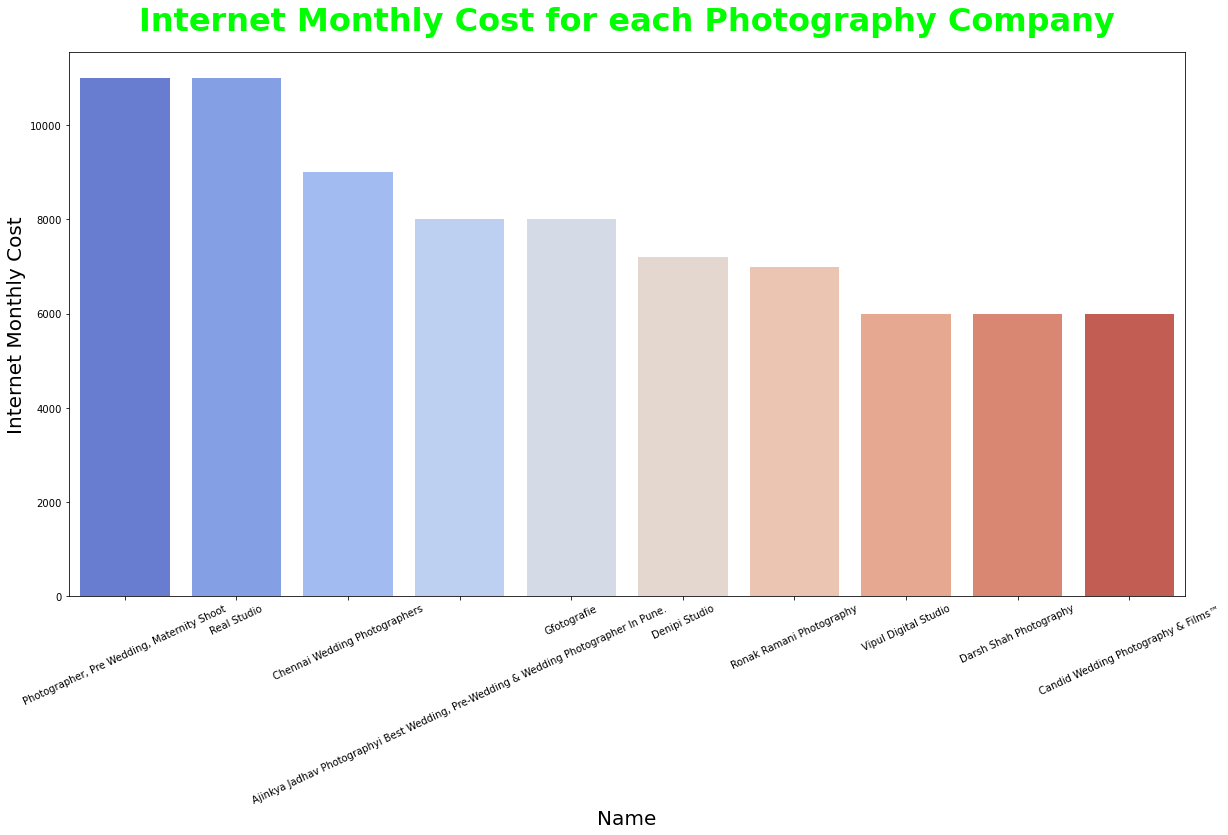

In [107]:
plt.figure(figsize=(20,10))
sns.barplot(x='Name',y='Internet Monthly Cost',data=name_costs,palette='coolwarm')
plt.xticks(rotation=25)
plt.xlabel('Name',fontsize=20)
plt.ylabel('Internet Monthly Cost',fontsize=20)
plt.title('Internet Monthly Cost for each Photography Company',fontsize=32,color='lime',pad=22,fontweight='bold')
plt.show()

## Photographer, pre wedding and maternity shoot companies along with Real Studio charge the highest for the internet monthly cost.

## Let's find out which companies provides the maximum internet network speed.

In [108]:
name_costs = tier1_data.groupby('Name')['Internet Speed'].max().sort_values(ascending=False).reset_index()[:10]
name_costs

Name  Internet Speed
0                                    Momentz Gallery      300.000000
1                              Vbookmark Photography      300.000000
2  Candigram - Wedding Photographers In Chennai C...      300.000000
3  Fopic Studio - Best Wedding Photographer In De...      250.000000
4                                    Inclined Studio      250.000000
5                                Imagine Photography      200.000000
6  Wide Angle Photos & Events - Best Wedding Phot...      200.000000
7                         Shishir Gaurav Photography      200.000000
8                               Ck Photography India      200.000000
9                      Chennai Wedding Photographers      150.000000

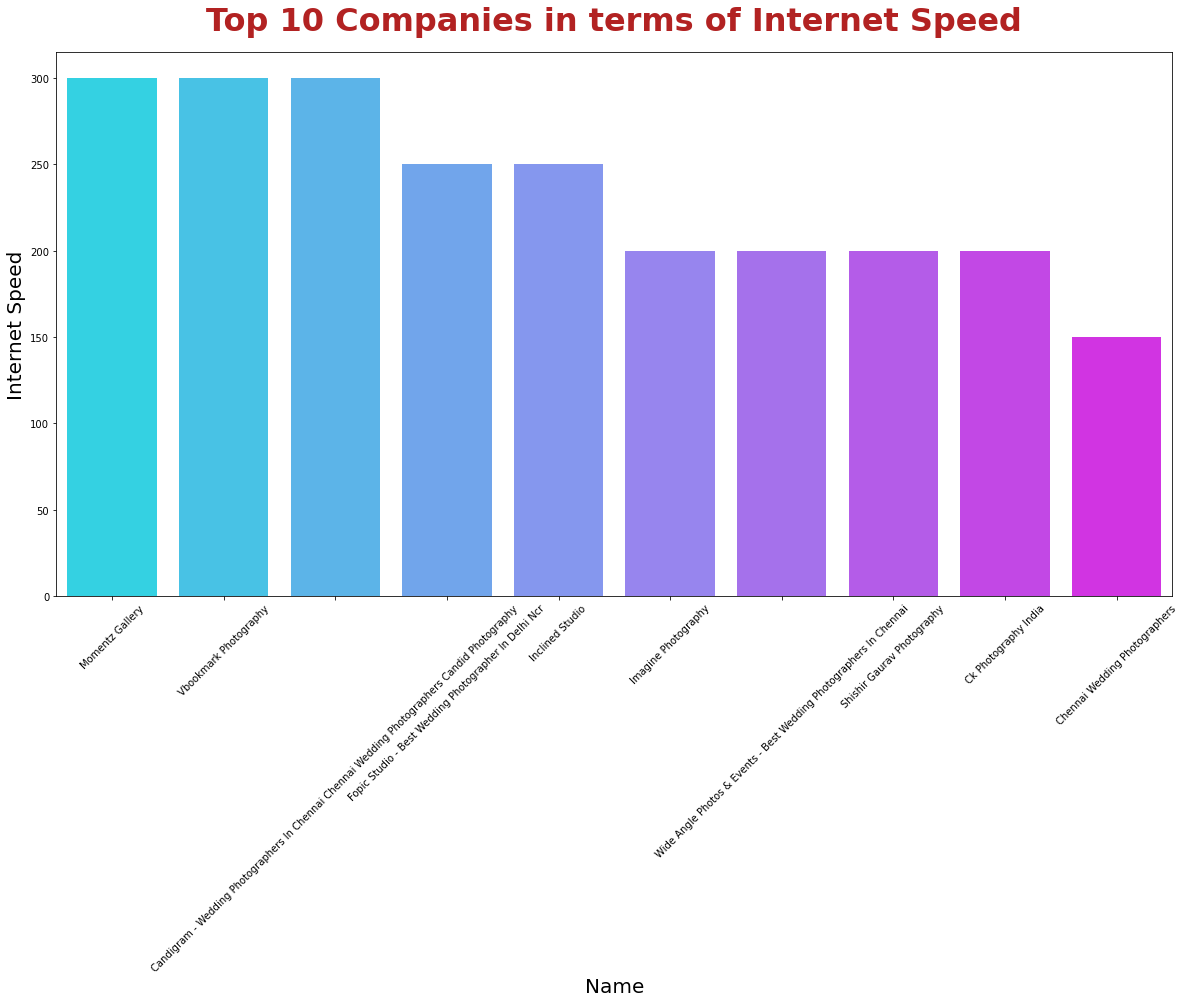

In [109]:
plt.figure(figsize=(20,10))
sns.barplot(x='Name',y='Internet Speed',data=name_costs,palette='cool')
plt.xticks(rotation=45)
plt.xlabel('Name',fontsize=20)
plt.ylabel('Internet Speed',fontsize=20)
plt.title('Top 10 Companies in terms of Internet Speed',fontsize=32,color='firebrick',pad=22,fontweight='bold')
plt.show()

### Momentz Gallery, Vbookmark Photography and Candigram, wedding photographers in Chennai(Candid photography) provide the maximum internet network speed of about 300 mbps.

## Let's check which companies have the maximum number of employees.

In [110]:
name_costs = tier1_data.groupby('Name')['No. of Employees'].max().sort_values(ascending=False).reset_index()[:10]
name_costs

Name  No. of Employees
0                             Nyra Event Photography        100.000000
1                                Imagine Photography         65.000000
2                                   Portfolio Studio         55.000000
3  Fopic Studio - Best Wedding Photographer In De...         40.000000
4    Bangaliana Photography Ography In North Kolkata         35.000000
5                                    Minakshi Studio         30.000000
6                                 S L Art Production         30.000000
7  Candigram - Wedding Photographers In Chennai C...         30.000000
8                                 Ud Album Designing         30.000000
9                                        Gfotografie         25.000000

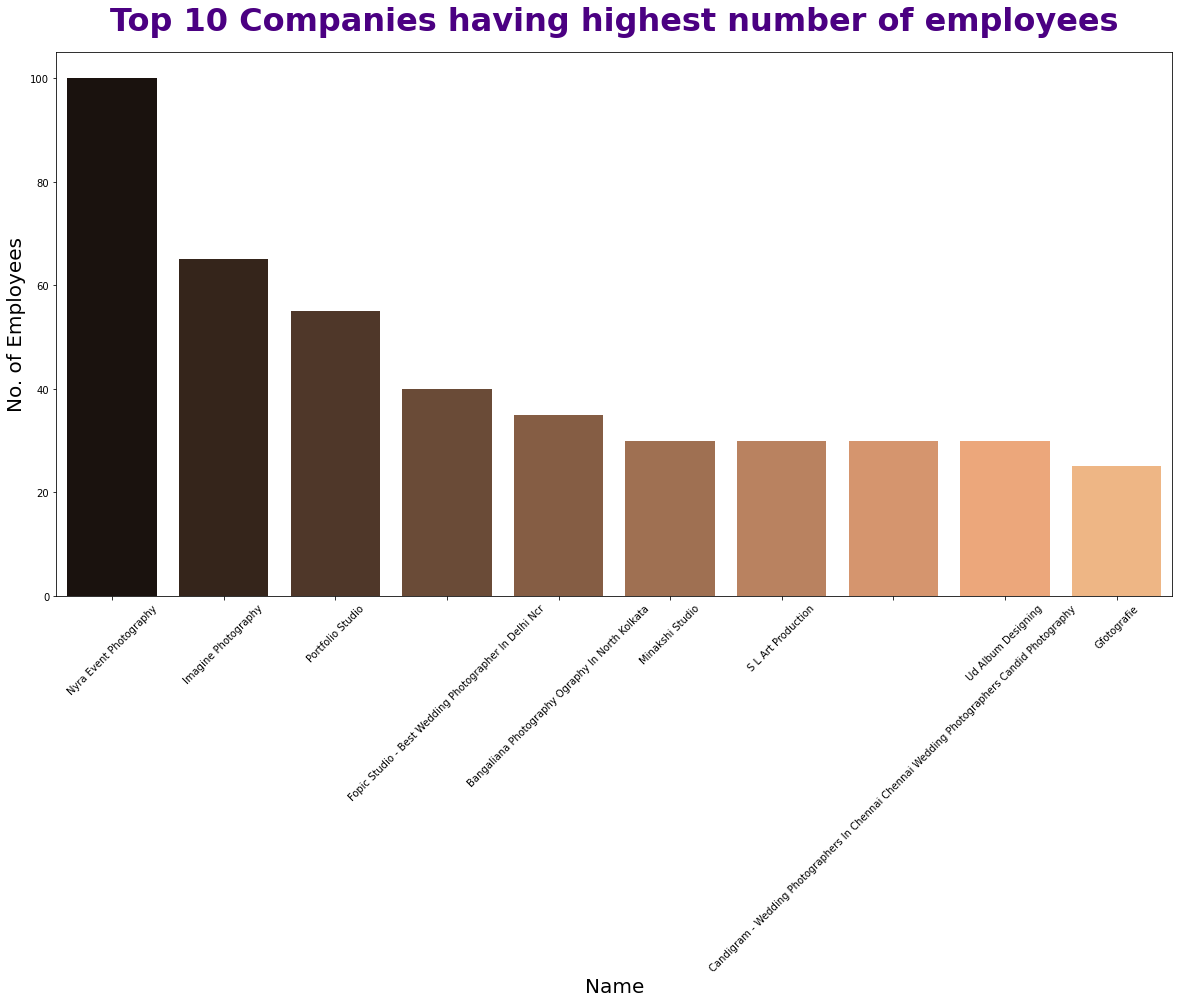

In [111]:
plt.figure(figsize=(20,10))
sns.barplot(x='Name',y='No. of Employees',data=name_costs,palette='copper')
plt.xticks(rotation=45)
plt.xlabel('Name',fontsize=20)
plt.ylabel('No. of Employees',fontsize=20)
plt.title('Top 10 Companies having highest number of employees',fontsize=32,color='indigo',pad=22,fontweight='bold')
plt.show()

### Nyra Event Photography has the highest number of employees among all the photography companies.

In [112]:
name_costs = tier1_data.groupby('Name')['Monthly Orders'].max().sort_values(ascending=False).reset_index()[:10]
name_costs

Name  Monthly Orders
0                          Avigyan Roy Photography      500.000000
1                       Delhi Photography Services      200.000000
2                             Atlantis Photography      150.000000
3                              Girish Photo Studio       80.000000
4  Bangaliana Photography Ography In North Kolkata       65.000000
5                                          La Vida       50.000000
6              Candid Wedding Photography & Films™       50.000000
7                                  Inclined Studio       45.000000
8                             The Wedding Exposure       40.000000
9                    Nachiket Sonawane Photography       35.000000

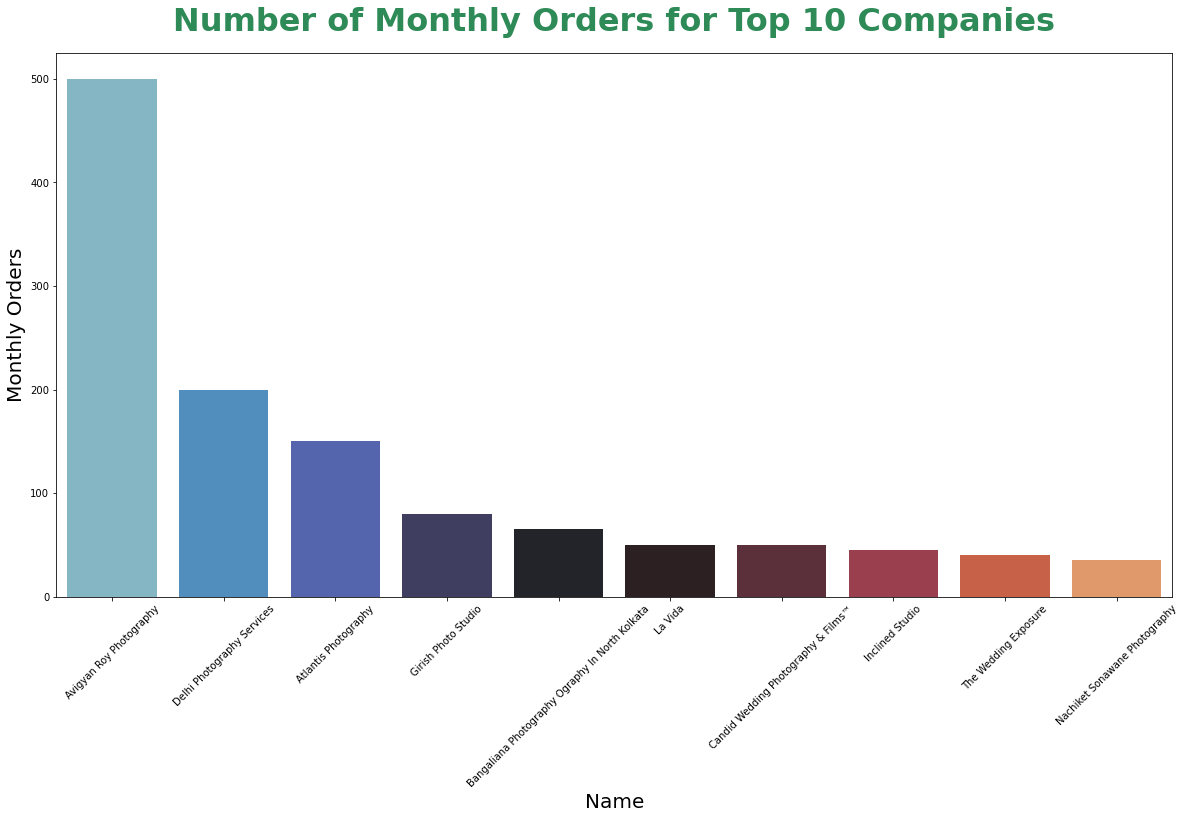

In [113]:
plt.figure(figsize=(20,10))
sns.barplot(x='Name',y='Monthly Orders',data=name_costs,palette='icefire')
plt.xticks(rotation=45)
plt.xlabel('Name',fontsize=20)
plt.ylabel('Monthly Orders',fontsize=20)
plt.title('Number of Monthly Orders for Top 10 Companies',fontsize=32,color='seagreen',pad=22,fontweight='bold')
plt.show()

### Avigyan Roy Photography has got the maximum number of monthly orders among all the photography companies.

## Let's check which location receives the maximum monthly orders.

In [114]:
name_costs = tier1_data.groupby('Location')['Monthly Orders'].max().sort_values(ascending=False).reset_index()[:10]
name_costs

Location  Monthly Orders
0                        Kolkata       500.000000
1                           Delhi      200.000000
2                       Ahmedabad       80.000000
3            Hyderabad, Telangana       60.000000
4               Pune, Maharashtra       35.000000
5                       Hyderabad       23.134831
6         Secunderabad, Telangana       23.134831
7  Pune, Maharashtra · In PEBBLES       23.134831
8   Pimpri-Chinchwad, Maharashtra       23.134831
9      Manikonda Jagir, Telangana       23.134831

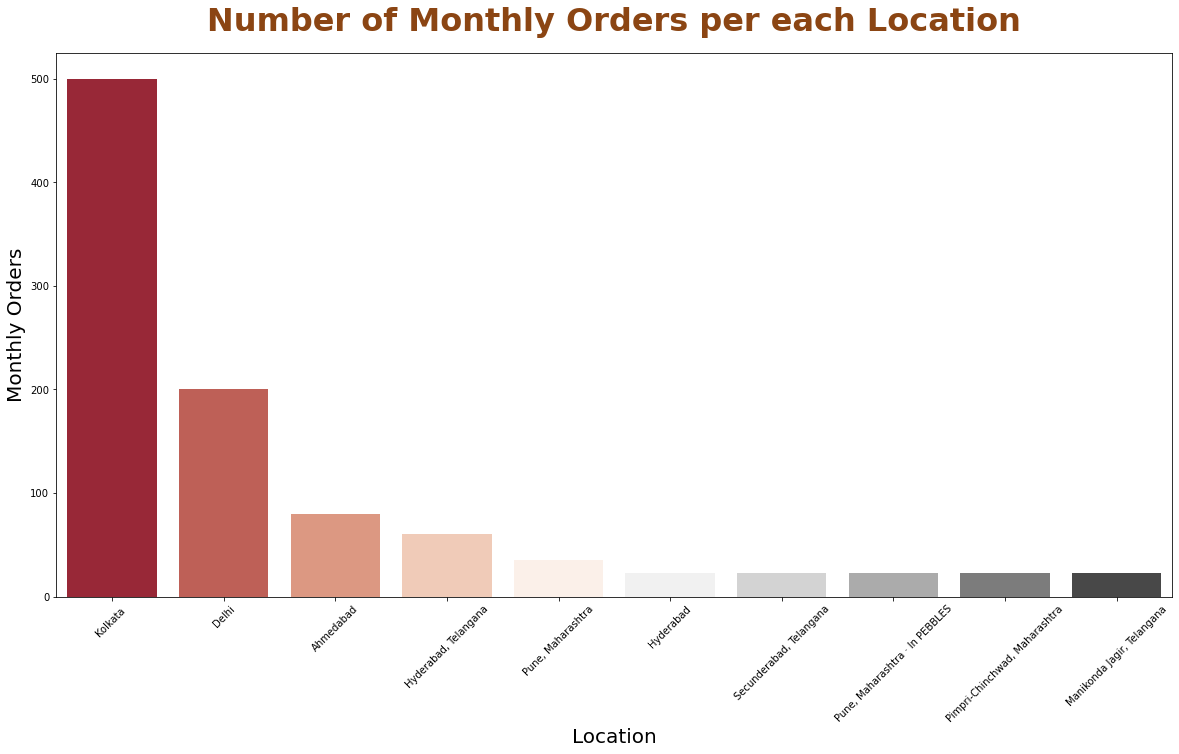

In [115]:
plt.figure(figsize=(20,10))
sns.barplot(x='Location',y='Monthly Orders',data=name_costs,palette='RdGy')
plt.xticks(rotation=45)
plt.xlabel('Location',fontsize=20)
plt.ylabel('Monthly Orders',fontsize=20)
plt.title('Number of Monthly Orders per each Location',fontsize=32,color='saddlebrown',pad=22,fontweight='bold')
plt.show()

### The photography companies of Kolkata receive the highest number of monthly orders.

## Let's examine which location charges the most for its monthly internet plans.

In [116]:
name_costs = tier1_data.groupby('Location')['Internet Monthly Cost'].max().sort_values(ascending=False).reset_index()[:10]
name_costs

Location  Internet Monthly Cost
0                       Ahmedabad           11000.000000
1               Pune, Maharashtra           11000.000000
2                         Chennai            9000.000000
3                           Delhi            8000.000000
4            Bengaluru, Karnataka            2250.000000
5            Hyderabad, Telangana            2000.000000
6                        Kolkata             1600.000000
7                       Hyderabad            1554.053097
8         Secunderabad, Telangana            1554.053097
9  Pune, Maharashtra · In PEBBLES            1554.053097

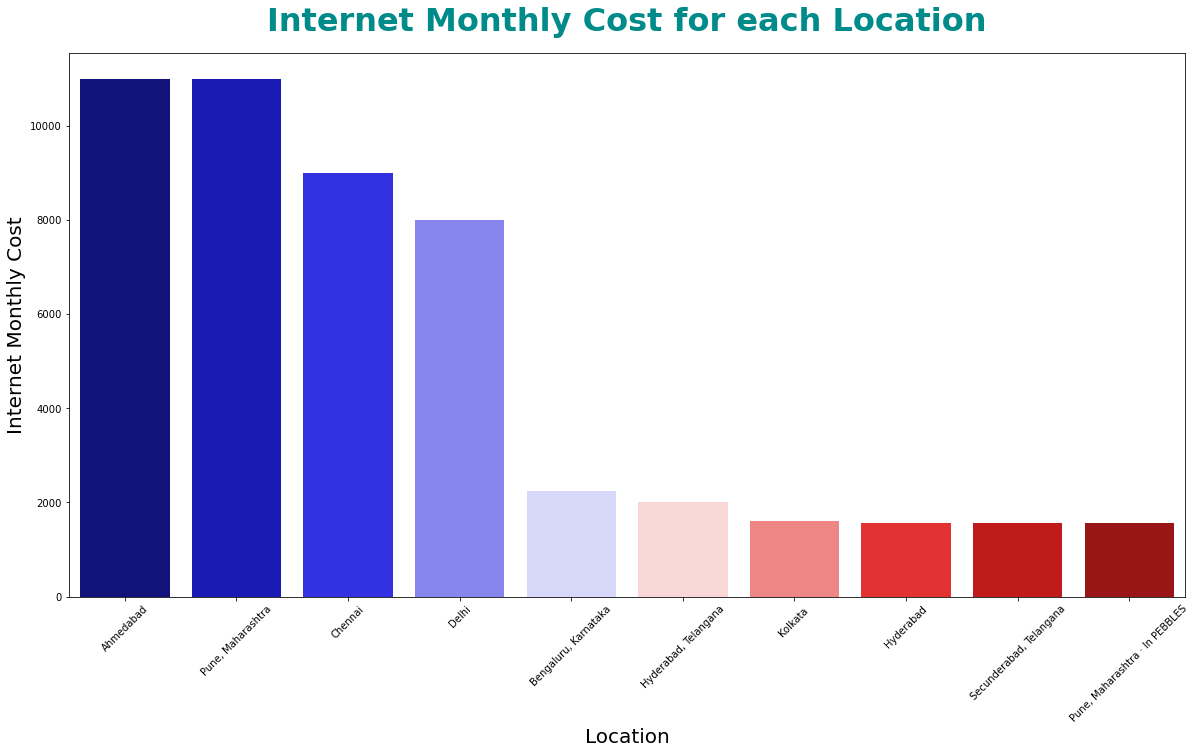

In [117]:
plt.figure(figsize=(20,10))
sns.barplot(x='Location',y='Internet Monthly Cost',data=name_costs,palette='seismic')
plt.xticks(rotation=45)
plt.xlabel('Location',fontsize=20)
plt.ylabel('Internet Monthly Cost',fontsize=20)
plt.title('Internet Monthly Cost for each Location',fontsize=32,color='darkcyan',pad=22,fontweight='bold')
plt.show()

### The photography companies of Ahmedabad and Pune in Maharashtra provide the most expensive internet monthly plans.

## Let's find out that the photography companies of which location provide the fastest internet network.

In [118]:
name_costs = tier1_data.groupby('Location')['Internet Speed'].max().sort_values(ascending=False).reset_index()[:10]
name_costs

Location  Internet Speed
0                                 Delhi      300.000000
1                  Bengaluru, Karnataka      300.000000
2                               Chennai      300.000000
3                             Ahmedabad      250.000000
4                     Pune, Maharashtra      200.000000
5                  Hyderabad, Telangana      200.000000
6            Manikonda Jagir, Telangana      100.000000
7                              Kolkata       100.000000
8  Hyderabad, Telangana · In SVSS Nivas      100.000000
9                             Telangana      100.000000

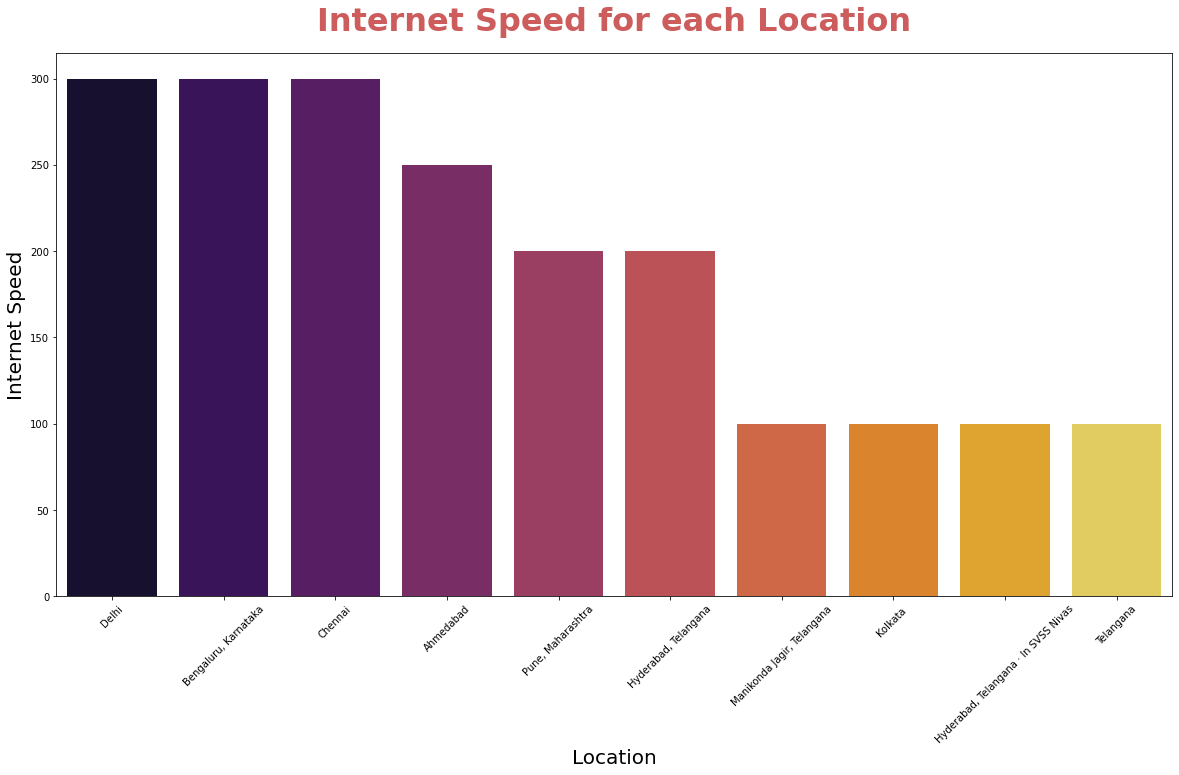

In [119]:
plt.figure(figsize=(20,10))
sns.barplot(x='Location',y='Internet Speed',data=name_costs,palette='inferno')
plt.xticks(rotation=45)
plt.xlabel('Location',fontsize=20)
plt.ylabel('Internet Speed',fontsize=20)
plt.title('Internet Speed for each Location',fontsize=32,color='indianred',pad=22,fontweight='bold')
plt.show()

### The photography companies in Delhi, Bengaluru in Karnataka and Chennai provide the fastest internet network.

## Let's perceive the photography companies of which location have the highest number of employees.

In [120]:
name_costs = tier1_data.groupby('Location')['No. of Employees'].max().sort_values(ascending=False).reset_index()[:10]
name_costs

Location  No. of Employees
0                           Delhi        100.000000
1            Hyderabad, Telangana         50.000000
2                        Kolkata          35.000000
3                       Ahmedabad         30.000000
4                         Chennai         30.000000
5            Bengaluru, Karnataka         12.000000
6               Pune, Maharashtra         12.000000
7                       Hyderabad          9.304636
8         Secunderabad, Telangana          9.304636
9  Pune, Maharashtra · In PEBBLES          9.304636

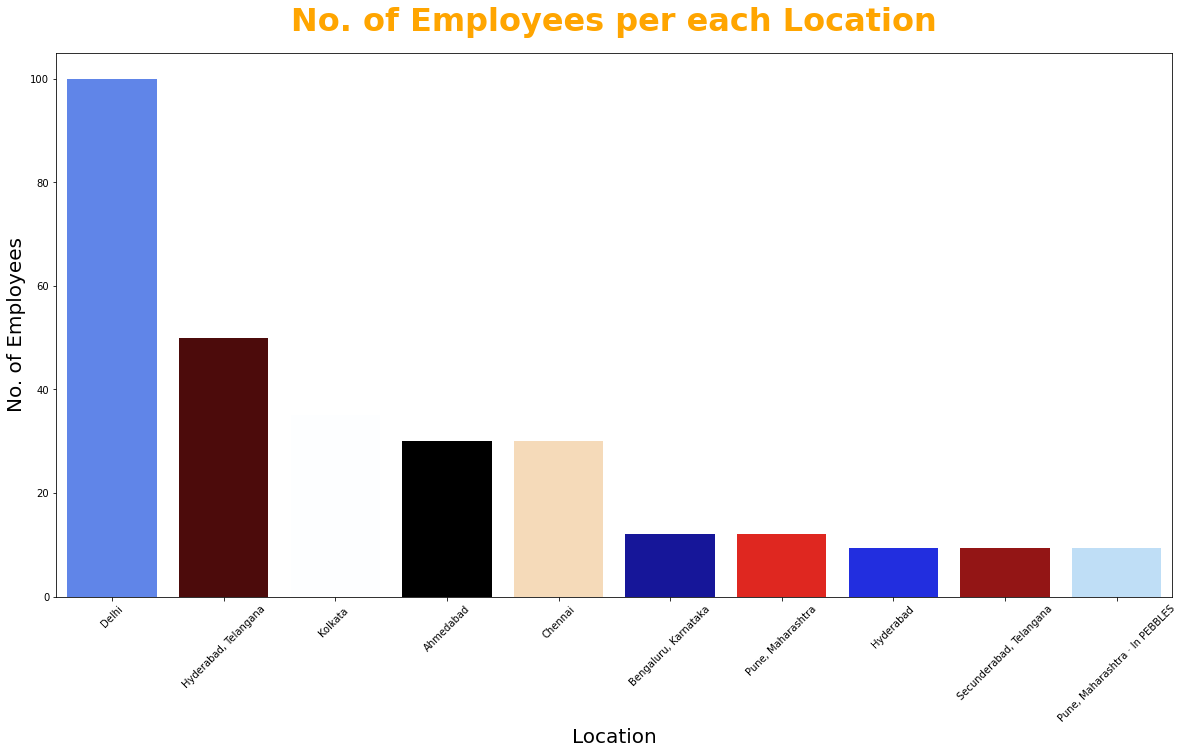

In [121]:
plt.figure(figsize=(20,10))
sns.barplot(x='Location',y='No. of Employees',data=name_costs,palette='flag')
plt.xticks(rotation=45)
plt.xlabel('Location',fontsize=20)
plt.ylabel('No. of Employees',fontsize=20)
plt.title('No. of Employees per each Location',fontsize=32,color='orange',pad=22,fontweight='bold')
plt.show()

### The photography companies of Delhi have the highest number of employees.

## Let's detect which location receives the highest number of monthly orders.

In [122]:
name_costs = tier1_data.groupby('Location')['Monthly Orders'].max().sort_values(ascending=False).reset_index()[:10]
name_costs

Location  Monthly Orders
0                        Kolkata       500.000000
1                           Delhi      200.000000
2                       Ahmedabad       80.000000
3            Hyderabad, Telangana       60.000000
4               Pune, Maharashtra       35.000000
5                       Hyderabad       23.134831
6         Secunderabad, Telangana       23.134831
7  Pune, Maharashtra · In PEBBLES       23.134831
8   Pimpri-Chinchwad, Maharashtra       23.134831
9      Manikonda Jagir, Telangana       23.134831

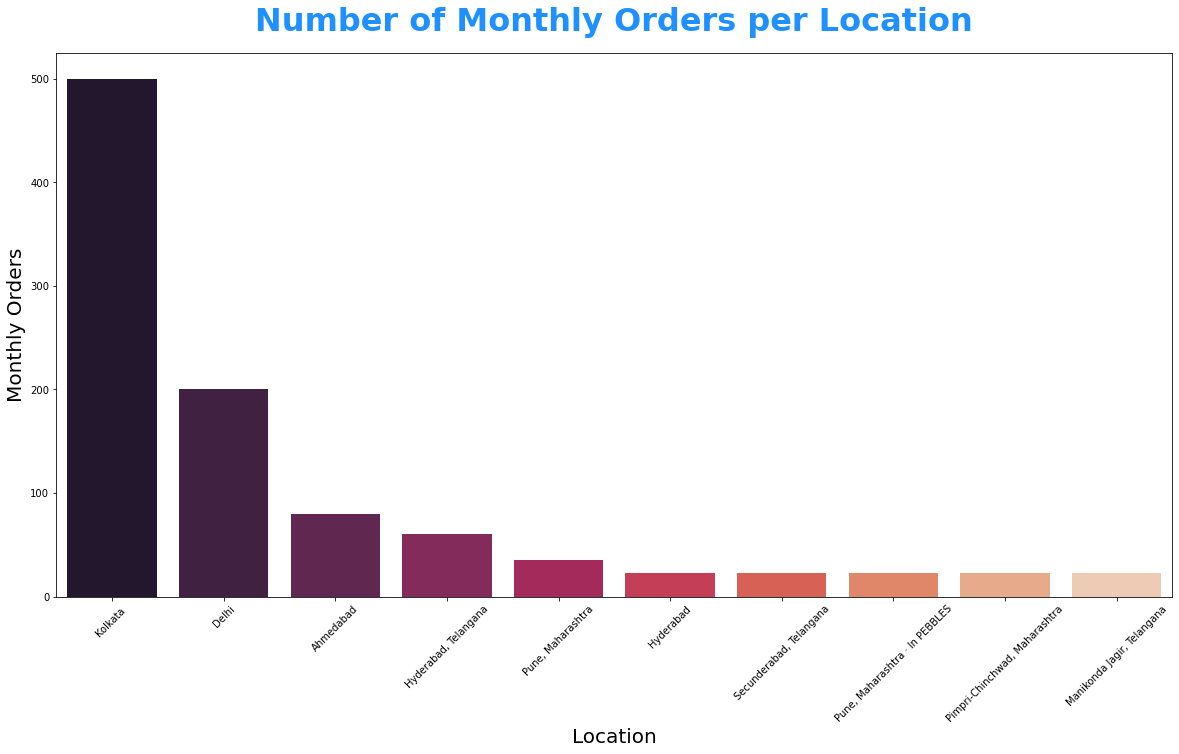

In [123]:
plt.figure(figsize=(20,10))
sns.barplot(x='Location',y='Monthly Orders',data=name_costs,palette='rocket')
plt.xticks(rotation=45)
plt.xlabel('Location',fontsize=20)
plt.ylabel('Monthly Orders',fontsize=20)
plt.title('Number of Monthly Orders per Location',fontsize=32,color='dodgerblue',pad=22,fontweight='bold')
plt.show()

### The photography companies of Kolkata receive the highest number of monthly orders.

## Let's find out which type of photography companies provide the fastest internet network.

In [124]:
name_costs = tier1_data.groupby('Type')['Internet Speed'].max().sort_values(ascending=False).reset_index()[:10]
name_costs

Type  Internet Speed
0               Wedding photographer      300.000000
1                 Photography studio      300.000000
2                       Photographer      250.000000
3                Photography service      200.000000
4                    Portrait studio      100.000000
5  No reviews · Wedding photographer      100.000000
6                          Photo lab      100.000000
7                         Photo shop      100.000000
8           Advertising Photographer      100.000000
9                Aerial photographer      100.000000

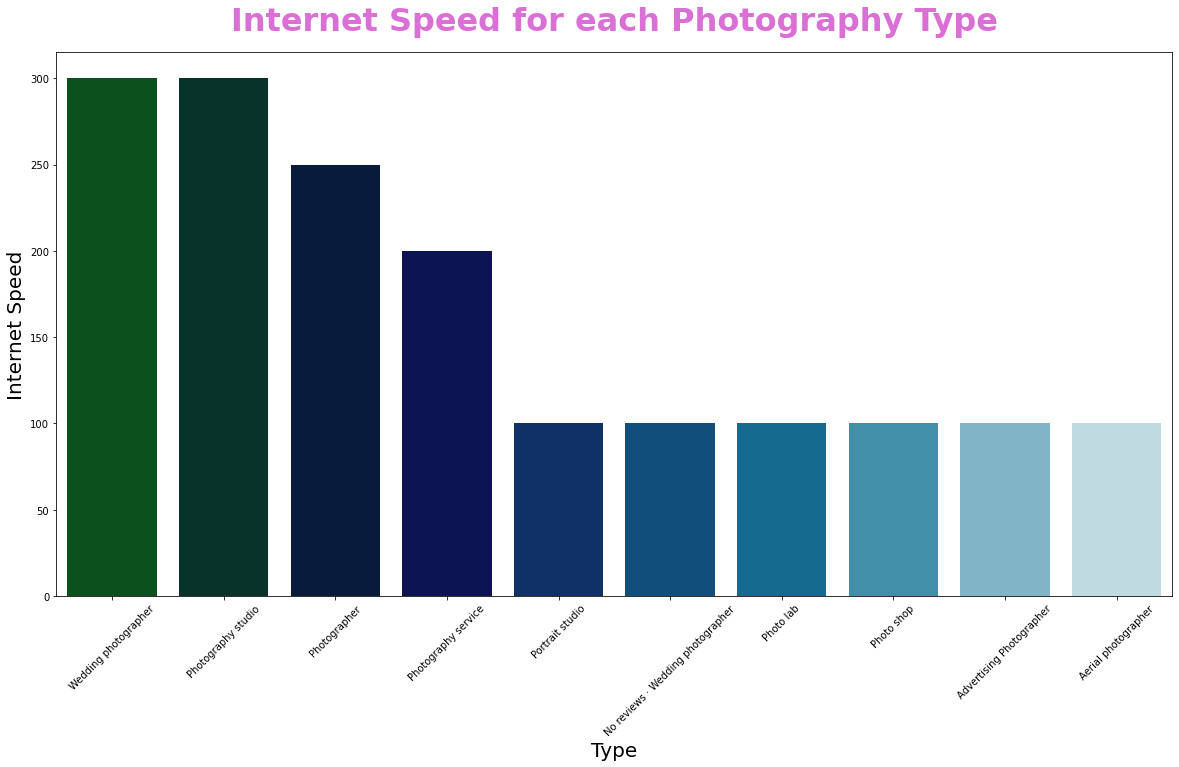

In [125]:
plt.figure(figsize=(20,10))
sns.barplot(x='Type',y='Internet Speed',data=name_costs,palette='ocean')
plt.xticks(rotation=45)
plt.xlabel('Type',fontsize=20)
plt.ylabel('Internet Speed',fontsize=20)
plt.title('Internet Speed for each Photography Type',fontsize=32,color='orchid',pad=22,fontweight='bold')
plt.show()

### Wedding photography and photography studio companies provide the fastest internet network.

In [126]:
name_costs = tier1_data.groupby('Type')['Internet Monthly Cost'].max().sort_values(ascending=False).reset_index()[:10]
name_costs

Type  Internet Monthly Cost
0       Wedding photographer           11000.000000
1               Photographer            8000.000000
2         Photography studio            7200.000000
3            Portrait studio            5500.000000
4        Photography service            4000.000000
5   Advertising Photographer            1554.053097
6                 Photo shop            1554.053097
7     Model portfolio studio            1554.053097
8            Modeling agency            1554.053097
9  No reviews · Photographer            1554.053097

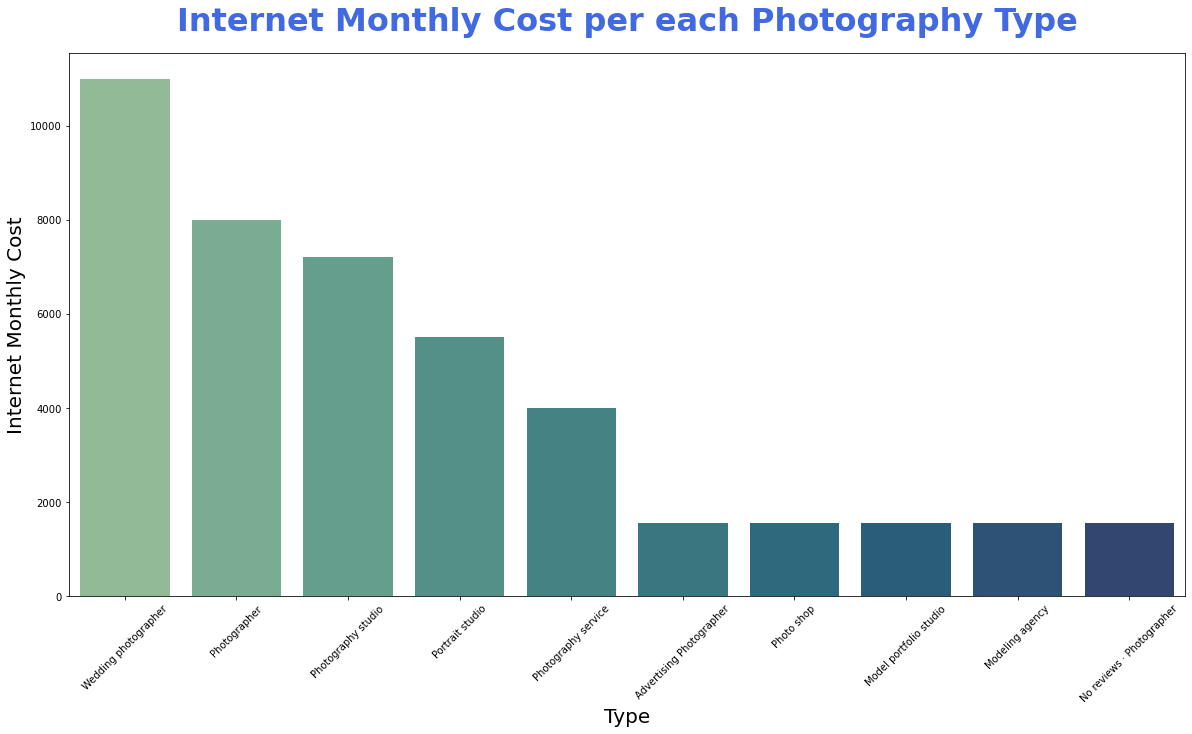

In [127]:
plt.figure(figsize=(20,10))
sns.barplot(x='Type',y='Internet Monthly Cost',data=name_costs,palette='crest')
plt.xticks(rotation=45)
plt.xlabel('Type',fontsize=20)
plt.ylabel('Internet Monthly Cost',fontsize=20)
plt.title('Internet Monthly Cost per each Photography Type',fontsize=32,color='royalblue',pad=22,fontweight='bold')
plt.show()

### Wedding photography companies provide the most expensive internet monthly plans.

## Let's find out which type of photography companies receive the highest number of monthly orders.

In [128]:
name_costs = tier1_data.groupby('Type')['Monthly Orders'].max().sort_values(ascending=False).reset_index()[:10]
name_costs

Type  Monthly Orders
0                       Photographer      500.000000
1               Wedding photographer      150.000000
2                    Portrait studio       80.000000
3                 Photography studio       65.000000
4                Photography service       50.000000
5  No reviews · Wedding photographer       35.000000
6           Advertising Photographer       23.134831
7                         Photo shop       23.134831
8             Model portfolio studio       23.134831
9                    Modeling agency       23.134831

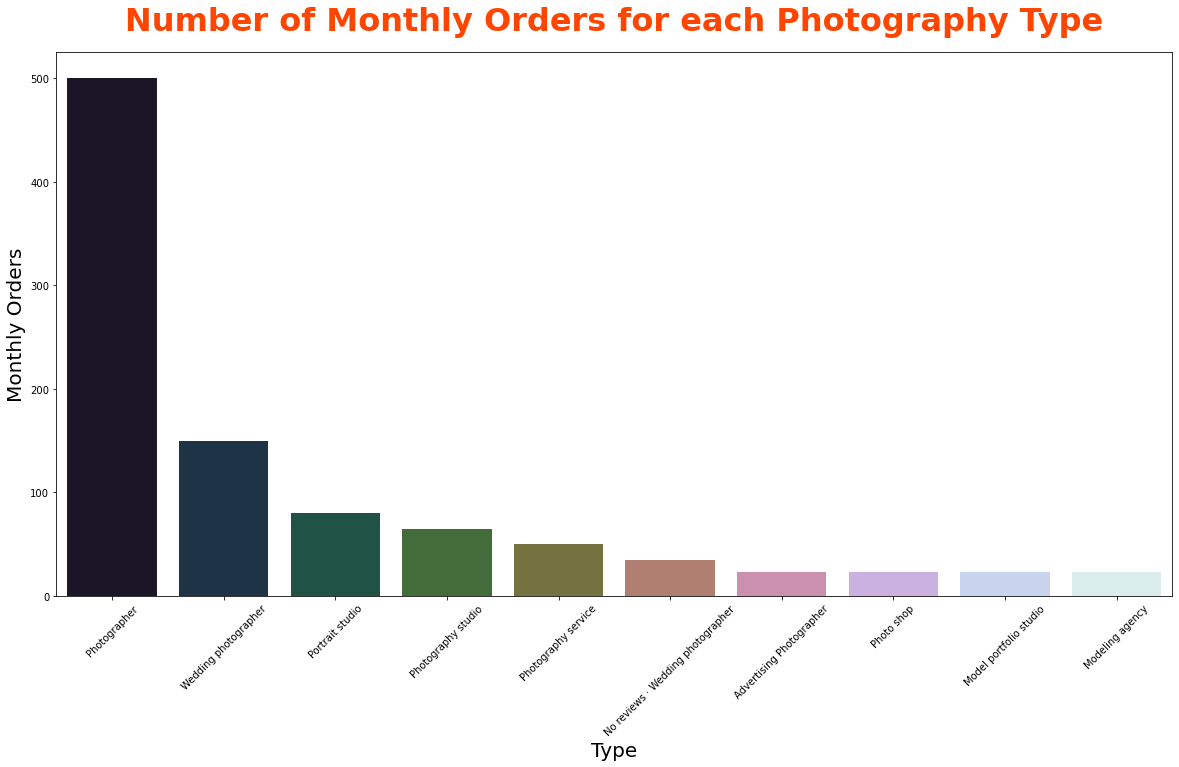

In [129]:
plt.figure(figsize=(20,10))
sns.barplot(x='Type',y='Monthly Orders',data=name_costs,palette='cubehelix')
plt.xticks(rotation=45)
plt.xlabel('Type',fontsize=20)
plt.ylabel('Monthly Orders',fontsize=20)
plt.title('Number of Monthly Orders for each Photography Type',fontsize=32,color='orangered',pad=22,fontweight='bold')
plt.show()

### Photography companies receive the maximum number of monthly orders.

## Let's find out which type of photography companies have the highest number of employees.

In [130]:
name_costs = tier1_data.groupby('Type')['No. of Employees'].max().sort_values(ascending=False).reset_index()[:10]
name_costs

Type  No. of Employees
0      Wedding photographer        100.000000
1       Photography service         65.000000
2              Photographer         50.000000
3        Photography studio         40.000000
4                 Photo lab         30.000000
5           Portrait studio         10.000000
6  Advertising Photographer          9.304636
7                Photo shop          9.304636
8    Model portfolio studio          9.304636
9           Modeling agency          9.304636

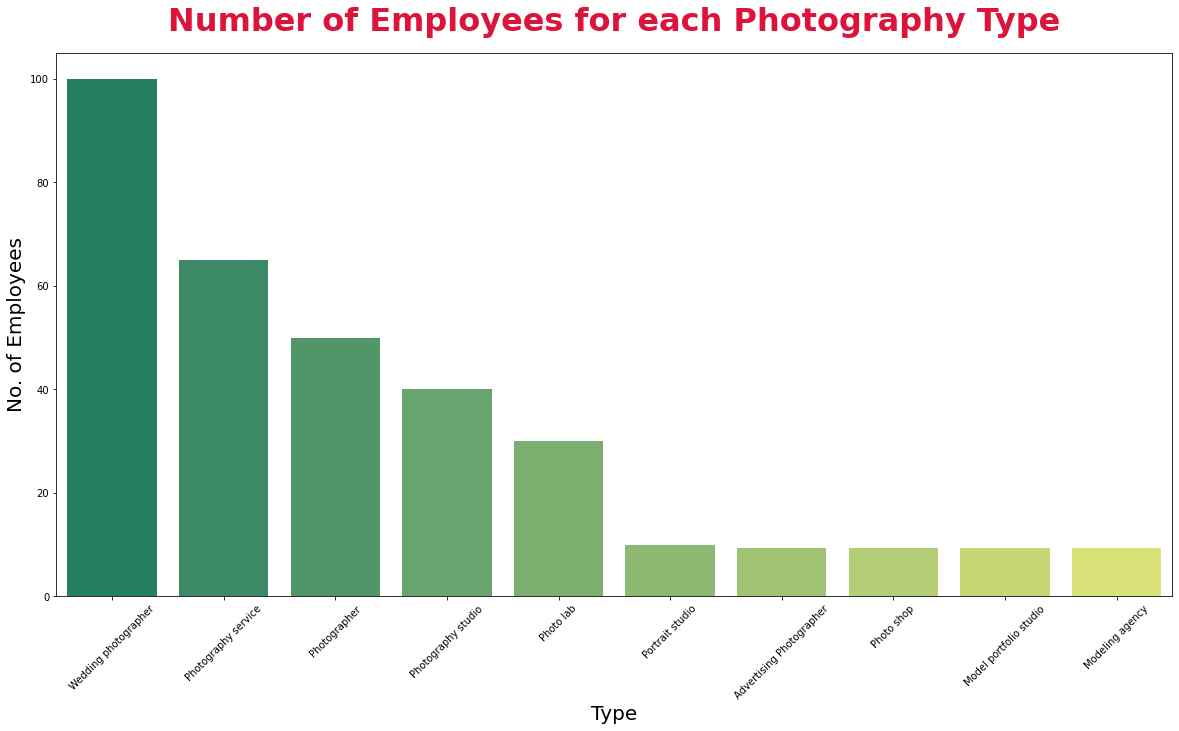

In [131]:
plt.figure(figsize=(20,10))
sns.barplot(x='Type',y='No. of Employees',data=name_costs,palette='summer')
plt.xticks(rotation=45)
plt.xlabel('Type',fontsize=20)
plt.ylabel('No. of Employees',fontsize=20)
plt.title('Number of Employees for each Photography Type',fontsize=32,color='crimson',pad=22,fontweight='bold')
plt.show()

### Wedding photography companies have the highest number of employees.

## Let's find out which internet brand provides the highest speed of internet network.

In [132]:
name_costs = tier1_data.groupby('Internet Brand')['Internet Speed'].max().sort_values(ascending=False).reset_index()[:10]
name_costs['Internet Brand'].replace('3Rd Party','3rd Party',inplace=True)
name_costs

Internet Brand  Internet Speed
0      3rd Party      300.000000
1         Airtel      300.000000
2            Act      300.000000
3  Etc Fibre Net      250.000000
4        Hathway      250.000000
5      Act Fiber      200.000000
6           Zoom      150.000000
7            Jio      150.000000
8        Act/Jio      150.000000
9         Reltel      100.000000

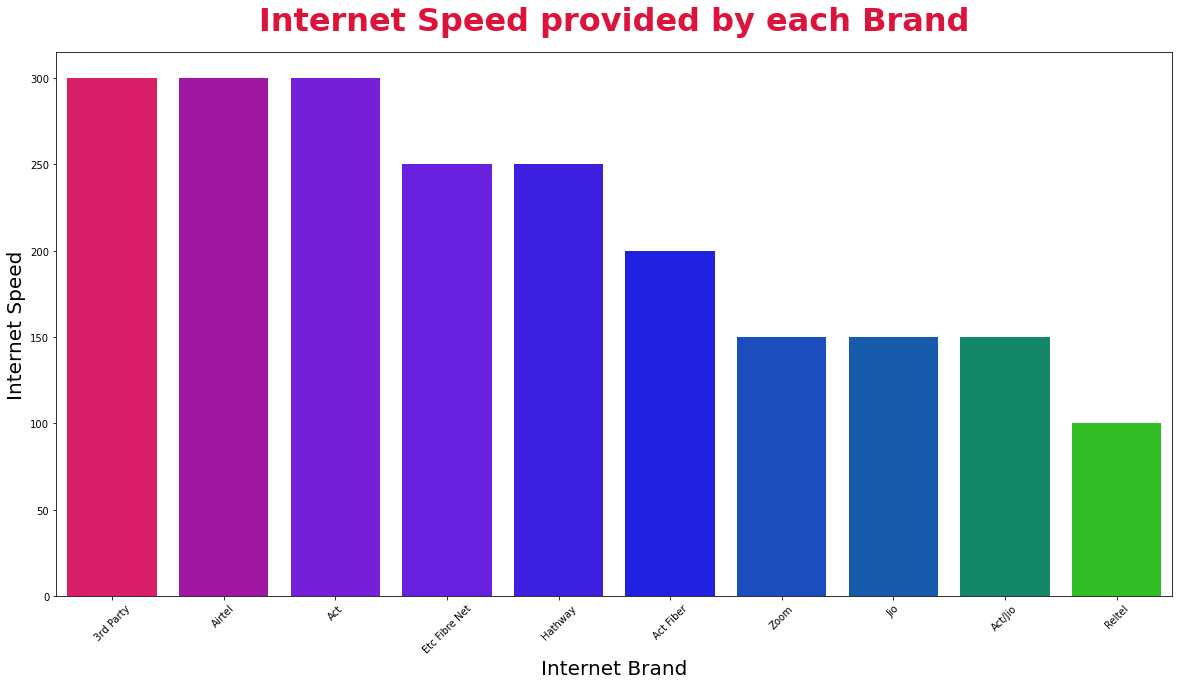

In [133]:
plt.figure(figsize=(20,10))
sns.barplot(x='Internet Brand',y='Internet Speed',data=name_costs,palette='prism')
plt.xticks(rotation=45)
plt.xlabel('Internet Brand',fontsize=20)
plt.ylabel('Internet Speed',fontsize=20)
plt.title('Internet Speed provided by each Brand',fontsize=32,color='crimson',pad=22,fontweight='bold')
plt.show()

### 3rd party, Airtel and ACT Fibernet internet brands provide the highest speed of internet network.

In [134]:
for x in tier1_data['Internet Brand'].values:
    if type(x) == str and re.search('3r+',x) is not None:
        temp = x.lstrip('3R')
        temp = x.lstrip('3rrrrrrrr')
        temp = x.lstrip('3rr')
        temp = '3r' + temp
        tier1_data['Internet Brand'].replace(x,temp,inplace=True)
tier1_data['Internet Brand'].replace('3rd Paarty','3rd Party',inplace=True)

## Let's find out which internet brand has the highest internet monthly cost.

In [135]:
name_costs = tier1_data.groupby('Internet Brand')['Internet Monthly Cost'].max().sort_values(ascending=False).reset_index()[:10]
name_costs

Internet Brand  Internet Monthly Cost
0             Act/Jio           11000.000000
1          3Rd Paarty           11000.000000
2           3Rd Party            9000.000000
3  3Rd Party Internet            8000.000000
4      You Broad Band            8000.000000
5               Tgtpl            7200.000000
6                Gtpl            7000.000000
7              Ticona            6000.000000
8        Did Not Know            5000.000000
9               Local            4000.000000

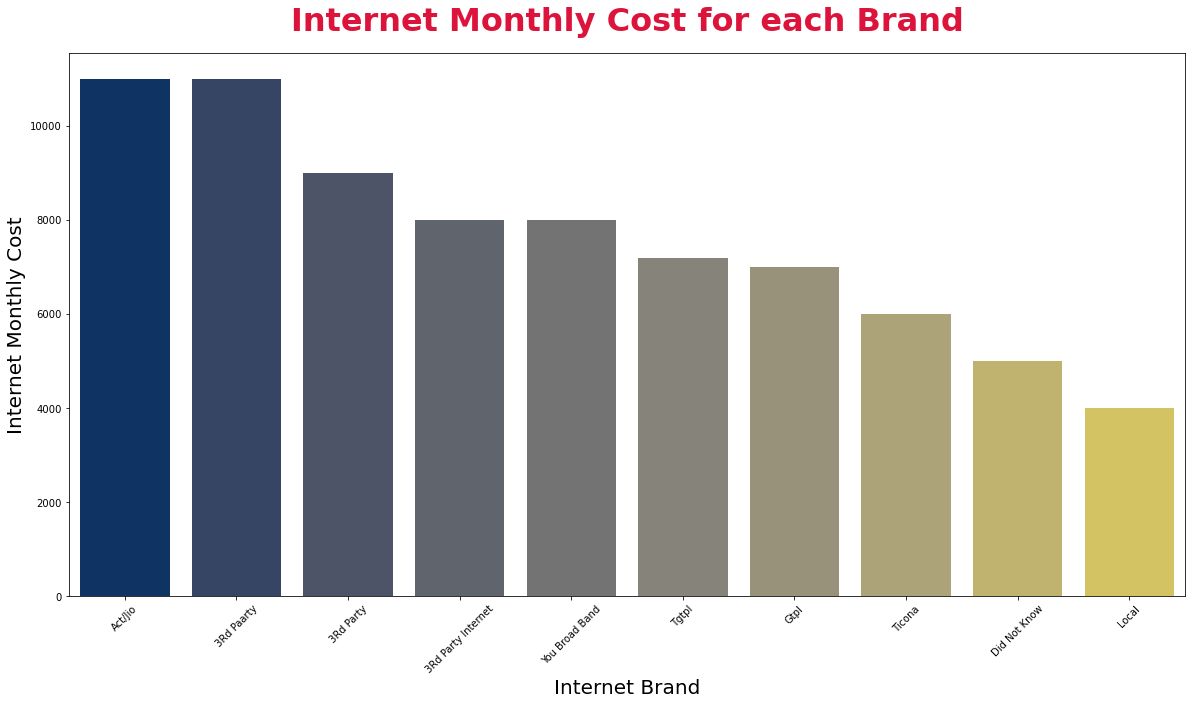

In [136]:
plt.figure(figsize=(20,10))
sns.barplot(x='Internet Brand',y='Internet Monthly Cost',data=name_costs,palette='cividis')
plt.xticks(rotation=45)
plt.xlabel('Internet Brand',fontsize=20)
plt.ylabel('Internet Monthly Cost',fontsize=20)
plt.title('Internet Monthly Cost for each Brand',fontsize=32,color='crimson',pad=22,fontweight='bold')
plt.show()

### 3rd party and Act/Jio internet brands have the highest internet monthly cost.

## Let's find out which cloud storage is preferred in case of highest number of monthly orders.

In [137]:
name_costs = tier1_data.groupby('Cloud Storage Used')['Monthly Orders'].max().sort_values(ascending=False).reset_index()
name_costs

Cloud Storage Used  Monthly Orders
0                             Pendrive      500.000000
1                         Google Drive      200.000000
2                             Not Used      150.000000
3                      Hard Disk Drive       40.000000
4                          Own Storage       30.000000
5                             Drop Box       23.134831
6           Google Drive and One Drive       23.134831
7              Google Drive and iCloud       23.134831
8   Google Drive, One Drive and iCloud       23.134831
9                        My Air Bridge       23.134831
10                           One Drive       23.134831
11                             Unknown       23.134831
12                          WeTransfer       23.134831
13                              iCloud       23.134831
14                            SD Cards       15.000000
15           Pendrive and Google Drive        0.000000

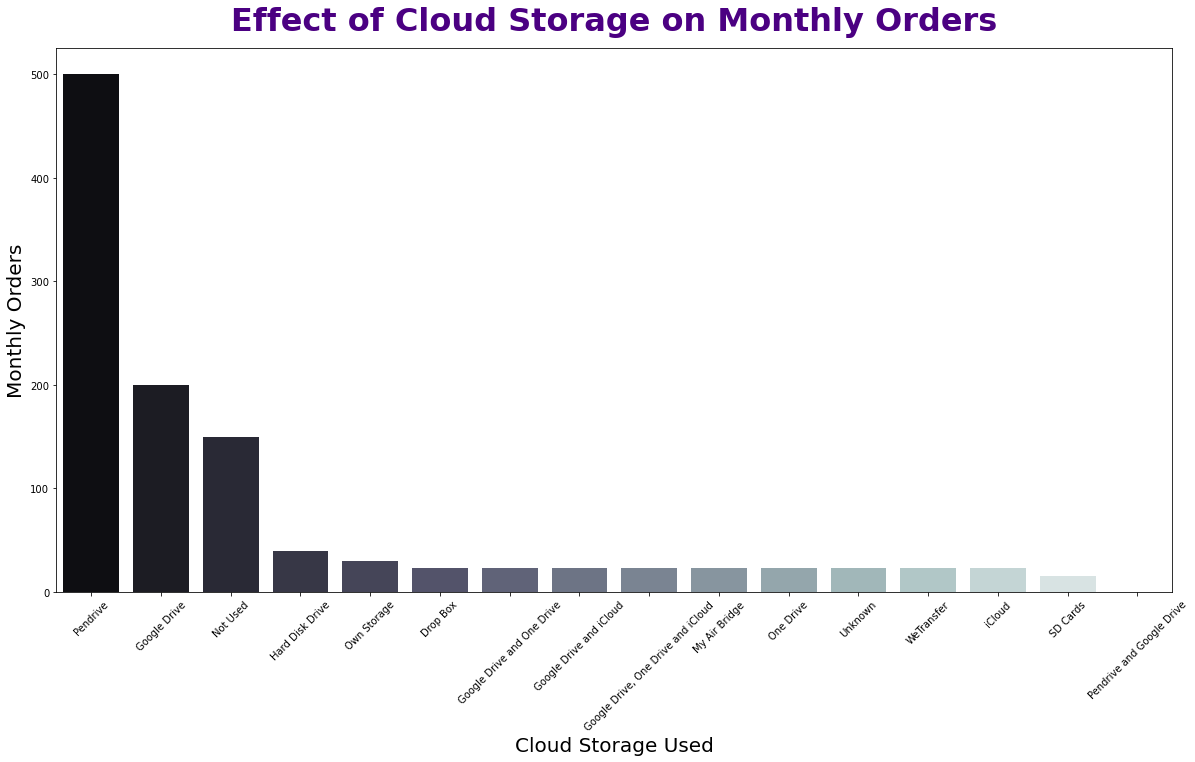

In [138]:
plt.figure(figsize=(20,10))
sns.barplot(x='Cloud Storage Used',y='Monthly Orders',data=name_costs,palette='bone')
plt.xticks(rotation=45)
plt.xlabel('Cloud Storage Used',fontsize=20)
plt.ylabel('Monthly Orders',fontsize=20)
plt.title('Effect of Cloud Storage on Monthly Orders',fontsize=32,color='indigo',pad=18,fontweight='bold')
plt.show()

### Whenever pendrive is used as cloud storage, higher number of monthly orders are received.

## Let's observe the effect of cloud storage on number of employees working in photography companies.

In [139]:
name_costs = tier1_data.groupby('Cloud Storage Used')['No. of Employees'].max().sort_values(ascending=False).reset_index()
name_costs

Cloud Storage Used  No. of Employees
0                      Hard Disk Drive        100.000000
1                         Google Drive         65.000000
2                             Drop Box         55.000000
3                            One Drive         25.000000
4                             Pendrive         25.000000
5           Google Drive and One Drive         17.000000
6                          Own Storage         17.000000
7                             Not Used         15.000000
8              Google Drive and iCloud          9.304636
9   Google Drive, One Drive and iCloud          9.304636
10                            SD Cards          9.304636
11                             Unknown          9.304636
12                          WeTransfer          9.304636
13                       My Air Bridge          5.000000
14           Pendrive and Google Drive          5.000000
15                              iCloud          2.000000

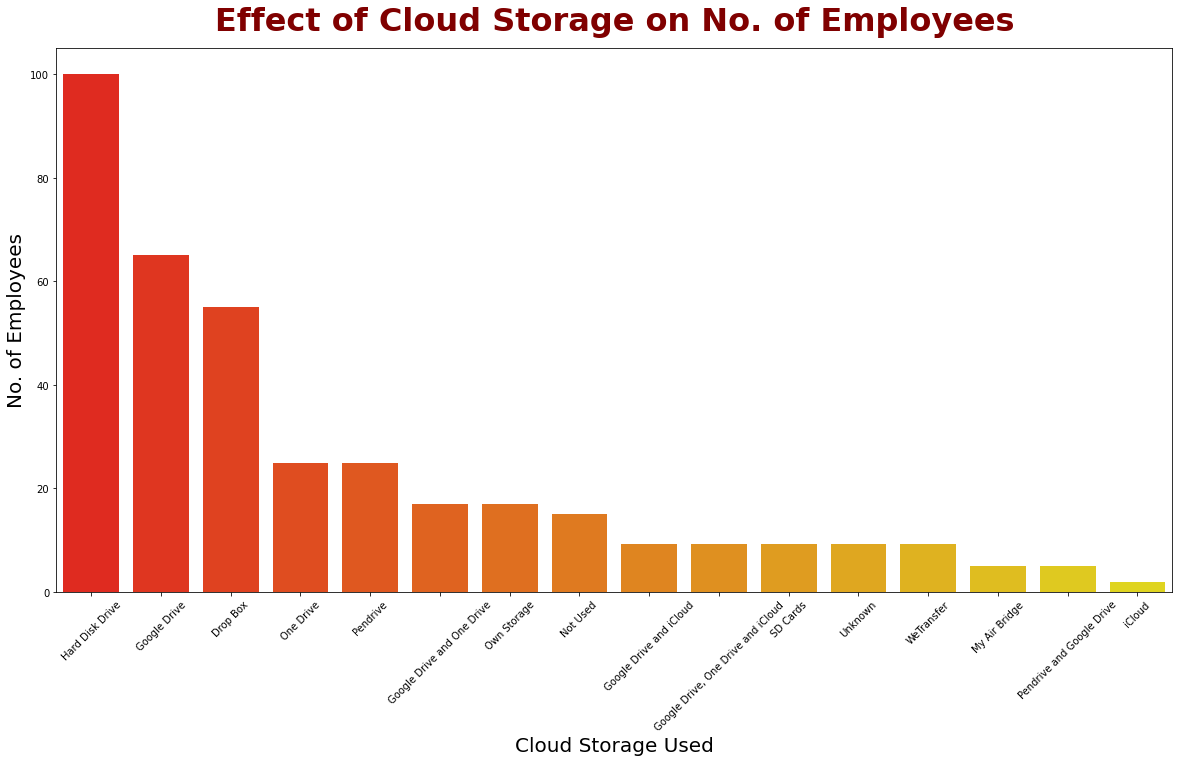

In [140]:
plt.figure(figsize=(20,10))
sns.barplot(x='Cloud Storage Used',y='No. of Employees',data=name_costs,palette='autumn')
plt.xticks(rotation=45)
plt.xlabel('Cloud Storage Used',fontsize=20)
plt.ylabel('No. of Employees',fontsize=20)
plt.title('Effect of Cloud Storage on No. of Employees',fontsize=32,color='maroon',pad=18,fontweight='bold')
plt.show()

### Using Hard Disk Drive(HDD) as cloud storage solution coincidentally increases the total number of employees working at the photography companies.

In [141]:
name_costs = tier1_data.groupby('Cloud Storage Used')['Internet Speed'].max().sort_values(ascending=False).reset_index()
name_costs

Cloud Storage Used  Internet Speed
0                         Google Drive      300.000000
1                      Hard Disk Drive      300.000000
2              Google Drive and iCloud      150.000000
3   Google Drive, One Drive and iCloud      150.000000
4                            One Drive      150.000000
5                             Drop Box      100.000000
6           Google Drive and One Drive      100.000000
7                             Not Used      100.000000
8                          Own Storage      100.000000
9                             SD Cards      100.000000
10                             Unknown      100.000000
11                            Pendrive       69.970803
12           Pendrive and Google Drive       69.970803
13                          WeTransfer       69.970803
14                              iCloud       69.970803
15                       My Air Bridge       40.000000

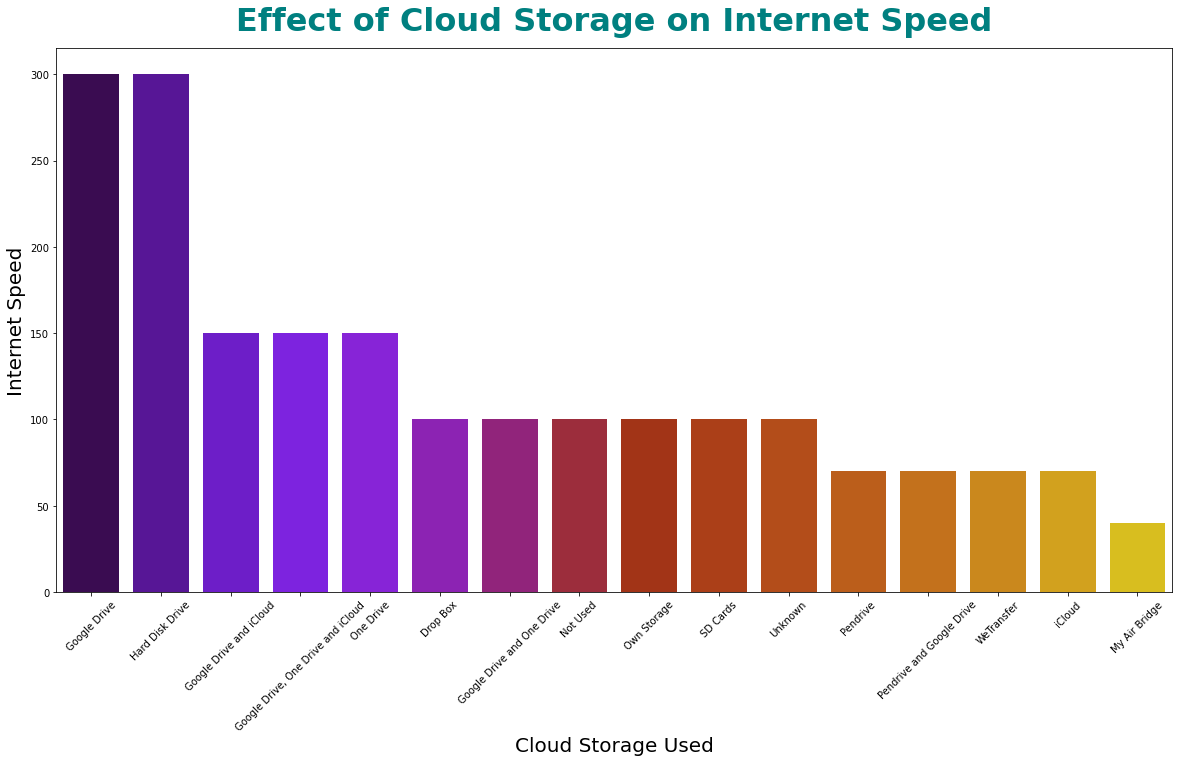

In [142]:
plt.figure(figsize=(20,10))
sns.barplot(x='Cloud Storage Used',y='Internet Speed',data=name_costs,palette='gnuplot')
plt.xticks(rotation=45)
plt.xlabel('Cloud Storage Used',fontsize=20)
plt.ylabel('Internet Speed',fontsize=20)
plt.title('Effect of Cloud Storage on Internet Speed',fontsize=32,color='teal',pad=18,fontweight='bold')
plt.show()

### Customers who have used Google Drive and Hard Disk Drive(HDD) for cloud storage have opted for higher speed internet network while those who use My Air Bridge have opted for the slowest internet network.

In [143]:
name_costs = tier1_data.groupby('Cloud Storage Used')['Internet'].max().sort_values(ascending=False).reset_index()
name_costs

Cloud Storage Used  Internet
0                             Drop Box  1.000000
1                         Google Drive  1.000000
2           Google Drive and One Drive  1.000000
3              Google Drive and iCloud  1.000000
4   Google Drive, One Drive and iCloud  1.000000
5                      Hard Disk Drive  1.000000
6                             Not Used  1.000000
7                            One Drive  1.000000
8                          Own Storage  1.000000
9                             Pendrive  1.000000
10           Pendrive and Google Drive  1.000000
11                            SD Cards  1.000000
12                             Unknown  1.000000
13                              iCloud  1.000000
14                       My Air Bridge  0.000000
15                          WeTransfer  0.000000

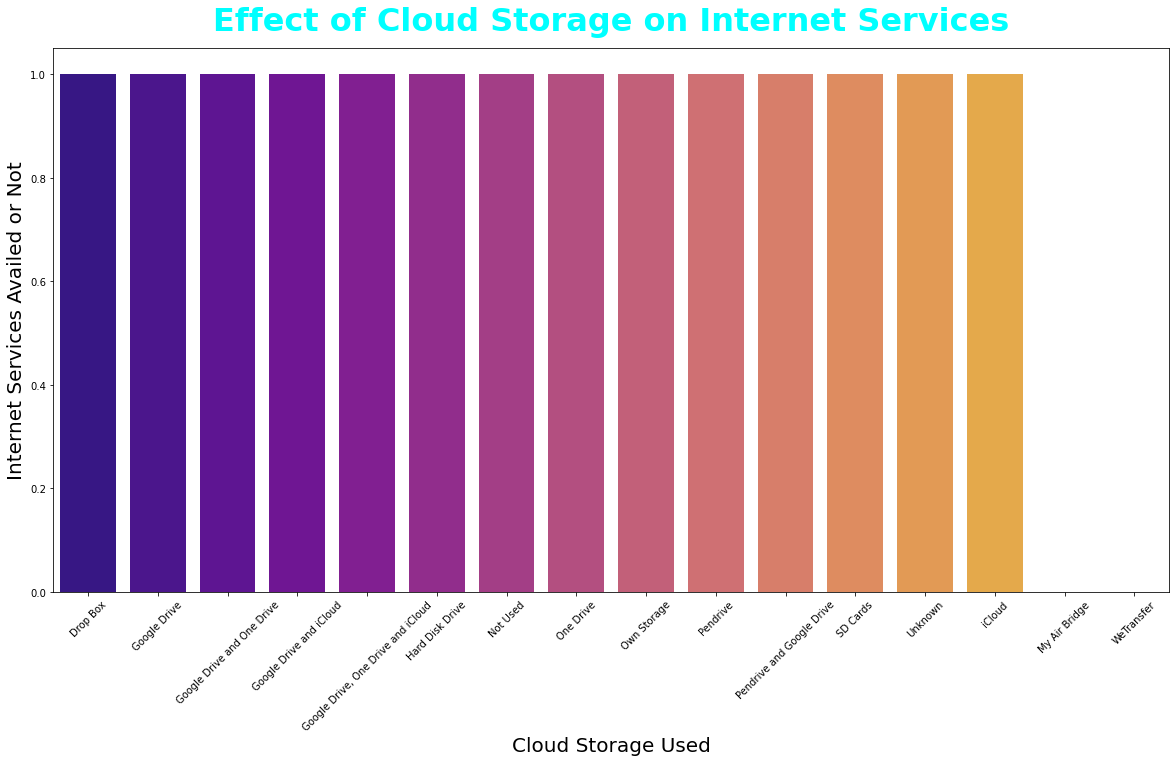

In [144]:
plt.figure(figsize=(20,10))
sns.barplot(x='Cloud Storage Used',y='Internet',data=name_costs,palette='plasma')
plt.xticks(rotation=45)
plt.xlabel('Cloud Storage Used',fontsize=20)
plt.ylabel('Internet Services Availed or Not',fontsize=20)
plt.title('Effect of Cloud Storage on Internet Services',fontsize=32,color='cyan',pad=18,fontweight='bold')
plt.show()

### Only in case of My Air Bridge and WeTransfer cloud storage solutions, customers have not opted for any internet services.

In [145]:
name_costs = tier1_data.groupby('Cloud Storage Used')['Album Designing'].max().sort_values(ascending=False).reset_index()
name_costs

Cloud Storage Used  Album Designing
0                             Drop Box         1.000000
1                         Google Drive         1.000000
2           Google Drive and One Drive         1.000000
3              Google Drive and iCloud         1.000000
4   Google Drive, One Drive and iCloud         1.000000
5                      Hard Disk Drive         1.000000
6                        My Air Bridge         1.000000
7                             Not Used         1.000000
8                            One Drive         1.000000
9                          Own Storage         1.000000
10                            Pendrive         1.000000
11           Pendrive and Google Drive         1.000000
12                            SD Cards         1.000000
13                             Unknown         1.000000
14                          WeTransfer         1.000000
15                              iCloud         1.000000

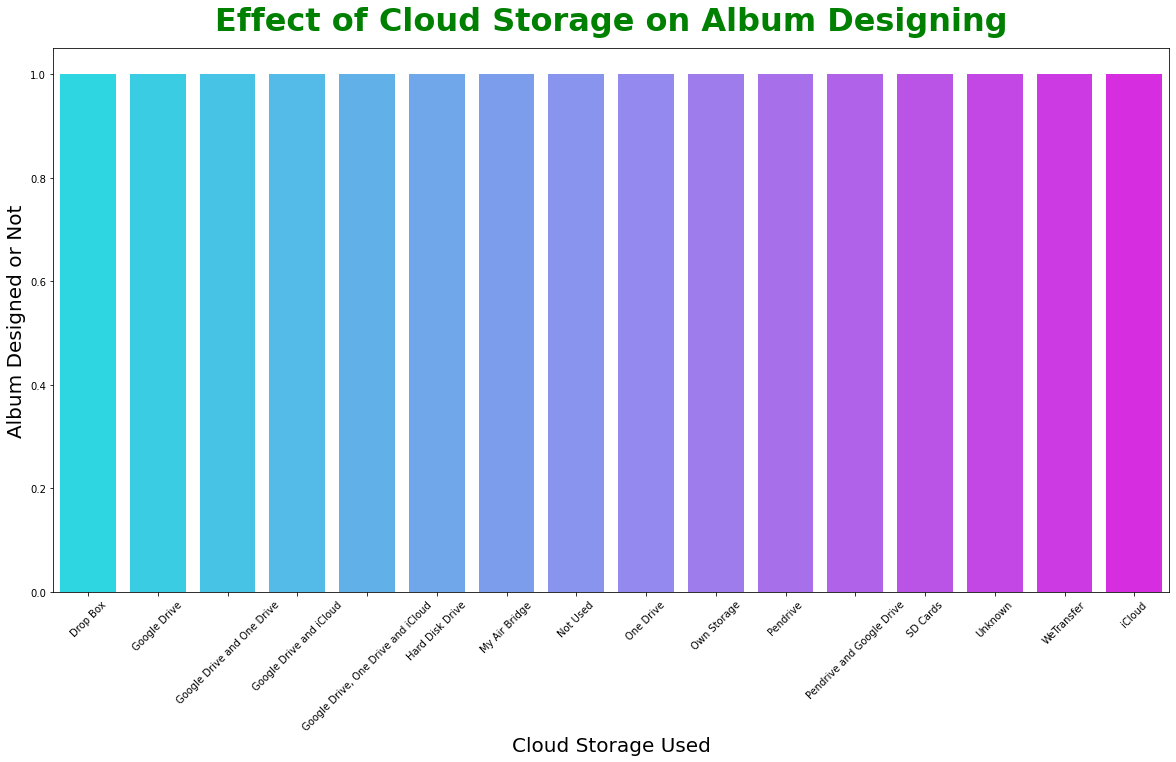

In [146]:
plt.figure(figsize=(20,10))
sns.barplot(x='Cloud Storage Used',y='Album Designing',data=name_costs,palette='cool')
plt.xticks(rotation=45)
plt.xlabel('Cloud Storage Used',fontsize=20)
plt.ylabel('Album Designed or Not',fontsize=20)
plt.title('Effect of Cloud Storage on Album Designing',fontsize=32,color='green',pad=18,fontweight='bold')
plt.show()

### Whenever any cloud storage has been used, an album for the photographs has always been designed.

In [147]:
name_costs = tier1_data.groupby('Cloud Storage Used')['Photo Selection Method'].count().sort_values(ascending=False).reset_index()[:10]
name_costs

Cloud Storage Used  Photo Selection Method
0                Google Drive                      55
1                    Not Used                      21
2                    Pendrive                      19
3             Hard Disk Drive                      15
4                     Unknown                      12
5                 Own Storage                       6
6  Google Drive and One Drive                       4
7                    SD Cards                       3
8                   One Drive                       2
9                      iCloud                       2

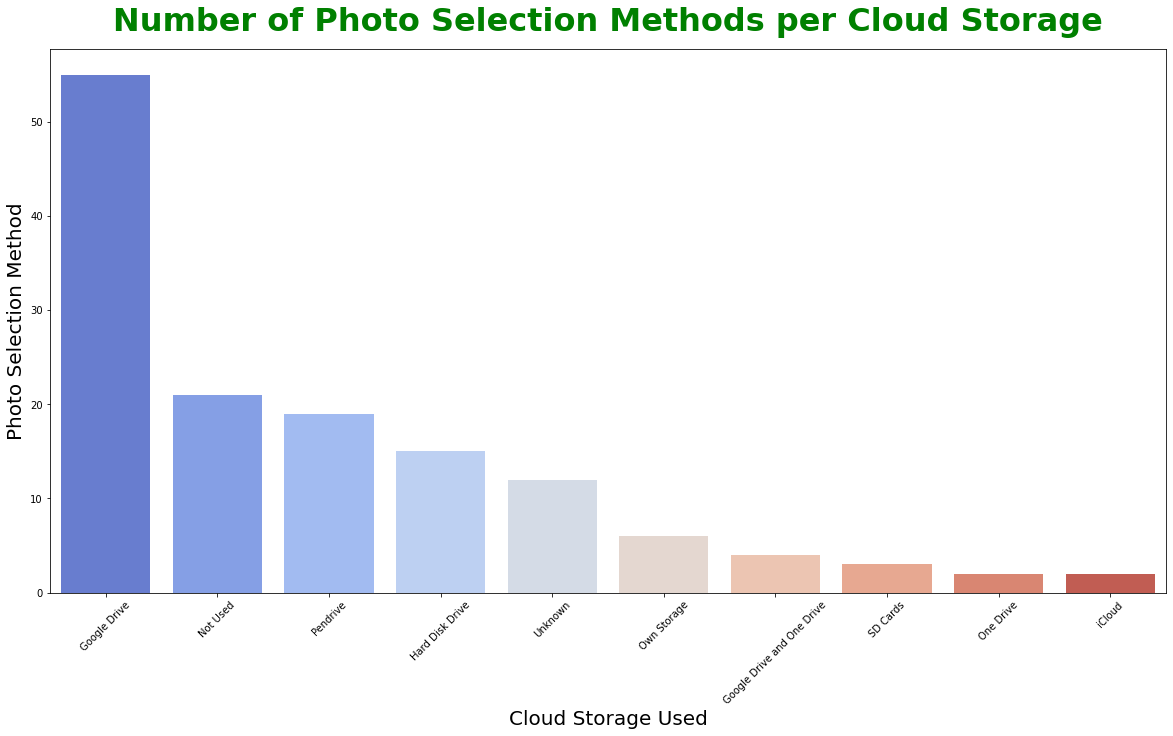

In [148]:
plt.figure(figsize=(20,10))
sns.barplot(x='Cloud Storage Used',y='Photo Selection Method',data=name_costs,palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Cloud Storage Used',fontsize=20)
plt.ylabel('Photo Selection Method',fontsize=20)
plt.title('Number of Photo Selection Methods per Cloud Storage',fontsize=32,color='green',pad=18,fontweight='bold')
plt.show()

### Google Drive has the most wide variety of photograph selection methods.

In [149]:
name_costs = tier1_data.groupby('Cloud Storage Used')['Album Designing'].count().sort_values(ascending=False).reset_index()[:10]
name_costs

Cloud Storage Used  Album Designing
0                Google Drive               56
1                    Not Used               22
2                    Pendrive               19
3             Hard Disk Drive               16
4                     Unknown               12
5                 Own Storage                6
6  Google Drive and One Drive                4
7                    SD Cards                3
8                    Drop Box                2
9                   One Drive                2

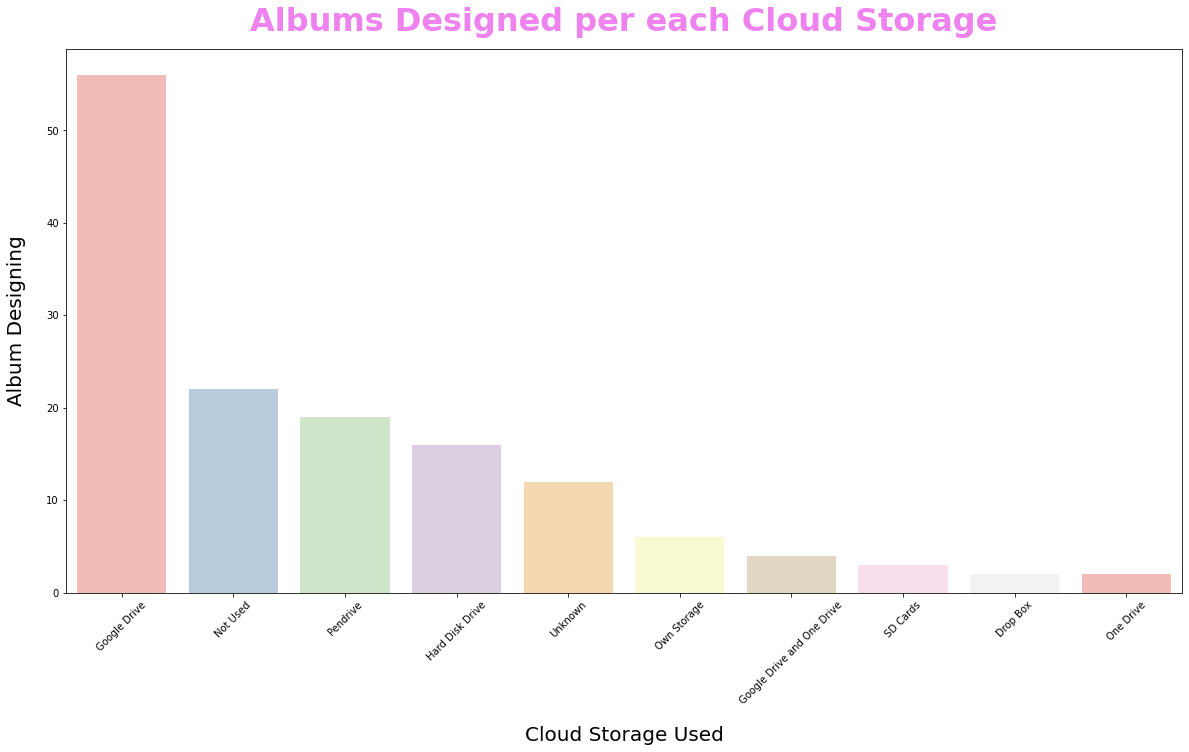

In [150]:
plt.figure(figsize=(20,10))
sns.barplot(x='Cloud Storage Used',y='Album Designing',data=name_costs,palette='Pastel1')
plt.xticks(rotation=45)
plt.xlabel('Cloud Storage Used',fontsize=20,labelpad=20)
plt.ylabel('Album Designing',fontsize=20,labelpad=20)
plt.title('Albums Designed per each Cloud Storage',fontsize=32,color='violet',pad=18,fontweight='bold')
plt.show()

### Customers using Google Drive for cloud storage have ordered for the most number of albums to be designed.

In [151]:
name_costs = tier1_data.groupby('Cloud Storage Used')['E-Book'].count().sort_values(ascending=False).reset_index()[:10]
name_costs

Cloud Storage Used  E-Book
0                Google Drive      56
1                    Not Used      22
2                    Pendrive      19
3             Hard Disk Drive      16
4                     Unknown      12
5                 Own Storage       6
6  Google Drive and One Drive       4
7                    SD Cards       3
8                    Drop Box       2
9                   One Drive       2

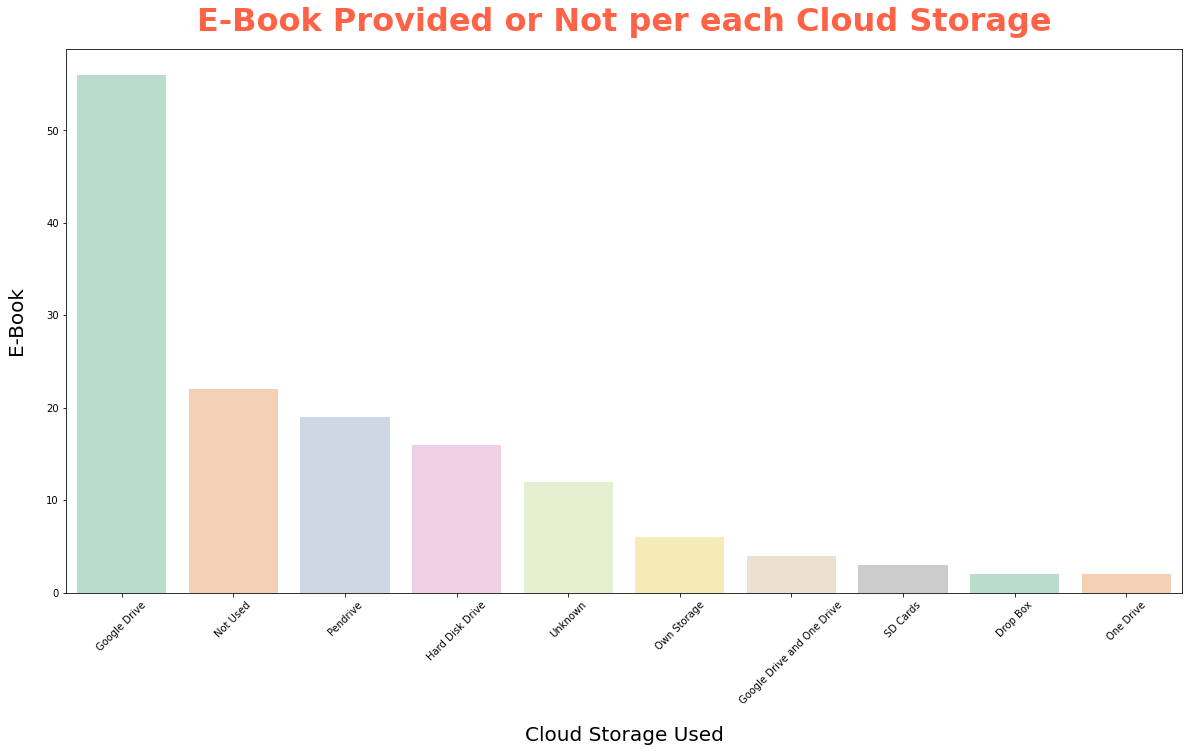

In [152]:
plt.figure(figsize=(20,10))
sns.barplot(x='Cloud Storage Used',y='E-Book',data=name_costs,palette='Pastel2')
plt.xticks(rotation=45)
plt.xlabel('Cloud Storage Used',fontsize=20,labelpad=20)
plt.ylabel('E-Book',fontsize=20,labelpad=20)
plt.title('E-Book Provided or Not per each Cloud Storage',fontsize=32,color='tomato',pad=18,fontweight='bold')
plt.show()

### Customers using Google Drive as cloud storage provider have ordered for the maximum number of E-books.

## Let's check out how many comments have been received from various locations.

In [153]:
name_costs = tier1_data.groupby('Location')['Comment'].count().sort_values(ascending=False).reset_index()[:10]
name_costs

Location  Comment
0  Bengaluru, Karnataka      213
1               Chennai      153
2                 Delhi      149
3  Hyderabad, Telangana      144
4              Kolkata       126
5             Ahmedabad      125
6     Pune, Maharashtra       96
7             Hyderabad        4
8             Telangana        4
9           Maharashtra        3

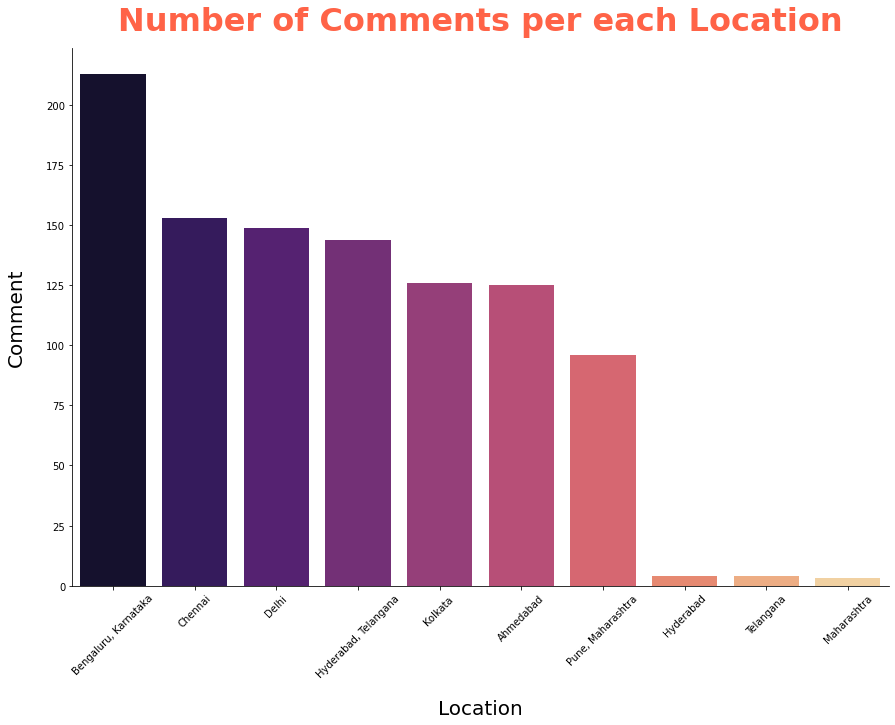

In [154]:
sns.catplot(x='Location',y='Comment',data=name_costs,palette='magma',kind='bar',height=8,aspect=1.5)
plt.xticks(rotation=45)
plt.xlabel('Location',fontsize=20,labelpad=20)
plt.ylabel('Comment',fontsize=20,labelpad=20)
plt.title('Number of Comments per each Location',fontsize=32,color='tomato',pad=18,fontweight='bold')
plt.show()

### Maximum number of comments have been received from Bengaluru, Karnataka region.

In [155]:
tier1_data['Comment'].replace(1.000000,"Interested",inplace=True)
tier1_data['Comment'].replace(0.000000,"Not Interested",inplace=True)

In [156]:
table = pd.crosstab(tier1_data['Type'],tier1_data['Comment'],margins=False).reindex()
table = table.sort_values('Interested',ascending=False)[:16]
table

Comment                    Interested  Not Interested
Type                                                 
Wedding photographer              307               2
Photography studio                255               2
Photographer                      250               0
Photography service                73               1
Photo lab                          22               0
Advertising Photographer           17               0
Photo shop                         16               0
Aerial photographer                 7               0
Photography Institute               6               0
Video production service            5               0
Portrait studio                     5               0
Picture frame shop                  4               0
No reviews · Photographer           4               0
Wedding planner                     3               0
Equipment rental agency             3               0
Advertising agency                  3               0

In [157]:
name_costs = tier1_data.groupby('Location')['Problems'].count().sort_values(ascending=False).reset_index()[:10]
name_costs

Location  Problems
0                             Ahmedabad        35
1                  Bengaluru, Karnataka        10
2                              Kolkata         10
3                                 Delhi         8
4                               Chennai         7
5                     Pune, Maharashtra         2
6   Doddanagamangala Village, Karnataka         1
7  Hyderabad, Telangana · In SVSS Nivas         0
8               Secunderabad, Telangana         0
9        Pune, Maharashtra · In PEBBLES         0

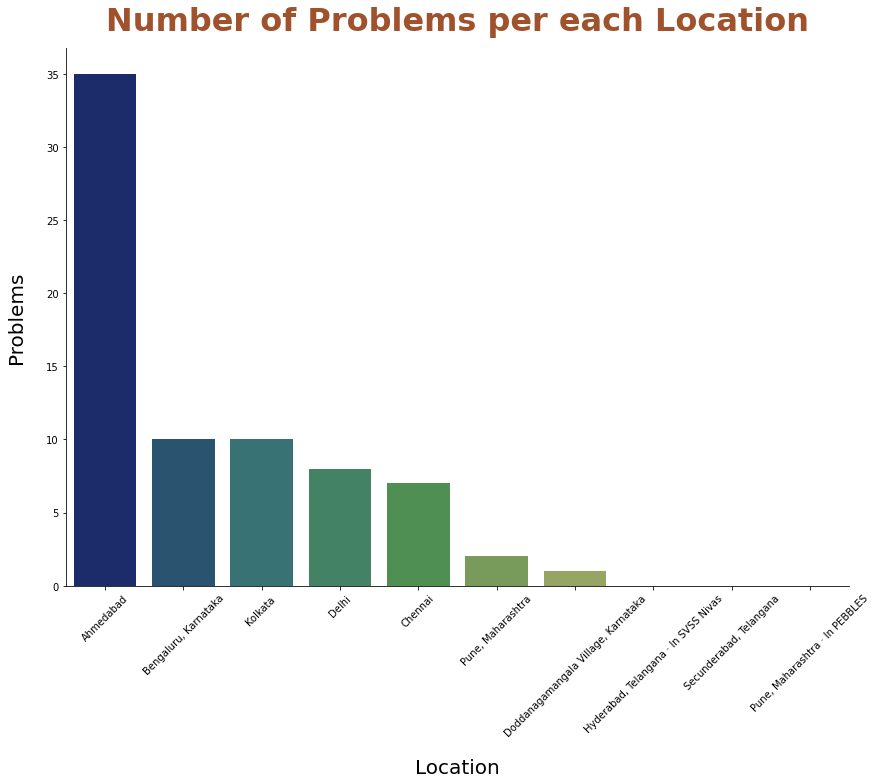

In [158]:
sns.catplot(x='Location',y='Problems',data=name_costs,palette='gist_earth',kind='bar',height=8,aspect=1.5)
plt.xticks(rotation=45)
plt.xlabel('Location',fontsize=20,labelpad=20)
plt.ylabel('Problems',fontsize=20,labelpad=20)
plt.title('Number of Problems per each Location',fontsize=32,color='sienna',pad=18,fontweight='bold')
plt.show()

### The photography companies of Ahmedabad have faced the most number of problems.

In [159]:
name_costs = tier1_data.groupby('Cloud Storage Used')['Location'].count().sort_values(ascending=False).reset_index()
name_costs

Cloud Storage Used  Location
0                         Google Drive        56
1                             Not Used        22
2                             Pendrive        19
3                      Hard Disk Drive        16
4                              Unknown        12
5                          Own Storage         6
6           Google Drive and One Drive         4
7                             SD Cards         3
8                             Drop Box         2
9                            One Drive         2
10                              iCloud         2
11             Google Drive and iCloud         1
12  Google Drive, One Drive and iCloud         1
13                       My Air Bridge         1
14           Pendrive and Google Drive         1
15                          WeTransfer         1

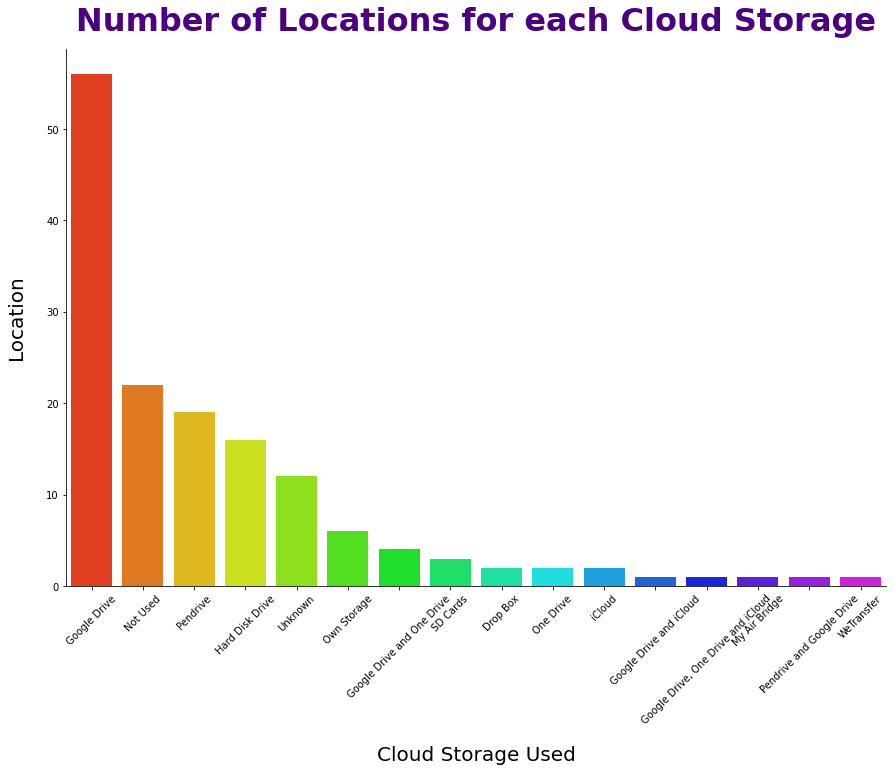

In [160]:
sns.catplot(x='Cloud Storage Used',y='Location',data=name_costs,palette='gist_rainbow',kind='bar',height=8,aspect=1.5)
plt.xticks(rotation=45)
plt.xlabel('Cloud Storage Used',fontsize=20,labelpad=20)
plt.ylabel('Location',fontsize=20,labelpad=20)
plt.title('Number of Locations for each Cloud Storage',fontsize=32,color='indigo',pad=18,fontweight='bold')
plt.show()

### Google Drive is the most popular cloud storage software as it has been used in the most number of locations.

In [161]:
name_costs = tier1_data.groupby('Type')['Location'].count().sort_values(ascending=False).reset_index()[:15]
name_costs.head()

Type  Location
0  Wedding photographer       309
1    Photography studio       253
2          Photographer       249
3   Photography service        74
4             Photo lab        22

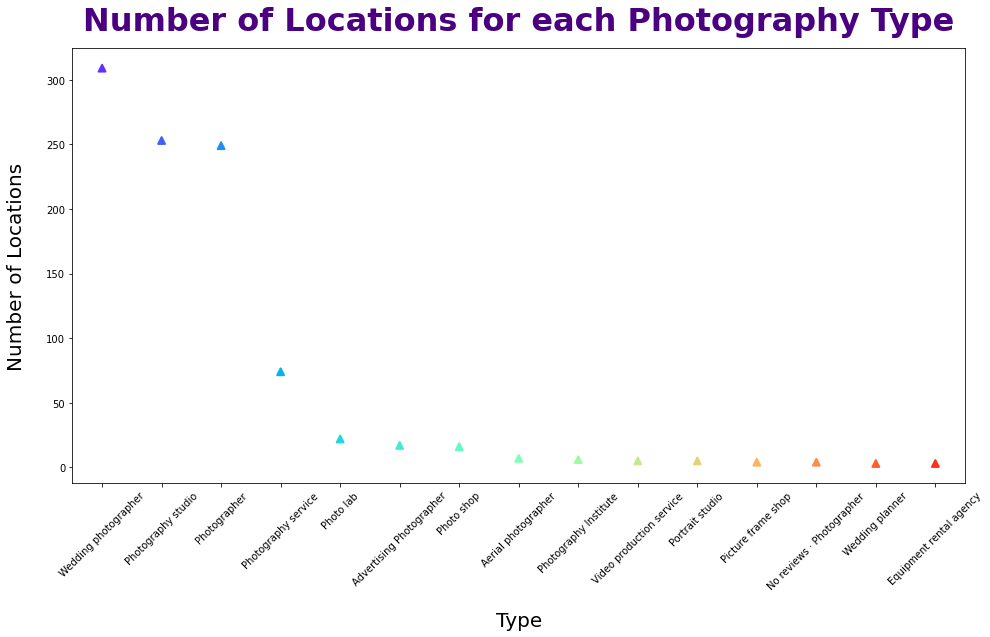

In [162]:
sns.pointplot(x='Type',y='Location',data=name_costs,palette='rainbow',markers='^',n_boot=1200,dodge=True)
plt.xticks(rotation=45)
plt.xlabel('Type',fontsize=20,labelpad=20)
plt.ylabel('Number of Locations',fontsize=20,labelpad=20)
plt.title('Number of Locations for each Photography Type',fontsize=32,color='indigo',pad=18,fontweight='bold')
plt.show()

### Wedding photographers are the most in-demand photographers as they are desired in the most number of locations.

In [163]:
name_costs = tier1_data.groupby('Type')['Album Designing'].count().sort_values(ascending=False).reset_index()[:15]
name_costs.head()

Type  Album Designing
0  Wedding photographer              309
1    Photography studio              257
2          Photographer              250
3   Photography service               74
4             Photo lab               22

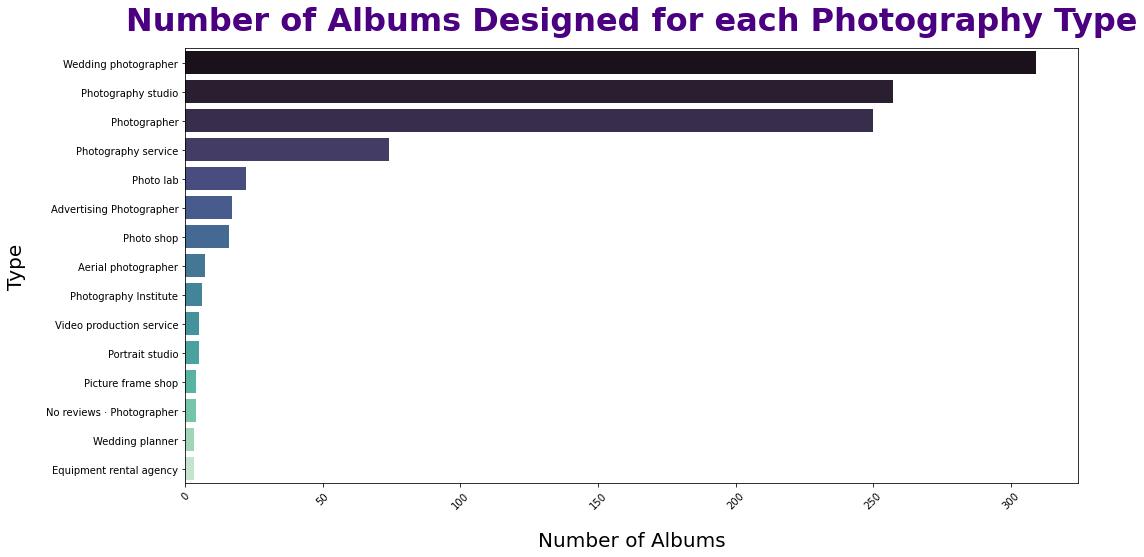

In [164]:
sns.barplot(x='Album Designing',y='Type',data=name_costs,palette='mako',orient='horizontal')
plt.xticks(rotation=45)
plt.ylabel('Type',fontsize=20,labelpad=20)
plt.xlabel('Number of Albums',fontsize=20,labelpad=20)
plt.title('Number of Albums Designed for each Photography Type',fontsize=32,color='indigo',pad=18,fontweight='bold')
plt.show()

### Most of the albums ordered by customers fall in the wedding photography category.

In [165]:
name_costs = tier1_data.groupby('Type')['E-Book'].count().sort_values(ascending=False).reset_index()[:15]
name_costs.head()

Type  E-Book
0  Wedding photographer     309
1    Photography studio     257
2          Photographer     250
3   Photography service      74
4             Photo lab      22

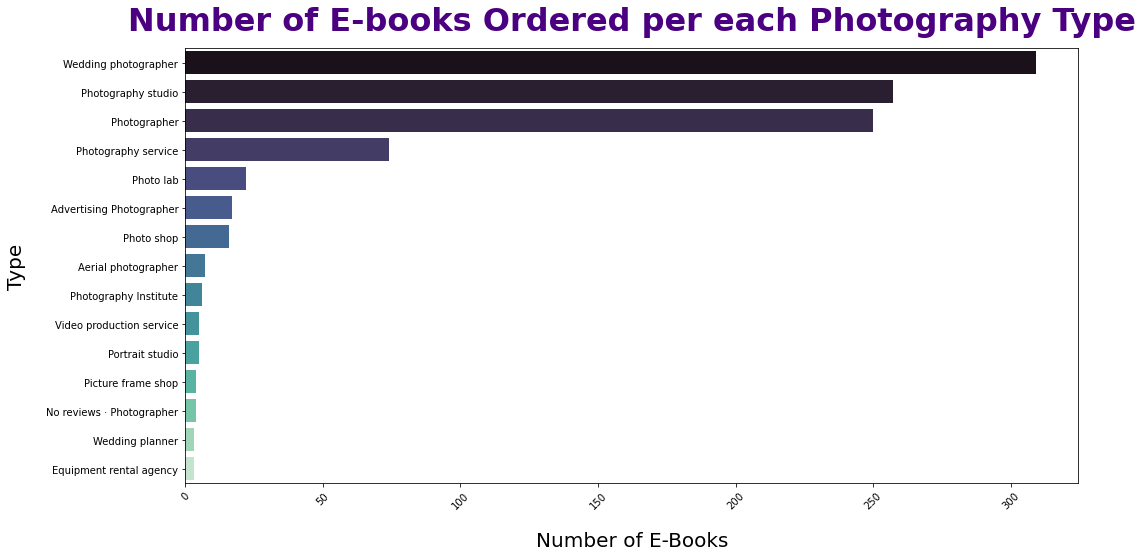

In [166]:
sns.barplot(x='E-Book',y='Type',data=name_costs,palette='mako',orient='horizontal')
plt.xticks(rotation=45)
plt.ylabel('Type',fontsize=20,labelpad=20)
plt.xlabel('Number of E-Books',fontsize=20,labelpad=20)
plt.title('Number of E-books Ordered per each Photography Type',fontsize=32,color='indigo',pad=18,fontweight='bold')
plt.show()

### Most of the E-Books ordered by customers reside in the wedding photography category.

## Examining the relationships between categorical variables

In [167]:
cross_table = pd.crosstab(tier1_data['Type'],tier1_data['Problems'],margins=False)
cross_table

Problems                  4  -  Affect On Orders Due To Covid  Budget  Corona  \
Type                                                                            
Advertising Photographer  0  0                              0       0       0   
Lamination service        0  0                              0       0       0   
Photo lab                 0  0                              0       0       0   
Photographer              1  1                              1       0       1   
Photography service       0  0                              0       0       0   
Photography studio        0  0                              0       1       2   
Portrait studio           0  0                              0       0       0   
Wedding photographer      0  0                              0       0       1   

Problems                  Covid  Didn’T Mention  Didn’T Specify  Didn’T Tell  \
Type                                                                           
Advertising Photographer      0               0               1            0   
Lamination service            0               1               0            0   
Photo lab                     0               1               0            0   
Photographer                  1               0               0            1   
Photography service           0               1               0            0   
Photography studio            0               0               0            0   
Portrait studio               0               0               0            0   
Wedding photographer          0               0               0            0   

Problems                  Due To Covid  ...  Not Work  Pandemic  \
Type                                    ...                       
Advertising Photographer             0  ...         0         0   
Lamination service                   0  ...         0         0   
Photo lab                            0  ...         0         0   
Photographer                         0  ...         0         1   
Photography service                  1  ...         0         0   
Photography studio                   0  ...         0         2   
Portrait studio                      0  ...         0         0   
Wedding photographer                 0  ...         1         2   

Problems                  Postponed Due To Covid  Quotation  Quotations  \
Type                                                                      
Advertising Photographer                       0          0           0   
Lamination service                             0          0           0   
Photo lab                                      0          0           0   
Photographer                                   0          0           0   
Photography service                            1          0           0   
Photography studio                             0          0           0   
Portrait studio                                0          0           0   
Wedding photographer                           0          1           1   

Problems                  Season Based  Seasonable  Very Few Since Last Year  \
Type                                                                           
Advertising Photographer             0           0                         0   
Lamination service                   0           0                         0   
Photo lab                            0           0                         0   
Photographer                         0           0                         0   
Photography service                  0           0                         1   
Photography studio                   0           0                         0   
Portrait studio                      0           0                         0   
Wedding photographer                 1           1                         0   

Problems                  Very Less Due To Covid  Yearly More Than 17  
Type                                                                   
Advertising Photograp

In [168]:
stat, p, dof, expected = stats.chi2_contingency(cross_table)

In [169]:
prob = 0.95
critical = stats.chi2.ppf(prob,dof)

if abs(stat) >= critical:
    print('Type and Problems are related variables')
else:
    print('Type and Problems are independent variables')

Type and Problems are independent variables


In [170]:
cross_table = pd.crosstab(tier1_data['Type'],tier1_data['Comment'],margins=False)
cross_table.head()

Comment                   Interested  Not Interested
Type                                                
Advertising Photographer          17               0
Advertising agency                 3               0
Aerial photographer                7               0
Architect                          1               0
Artist                             1               0

In [171]:
stat, p, dof, expected = stats.chi2_contingency(cross_table)

In [172]:
prob = 0.99
critical = stats.chi2.ppf(prob,dof)

if abs(stat) >= critical:
    print('Type and Comment are dependent variables')
else:
    print('Type and Comment are independent variables')

Type and Comment are independent variables


In [173]:
cross_table = pd.crosstab(tier1_data['Comment'],tier1_data['Problems'],margins=False)
cross_table.head()

Problems    4  -  Affect On Orders Due To Covid  Budget  Corona  Covid  \
Comment                                                                  
Interested  1  1                              1       1       4      1   

Problems    Didn’T Mention  Didn’T Specify  Didn’T Tell  Due To Covid  ...  \
Comment                                                                ...   
Interested               3               1            1             1  ...   

Problems    Not Work  Pandemic  Postponed Due To Covid  Quotation  Quotations  \
Comment                                                                         
Interested         1         5                       1          1           1   

Problems    Season Based  Seasonable  Very Few Since Last Year  \
Comment                                                          
Interested             1           1                         1   

Problems    Very Less Due To Covid  Yearly More Than 17  
Comment                                                  
Interested                       1                    1  

[1 rows x 35 columns]

In [174]:
stat, p, dof, expected = stats.chi2_contingency(cross_table)

In [175]:
prob = 0.95
critical = stats.chi2.ppf(prob,dof)

if abs(stat) >= critical:
    print('Problems and Comment are dependent variables')
else:
    print('Problems and Comment are independent variables')

Problems and Comment are independent variables


In [176]:
cross_table = pd.crosstab(tier1_data['Location'],tier1_data['Problems'],margins=False)
cross_table.head()

Problems                             4  -  Affect On Orders Due To Covid  \
Location                                                                   
Ahmedabad                            1  1                              0   
Bengaluru, Karnataka                 0  0                              0   
Chennai                              0  0                              0   
Delhi                                0  0                              0   
Doddanagamangala Village, Karnataka  0  0                              0   

Problems                             Budget  Corona  Covid  Didn’T Mention  \
Location                                                                     
Ahmedabad                                 0       4      1               3   
Bengaluru, Karnataka                      0       0      0               0   
Chennai                                   0       0      0               0   
Delhi                                     1       0      0               0   
Doddanagamangala Village, Karnataka       0       0      0               0   

Problems                             Didn’T Specify  Didn’T Tell  \
Location                                                           
Ahmedabad                                         1            1   
Bengaluru, Karnataka                              0            0   
Chennai                                           0            0   
Delhi                                             0            0   
Doddanagamangala Village, Karnataka               0            0   

Problems                             Due To Covid  ...  Not Work  Pandemic  \
Location                                           ...                       
Ahmedabad                                       0  ...         0         0   
Bengaluru, Karnataka                            0  ...         0         5   
Chennai                                         0  ...         0         0   
Delhi                                           0  ...         0         0   
Doddanagamangala Village, Karnataka             0  ...         0         0   

Problems                             Postponed Due To Covid  Quotation  \
Location                                                                 
Ahmedabad                                                 0          0   
Bengaluru, Karnataka                                      0          0   
Chennai                                                   0          0   
Delhi                                                     0          1   
Doddanagamangala Village, Karnataka                       0          0   

Problems                             Quotations  Season Based  Seasonable  \
Location                                                                    
Ahmedabad                                     0             1           1   
Bengaluru, Karnataka                          0             0           0   
Chennai                                       0             0           0   
Delhi                                         1             0           0   
Doddanagamangala Village, Karnataka           0             0           0   

Problems                             Very Few Since Last Year  \
Location                                                        
Ahmedabad                                                   1   
Bengaluru, Karnataka                                        0   
Chennai                                                     0   
Delhi                                                       0   
Doddanagamangala Village, Karnataka                         0   

Problems                             Very Less Due To Covid  \
Location                                                      
Ahmedabad                                                 1   
Bengaluru, Karnataka                                      0   
Chennai                                                   0   
Delhi                                                     0   
Dod

In [177]:
stat, p, dof, expected = stats.chi2_contingency(cross_table)

In [178]:
prob = 0.95
critical = stats.chi2.ppf(prob,dof)

if abs(stat) >= critical:
    print('Location and Problems are dependent variables')
else:
    print('Location and Problems are independent variables')

Location and Problems are dependent variables


In [179]:
cross_table = pd.crosstab(tier1_data['Location'],tier1_data['Cloud Storage Used'],margins=False)
cross_table.head()

Cloud Storage Used                   Drop Box  Google Drive  \
Location                                                      
Ahmedabad                                   0            13   
Bengaluru, Karnataka                        0             7   
Chennai                                     0             4   
Delhi                                       1            16   
Doddanagamangala Village, Karnataka         0             0   

Cloud Storage Used                   Google Drive and One Drive  \
Location                                                          
Ahmedabad                                                     0   
Bengaluru, Karnataka                                          0   
Chennai                                                       1   
Delhi                                                         1   
Doddanagamangala Village, Karnataka                           0   

Cloud Storage Used                   Google Drive and iCloud  \
Location                                                       
Ahmedabad                                                  1   
Bengaluru, Karnataka                                       0   
Chennai                                                    0   
Delhi                                                      0   
Doddanagamangala Village, Karnataka                        0   

Cloud Storage Used                   Google Drive, One Drive and iCloud  \
Location                                                                  
Ahmedabad                                                             0   
Bengaluru, Karnataka                                                  0   
Chennai                                                               0   
Delhi                                                                 1   
Doddanagamangala Village, Karnataka                                   0   

Cloud Storage Used                   Hard Disk Drive  My Air Bridge  Not Used  \
Location                                                                        
Ahmedabad                                          2              0         7   
Bengaluru, Karnataka                               0              0         7   
Chennai                                            5              0         0   
Delhi                                              3              0         4   
Doddanagamangala Village, Karnataka                0              0         1   

Cloud Storage Used                   One Drive  Own Storage  Pendrive  \
Location                                                                
Ahmedabad                                    0            2         0   
Bengaluru, Karnataka                         0            0         0   
Chennai                                      1            0         0   
Delhi                                        1            0         0   
Doddanagamangala Village, Karnataka          0            0         0   

Cloud Storage Used                   Pendrive and Google Drive  SD Cards  \
Location                                                                   
Ahmedabad                                                    0         0   
Bengaluru, Karnataka                                         0         0   
Chennai                                                      0         0   
Delhi                                                        0         0   
Doddanagamangala Village, Karnataka                          0         0   

Cloud Storage Used                   Unknown  WeTransfer  iCloud  
Location                                                          
Ahmedabad                                  8           0       1  
Bengaluru, Karnataka                       0           0       1  
Chennai                                    0           0       0  
Delhi                                      0           0       0  
Doddanagamangala Village, Karnataka        0           0       0

In [180]:
stat, p, dof, expected = stats.chi2_contingency(cross_table)

In [181]:
prob = 0.95
critical = stats.chi2.ppf(prob,dof)

if abs(stat) >= critical:
    print('Location and Cloud Storage Used are dependent variables')
else:
    print('Location and Cloud Storage Used are independent variables')

Location and Cloud Storage Used are dependent variables


In [182]:
cross_table = pd.crosstab(tier1_data['Type'],tier1_data['Cloud Storage Used'],margins=False)
cross_table.head()

Cloud Storage Used        Drop Box  Google Drive  Google Drive and One Drive  \
Type                                                                           
Advertising Photographer         0             1                           0   
Aerial photographer              0             1                           1   
Lamination service               0             0                           0   
Make-up artist                   0             1                           0   
Photo lab                        0             1                           0   

Cloud Storage Used        Google Drive and iCloud  \
Type                                                
Advertising Photographer                        0   
Aerial photographer                             0   
Lamination service                              0   
Make-up artist                                  0   
Photo lab                                       0   

Cloud Storage Used        Google Drive, One Drive and iCloud  Hard Disk Drive  \
Type                                                                            
Advertising Photographer                                   0                0   
Aerial photographer                                        0                0   
Lamination service                                         0                0   
Make-up artist                                             0                0   
Photo lab                                                  0                0   

Cloud Storage Used        My Air Bridge  Not Used  One Drive  Own Storage  \
Type                                                                        
Advertising Photographer              0         0          0            1   
Aerial photographer                   0         0          0            0   
Lamination service                    0         0          0            0   
Make-up artist                        0         0          0            0   
Photo lab                             0         0          0            0   

Cloud Storage Used        Pendrive  Pendrive and Google Drive  SD Cards  \
Type                                                                      
Advertising Photographer         0                          0         1   
Aerial photographer              0                          0         0   
Lamination service               0                          0         0   
Make-up artist                   0                          0         0   
Photo lab                        0                          0         0   

Cloud Storage Used        Unknown  WeTransfer  iCloud  
Type                                                   
Advertising Photographer        0           1       0  
Aerial photographer             0           0       0  
Lamination service              1           0       0  
Make-up artist                  0           0       0  
Photo lab                       0           0       0

In [183]:
stat, p, dof, expected = stats.chi2_contingency(cross_table)

In [184]:
prob = 0.95
critical = stats.chi2.ppf(prob,dof)

if abs(stat) >= critical:
    print('Type and Cloud Storage Used are dependent variables')
else:
    print('Type and Cloud Storage Used are independent variables')

Type and Cloud Storage Used are independent variables


In [185]:
cross_table = pd.crosstab(tier1_data['Problems'],tier1_data['Internet Brand'],margins=False)
stat, p, dof, expected = stats.chi2_contingency(cross_table)
prob = 0.95
critical = stats.chi2.ppf(prob,dof)

if abs(stat) >= critical:
    print('Problems and Internet Brand are dependent variables')
else:
    print('Problems and Internet Brand are independent variables')

Problems and Internet Brand are independent variables


In [186]:
cross_table = pd.crosstab(tier1_data['Comment'],tier1_data['Internet Brand'],margins=False)
stat, p, dof, expected = stats.chi2_contingency(cross_table)
prob = 0.95
critical = stats.chi2.ppf(prob,dof)

if abs(stat) >= critical:
    print('Comment and Internet Brand are dependent variables')
else:
    print('Comment and Internet Brand are independent variables')

Comment and Internet Brand are independent variables


In [187]:
cross_table = pd.crosstab(tier1_data['Cloud Storage Used'],tier1_data['Internet Brand'],margins=False)
stat, p, dof, expected = stats.chi2_contingency(cross_table)
prob = 0.95
critical = stats.chi2.ppf(prob,dof)

if abs(stat) >= critical:
    print('Cloud Storage Used and Internet Brand are dependent variables')
else:
    print('Cloud Storage Used and Internet Brand are independent variables')

Cloud Storage Used and Internet Brand are dependent variables


In [188]:
cross_table = pd.crosstab(tier1_data['Photo Selection Method'],tier1_data['Type'],margins=False)
stat, p, dof, expected = stats.chi2_contingency(cross_table)
prob = 0.95
critical = stats.chi2.ppf(prob,dof)

if abs(stat) >= critical:
    print('Type and Photo Selection Method are dependent variables')
else:
    print('Type and Photo Selection Method are independent variables')

Type and Photo Selection Method are dependent variables


In [189]:
cross_table = pd.crosstab(tier1_data['Photo Selection Method'],tier1_data['Problems'],margins=False)
stat, p, dof, expected = stats.chi2_contingency(cross_table)
prob = 0.95
critical = stats.chi2.ppf(prob,dof)

if abs(stat) >= critical:
    print('Photo Selection Method and Problems are dependent variables')
else:
    print('Photo Selection Method and Problems are independent variables')

Photo Selection Method and Problems are independent variables


In [190]:
cross_table = pd.crosstab(tier1_data['Photo Selection Method'],tier1_data['Comment'],margins=False)
stat, p, dof, expected = stats.chi2_contingency(cross_table)
prob = 0.95
critical = stats.chi2.ppf(prob,dof)

if abs(stat) >= critical:
    print('Photo Selection Method and Comment are dependent variables')
else:
    print('Photo Selection Method and Comment are independent variables')

Photo Selection Method and Comment are independent variables


In [191]:
cross_table = pd.crosstab(tier1_data['Photo Selection Method'],tier1_data['Cloud Storage Used'],margins=False)
stat, p, dof, expected = stats.chi2_contingency(cross_table)
prob = 0.95
critical = stats.chi2.ppf(prob,dof)

if abs(stat) >= critical:
    print('Photo Selection Method and Cloud Storage Used are dependent variables')
else:
    print('Photo Selection Method and Cloud Storage Used are independent variables')

Photo Selection Method and Cloud Storage Used are dependent variables


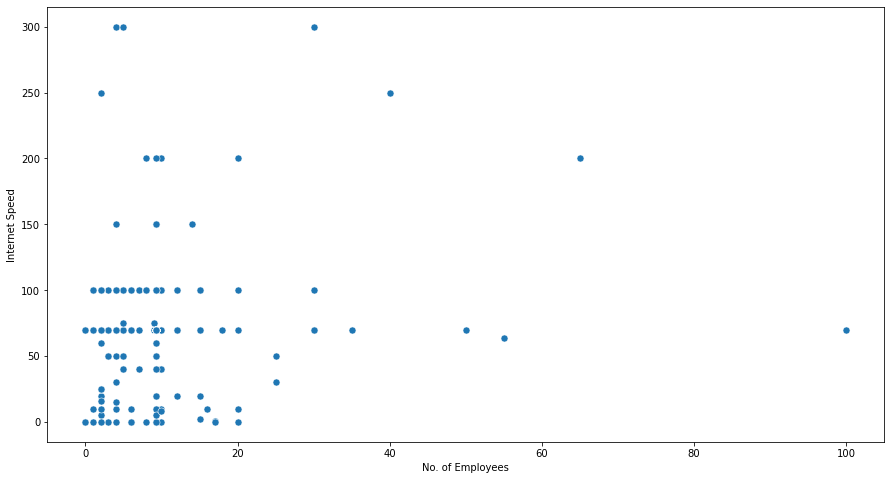

In [192]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='No. of Employees',y='Internet Speed',data=tier1_data,palette='Blues_r',s=50)
plt.show()

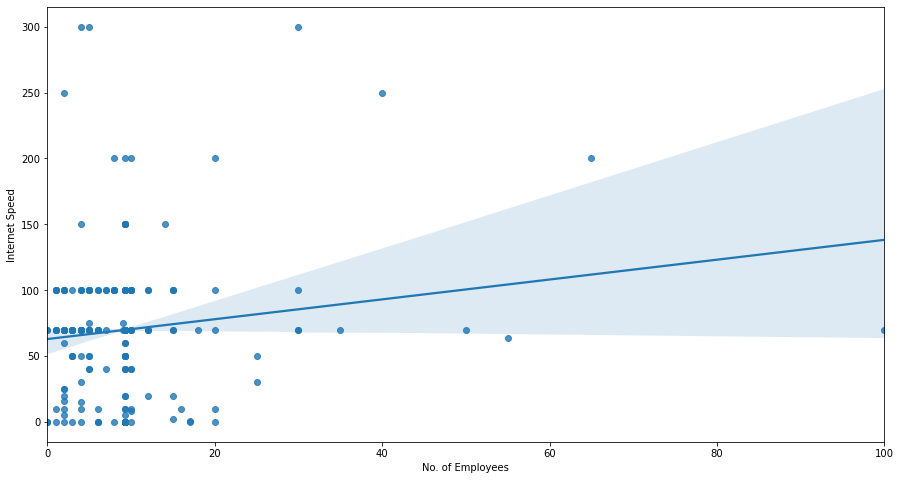

In [193]:
plt.figure(figsize=(15,8))
sns.regplot(x='No. of Employees',y='Internet Speed',data=tier1_data)
plt.show()

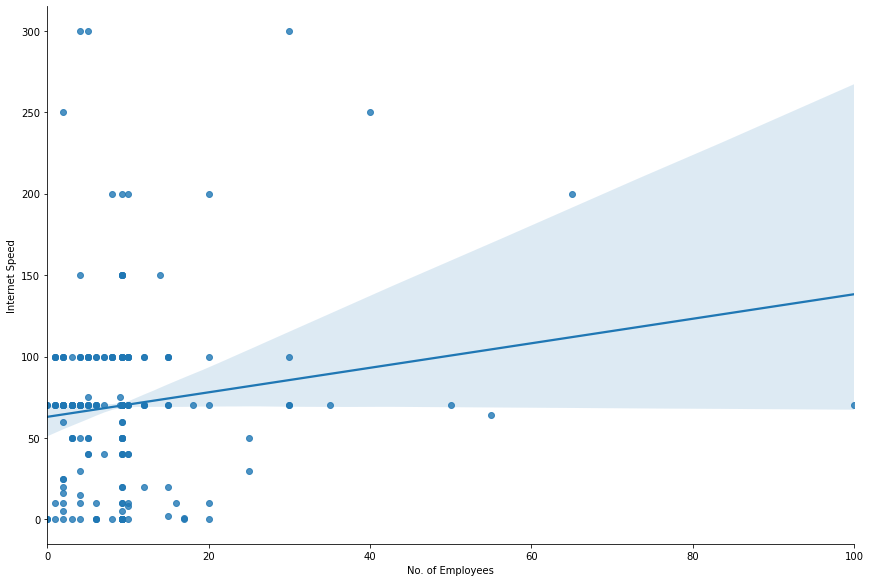

In [194]:
sns.lmplot(x='No. of Employees',y='Internet Speed',data=tier1_data,palette='Purples_r',height=8,aspect=1.5)
plt.show()

### There is a very weak positive correlation between no of employees working in photography companies and the speed of internet.

## Let's examine the variation of monthly orders with number of employees.

In [195]:
fig = go.Figure(data=go.Parcoords(
    dimensions=list([
        dict(range=[0, 8],
             constraintrange=[4, 8],
             label='No. of Employees', values=tier1_data['No. of Employees']),
        dict(range=[0, 8],
             label='Monthly Orders', values=tier1_data['Monthly Orders']),
    ])
)
)
fig.show()

## Let's observe the relationship between number of employees and internet speed.

In [196]:
fig = go.Figure(data=go.Parcoords(
    dimensions=list([
        dict(range=[0, 8],
             constraintrange=[4, 8],
             label='No. of Employees', values=tier1_data['No. of Employees']),
        dict(range=[0, 8],
             label='Internet Speed', values=tier1_data['Internet Speed']),
    ])
)
)
fig.show()

# Multivariate Analysis

## Correlation Heatmap

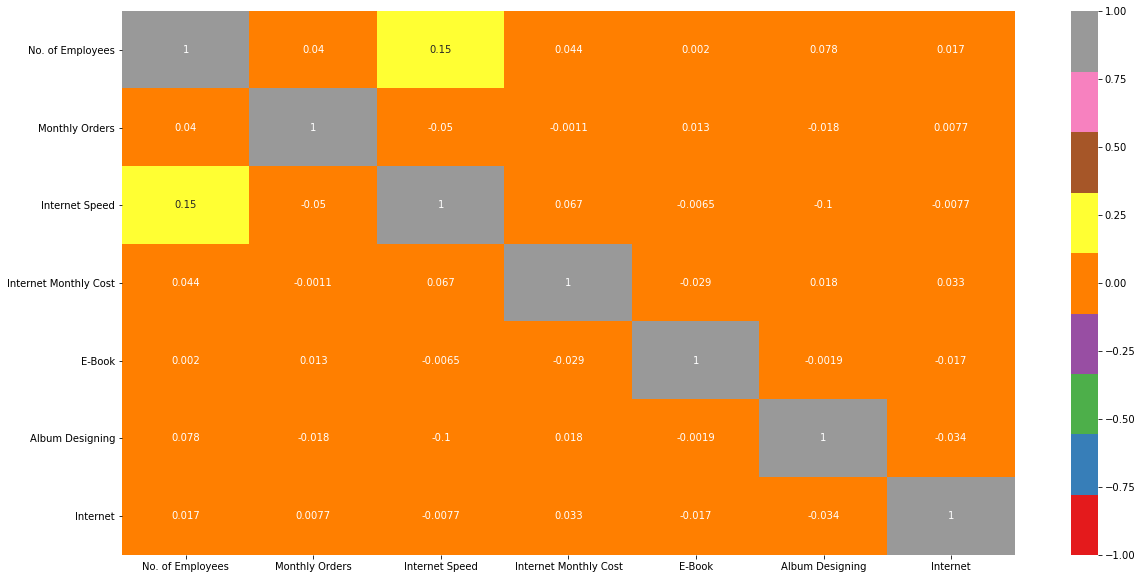

In [197]:
plt.figure(figsize=(20,10))
sns.heatmap(tier1_data.corr(),annot=True,vmin=-1,vmax=1,cmap='Set1')
plt.show()

<Figure size 1440x720 with 0 Axes>

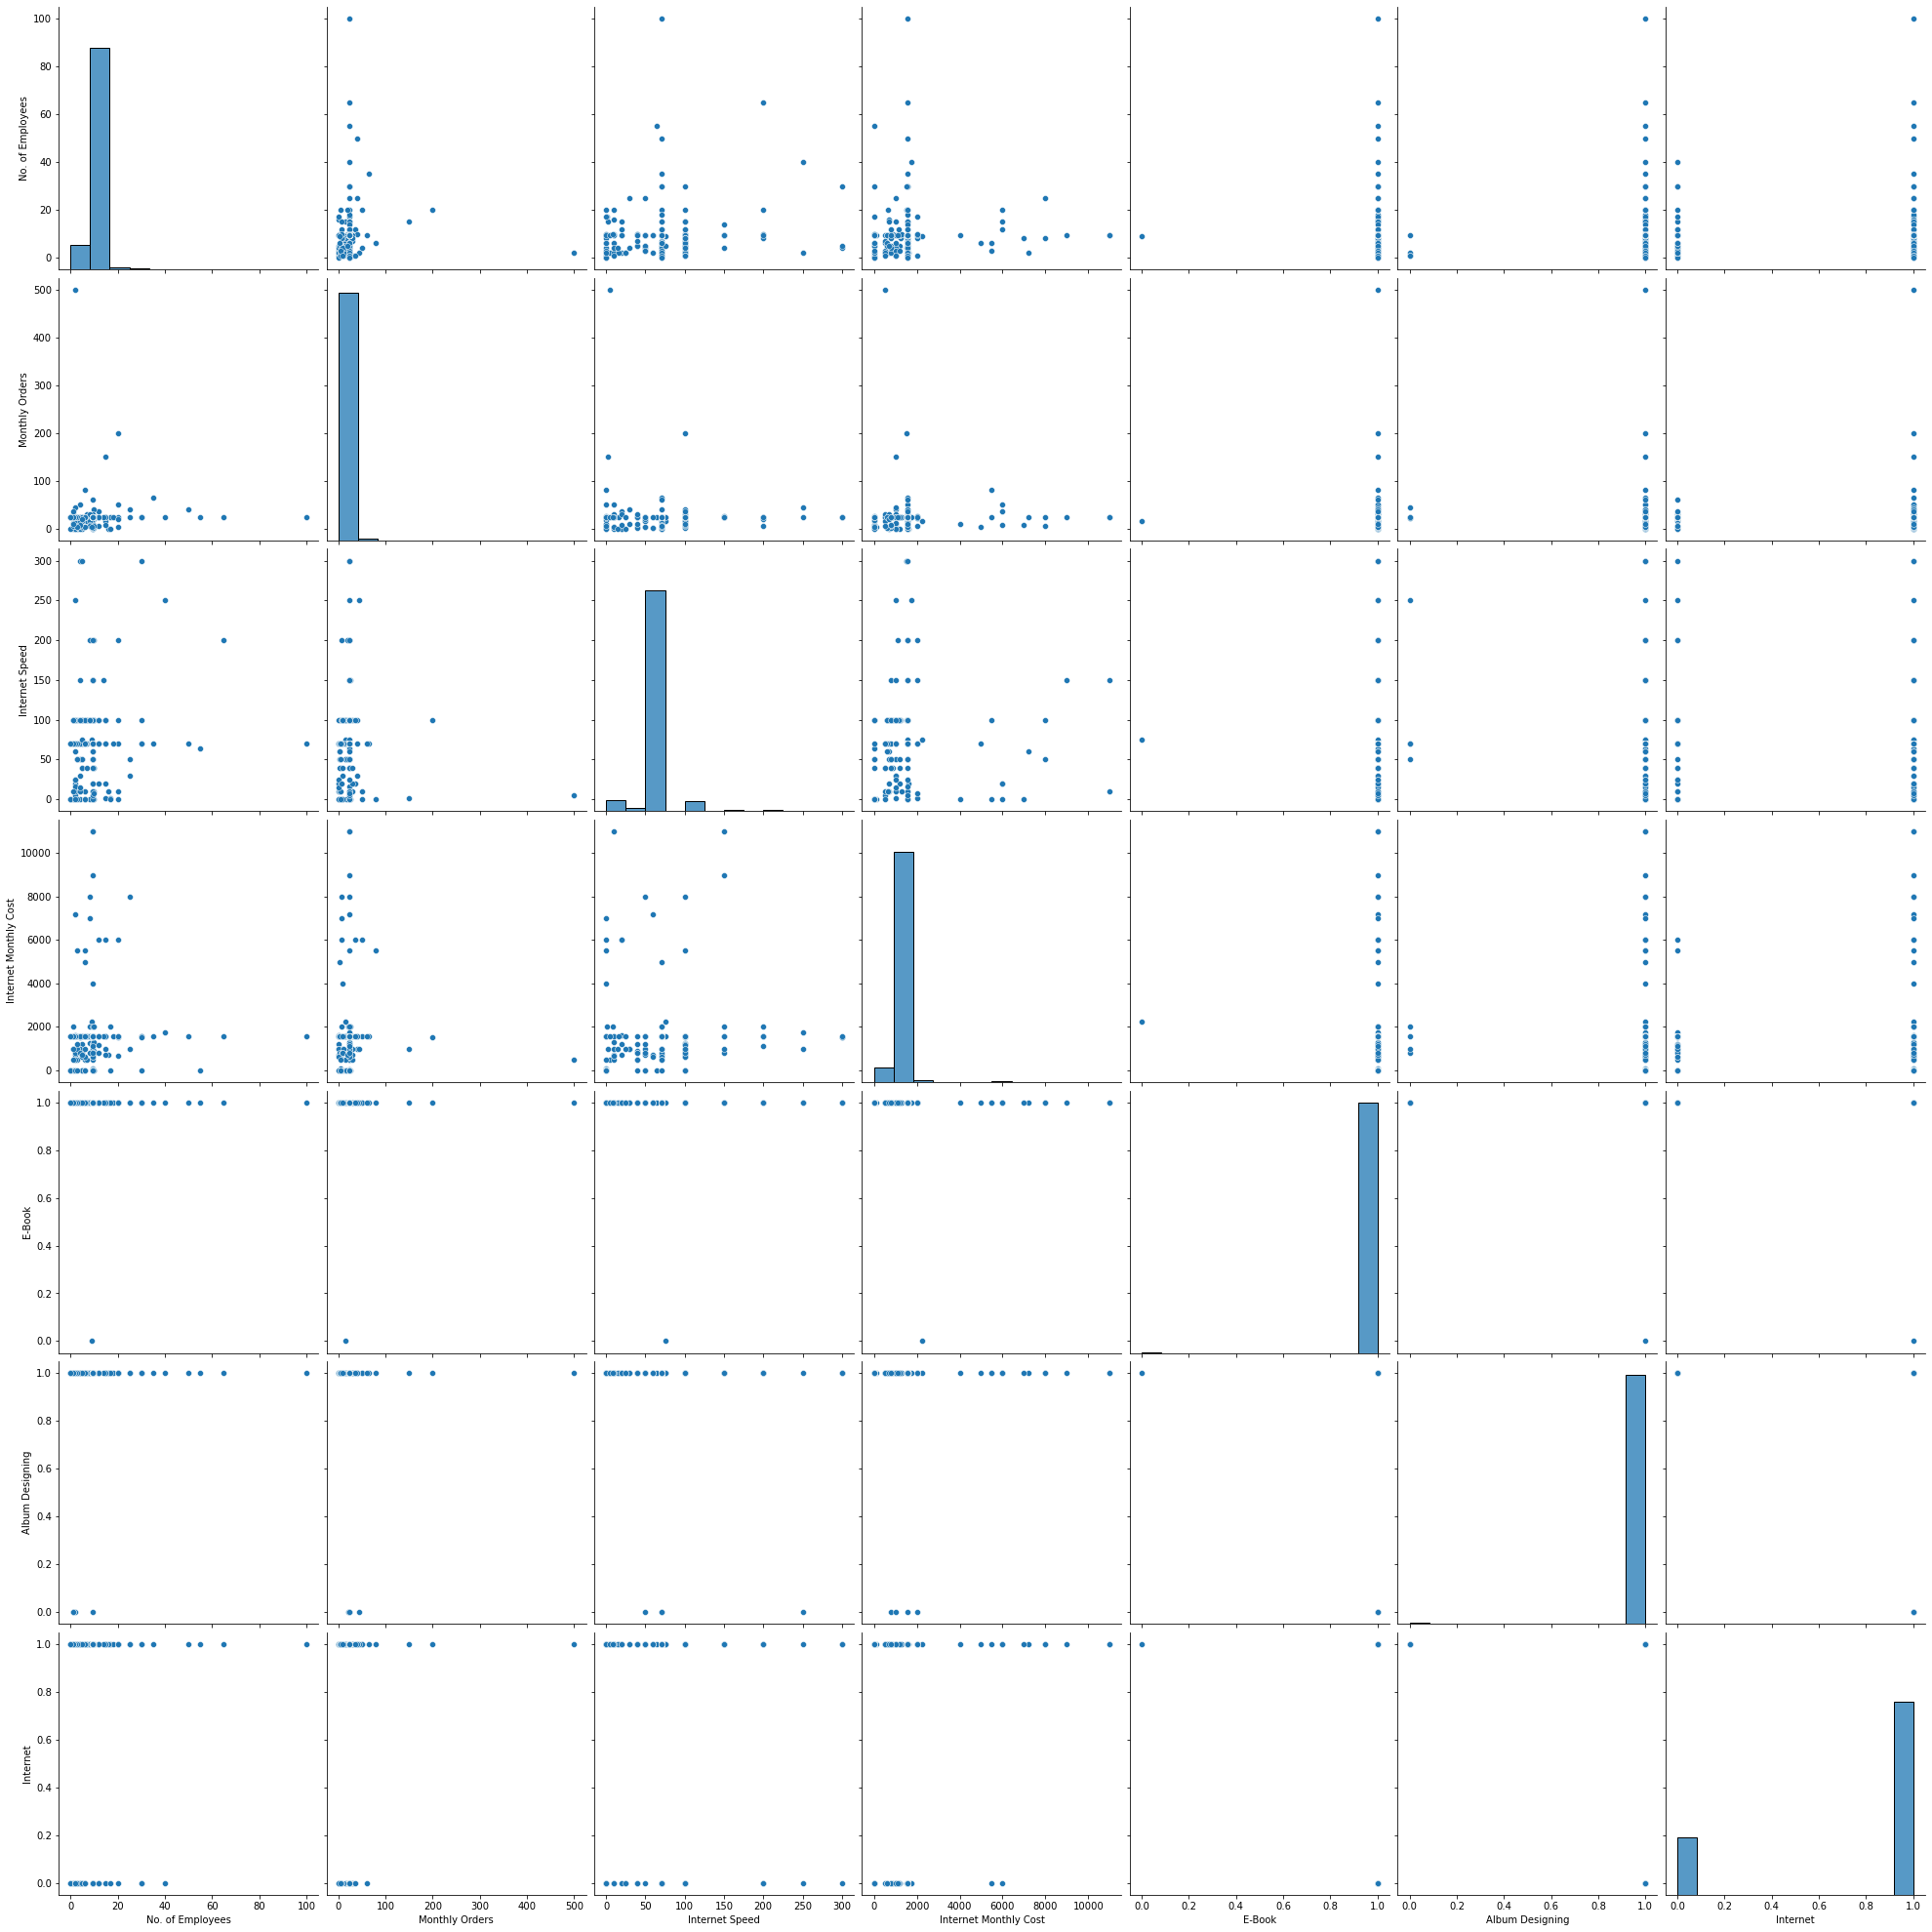

In [198]:
plt.figure(figsize=(20,10))
sns.pairplot(tier1_data,height=4)
plt.show()

## Clustermap

In [199]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_tier_1_data = tier1_data.select_dtypes(include=numerics)

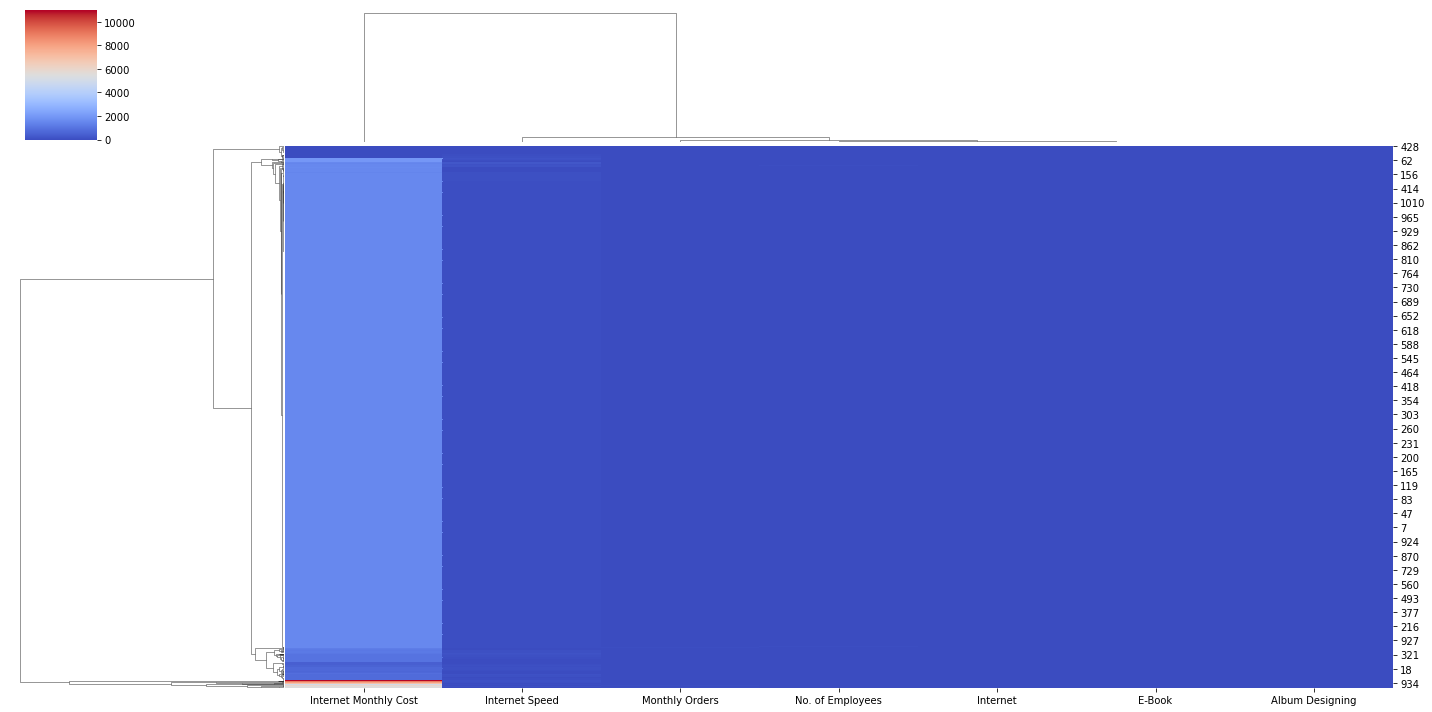

In [200]:
sns.clustermap(numeric_tier_1_data,figsize=(20,10),cmap='coolwarm')
plt.show()

## Correlation cluster heatmap

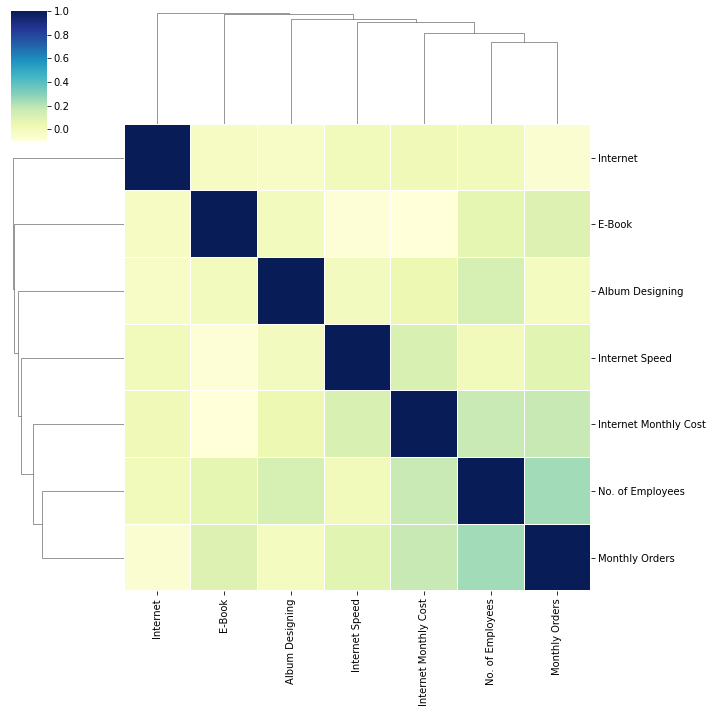

In [201]:
corrmat = tier1_data.corr(method='spearman')
c_map = sns.clustermap(corrmat,cmap='YlGnBu',lw=0.1)
plt.setp(c_map.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
c_map

## Box Plot

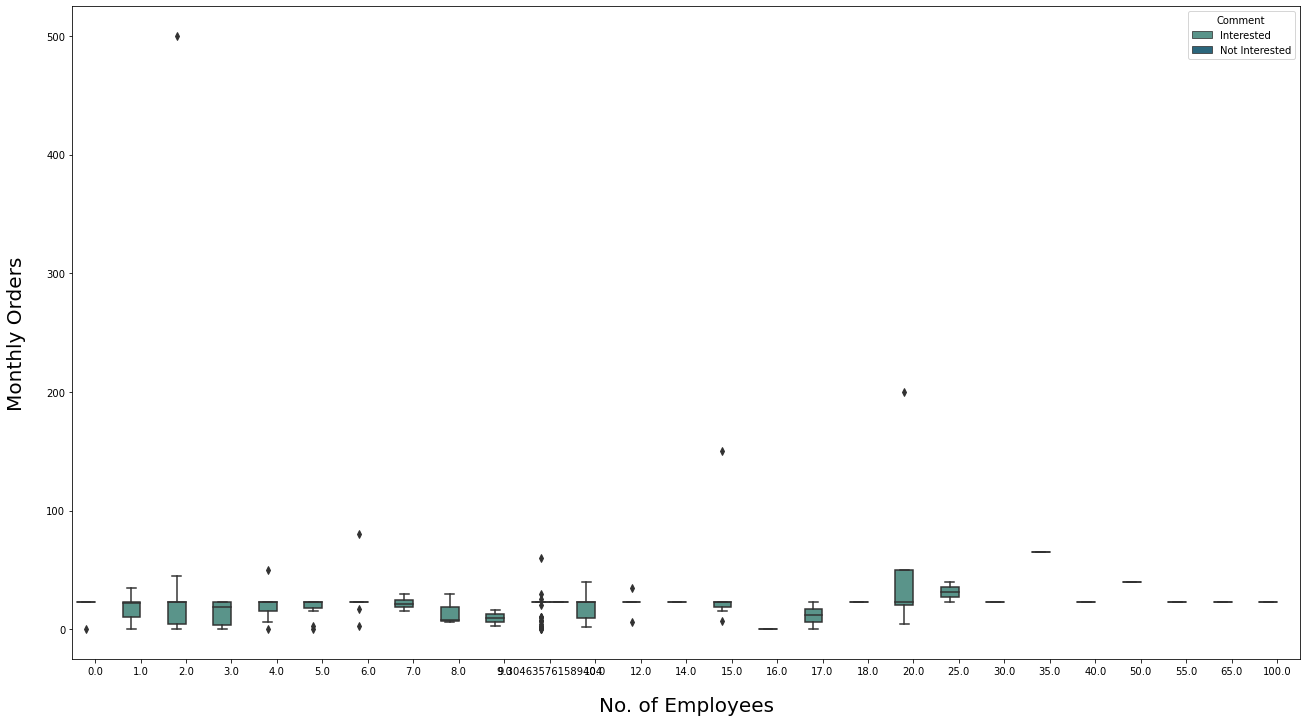

In [202]:
plt.figure(figsize=(22,12))
sns.boxplot(x="No. of Employees",y="Monthly Orders",hue='Comment',data=tier1_data,palette='crest')
plt.xlabel('No. of Employees',fontsize=20,labelpad=20)
plt.ylabel('Monthly Orders',fontsize=20,labelpad=20)
plt.show()

## Boxen Plot

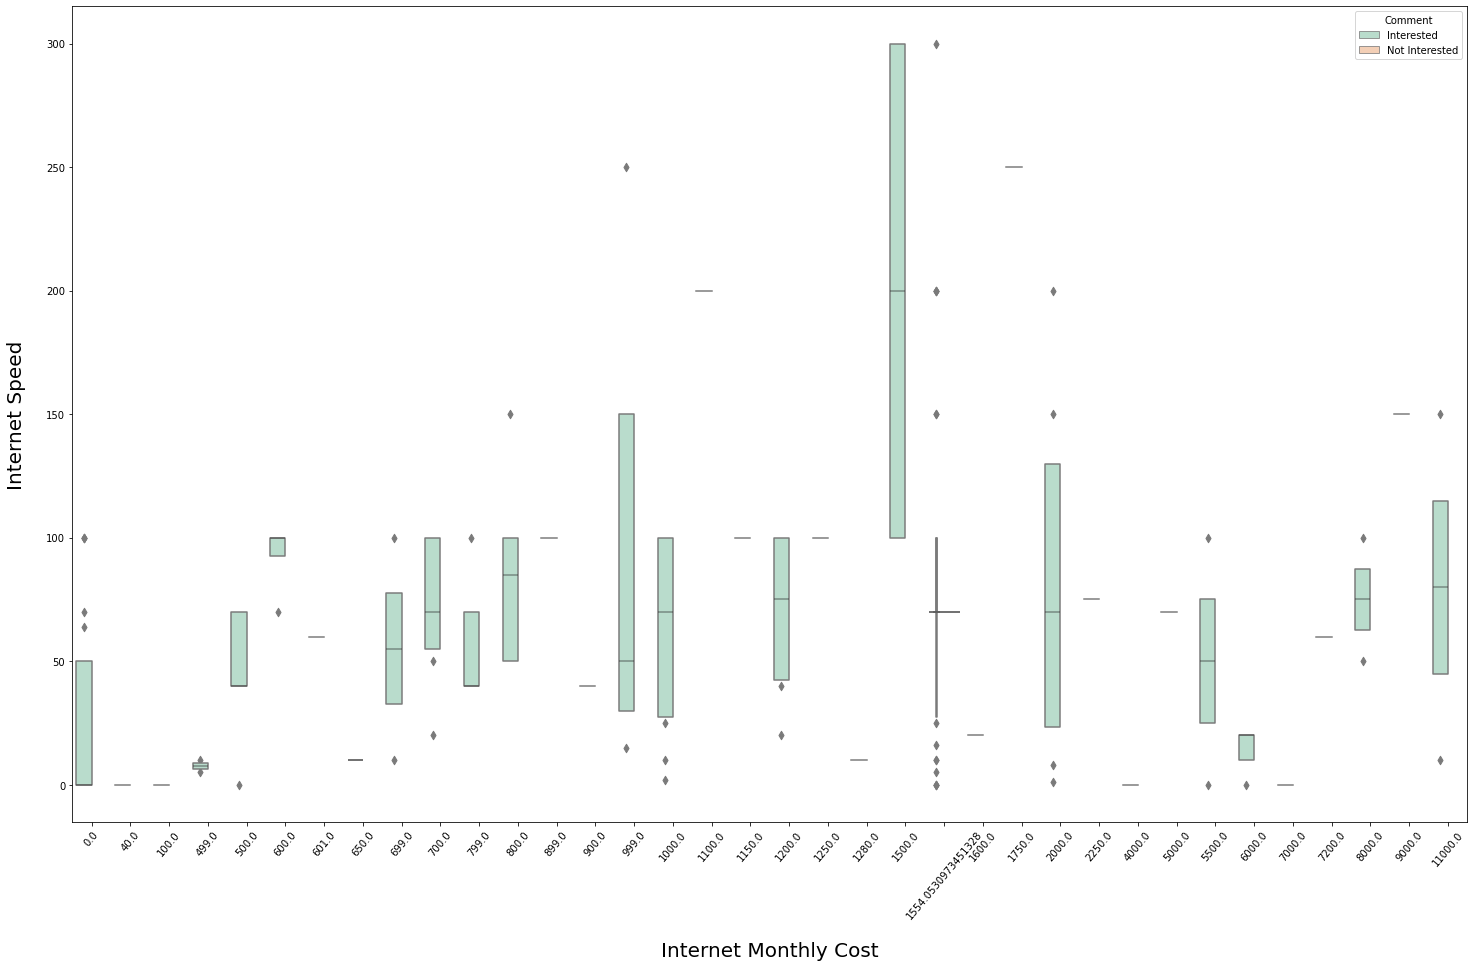

In [203]:
plt.figure(figsize=(25,15))
sns.boxenplot(x="Internet Monthly Cost",y="Internet Speed",hue='Comment',data=tier1_data,palette='Pastel2')
plt.xticks(rotation=50)
plt.xlabel('Internet Monthly Cost',fontsize=20,labelpad=20)
plt.ylabel('Internet Speed',fontsize=20,labelpad=20)
plt.show()

In [204]:
string_tier1_data = tier1_data.select_dtypes(include=object)
string_tier1_data.head()

Name                  Type  \
0  The Wed Cafe - Best Wedding Photographers In D...  Wedding photographer   
1  Wedding Photographer In Delhi - Just Click Pho...  Wedding photographer   
2  Mani Sharma Photografy, Best Wedding Photograp...  Wedding photographer   
3  Upasna Studio | Best Candid Wedding Photograph...  Wedding photographer   
4  Just Click Wedding Photographer - Best Wedding...  Wedding photographer   

  Location Photographer's name     Comment Email ID Problems Internet Brand  \
0    Delhi                 NaN  Interested      NaN      NaN            NaN   
1    Delhi               Vimal  Interested      NaN      NaN         Airtel   
2    Delhi         Mani Sharma  Interested      NaN      NaN            NaN   
3    Delhi         Jatin Kumar  Interested      NaN      NaN            NaN   
4    Delhi               Vimal  Interested      NaN      NaN            NaN   

           Cloud Storage Used                  Photo Selection Method  
0                         NaN                                     NaN  
1  Google Drive and One Drive  Lightroom, Adobe Photoshop, V Transfer  
2                         NaN                                     NaN  
3                         NaN                                     NaN  
4                         NaN                                     NaN

## Radar Chart

In [205]:
fig = px.line_polar(tier1_data, r='Location', theta='Cloud Storage Used', line_close=True, width=1000,height=800)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)
fig.show()

## Matrix Scatterplot

In [206]:
fig = px.scatter_matrix(numeric_tier_1_data,width=1200,height=1300)
fig.show()

## Parallel Coordinates Plot

In [207]:
fig = px.parallel_coordinates(tier1_data,dimensions=['No. of Employees', 'Monthly Orders', 'Cloud Storage Used','Photo Selection Method'])
fig.show()

## Density Heatmap

In [208]:
fig = px.density_heatmap(tier1_data, x="No. of Employees", y="Monthly Orders", template="seaborn")
fig.show()

# Thank you!